# Cleaning MLS

## Summary

HAR.com (Houston Association of Realtors) is a comprehensive residential property search website that serves as the source of homes for sale and rentals in the state of Texas. It is widely used by realtors and real estate firms, as well as those seeking homes and home assessments throughout the state.

The data gathered from this site includes information regarding all homes in the Greater Houston Metroplex that were listed for sale from the year 2015 onward, as well as their outcomes. Nine counties comprise the Greater Houston Metroplex: Austin, Brazoria, Chambers, Fort Bend, Galveston, Harris, Liberty, Montgomery, and Waller.

Data source: [har.com](https://www.har.com)

## Import

In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import seaborn as sns

import copy

pd.set_option('display.max_columns', None) # Displays all columns

from scipy.stats import kurtosis, skew

import warnings
warnings.filterwarnings('ignore')

### Functions

In [2]:
def view(dataframe, n: int=3):
    """Displays the preview of the first and last rows of the dataframe
    Args:
        dataframe: The dataframe being called
        n: Number of rows to select for preview. Defaults to 3.
    Returns:
        The first n and the last n rows of the dataframe
    """

    with pd.option_context('display.max_rows',n*2):
        display(dataframe)

In [3]:
def rename(dataframe, column, original, rename):
    """Replaces all instances of a specific string in one column with a new string
    Args:
        dataframe: The dataframe being called
        column: The column being called
        oringal: Original string to be replaced
        rename: New string to replace original string
    """

    dataframe.loc[dataframe[column].str.contains(original), column] = str(rename)
    return

In [4]:
def stats(dataframe, column):
    """Generates single column stats and boxplot
    Args:
        dataframe: The dataframe being called
        column: The column being called
    Returns:
        Descriptive statistics and boxplot of the column
    """
    
    print(f'Data type: {dataframe[column].dtype}')
    print(f'Count: {dataframe[column].shape[0]}')
    print(f'Number of Unique Values: {dataframe[column].nunique()}')
    print(f'Number of nulls: {dataframe[column].isna().sum()} - {round(100*dataframe[column].isna().sum()/len(dataframe),2)}%')
    print()
    print(f'Mean: {dataframe[column].mean()}')
    print(f'Minimum: {dataframe[column].min()}')
    print(f'Lower Quartile: {dataframe[column].quantile(.25)}')
    print(f'Median: {dataframe[column].quantile(.5)}')
    print(f'Upper Quartile: {dataframe[column].quantile(.75)}')
    print(f'Maximum: {dataframe[column].max()}')

    plt.figure(figsize=(14,1))
    plt.title(f'Boxplot Distrubution of {column}', fontsize=14, fontweight='bold')
    sns.boxplot(x=dataframe[column])
    plt.xlabel(column, fontsize=13, fontweight='bold')
    plt.show()

In [5]:
def preview_cols(dataframe):
    """Generates quick preview of each column in the dataframe
    Args:
        dataframe: The dataframe being called
    Returns:
        Datatype
        Number of unique values
        Number of nulls
        Descriptive statistics and boxplot for numeric columns
        The first n and the last n values of the column
        Visualization of most frequent values
        
    """
    
    for i in dataframe.columns:
        print(i.upper())
        print()
        if (dataframe[i].dtype=='int' or dataframe[i].dtype=='float'): 
            print(stats(dataframe,i))
        else: 
            print(f'Data type: {dataframe[i].dtype}')
            print(f'Number of unique values: {dataframe[i].nunique()}')
            print(f'Number of nulls: {dataframe[i].isna().sum()} - {round(100*dataframe[i].isna().sum()/len(dataframe),2)}%')
            print (dataframe[i].describe())
        print()
        print(view(dataframe[~dataframe[i].isna()][i].astype('str').value_counts().sort_index()))
        print()
        dataframe[i].value_counts().head(20).plot(kind='barh', figsize=(8,6))
        plt.title(f'Most common values in the {i} column', fontsize=14, fontweight='bold')
        plt.ylabel('Value', fontsize=13, fontweight='bold')
        plt.xlabel('Frequency of Occurence', fontsize=13, fontweight='bold')
        plt.show()
        print()
        print('*'*50)
        print()

## Load and Preview

In [6]:
df = pd.read_csv('har_data.csv')

In [7]:
view(df)

,Unnamed: 0,MLS Number,Property Type,Status,Street Number,Street Name,Unit Number,City/Location,Zip Code,County,List Price,Close Price,Close Date,Area,Subdivision,Master Planned Community,Market Area,School District,School Elementary,School Middle,School High,Sq Ft Total,Price Sq Ft List,Price Sq Ft Sold,Lot Size,Acres,Price Acre List,Price Acre Sales,Year Built,Bedrooms,Baths Full,Baths Half,Baths Total,Room Count,Fireplaces Number,Stories,New Construction,New Construction Desc,Pool Private,No Of Garage Cap,Style,DOM,CDOM,List Office MLSID,List Office Name,List Agent MLSID,List Agent Full Name,Selling Office MLSID,Selling Office Name,Selling Agent MLSID,Selling Agent Full Name,Realist Owner Name,Last Change Timestamp,List Date
0,0,69669543,Single-Family,Sold,2701,Flamingo,NaN,Rye,77369,Liberty,$10000,$7000,09/25/2017 12:00:00 AM,52.0,BIG THICKET LAKE ESTATES,NaN,NaN,107 - Hardin,NaN,NaN,NaN,800.0,$12.50,$8.75,10759.0,NaN,NaN,NaN,2000.0,1.0,2.0,0.0,2.0,5.0,NaN,1.0,False,NaN,False,1.0,Ranch,454.0,454,RMFS01,RE/MAX 1st Source,BENOITM,Mark Benoit,RMFS01,RE/MAX 1st Source,BENOITM,Mark Benoit,NaN,10/02/2017 10:25:02 AM,05/26/2016 12:00:00 AM
1,1,8341942,Townhouse/Condo,Sold,7D,Dana,NaN,Galveston,77554,Galveston,$8000,$8000,09/11/2017 12:00:00 AM,33.0,Pirates Cove,NaN,West End,22 - Galveston,GISD OPEN ENROLL,GISD OPEN ENROLL,BALL HIGH SCHOOL,801.0,$9.99,$9.99,NaN,NaN,NaN,NaN,1984.0,1.0,1.0,0.0,1.0,3.0,1.0,2.0,False,NaN,False,1.0,Mediterranean,49.0,49,SNSP01,"Sand N Sea Properties, LLC",JANAKAY,Jana Turner,nonmls,Non-MLS,nonmls,Non-MLS Agent,NaN,09/11/2017 3:42:32 PM,07/07/2017 12:00:00 AM
2,2,90437489,Single-Family,Sold,2407,Franklin,NaN,La Marque,77568,Galveston,$25000,$19000,09/07/2017 12:00:00 AM,4.0,Stafford 2,NaN,La Marque,52 - Texas City,HIGHLANDS ELEMENTARY SCHOOL (LA MARQUE),LA MARQUE MIDDLE SCHOOL,LA MARQUE HIGH SCHOOL,660.0,$37.88,$28.79,6135.0,NaN,NaN,NaN,1945.0,2.0,1.0,0.0,1.0,2.0,NaN,1.0,False,NaN,False,0.0,Traditional,22.0,22,REOS01,Real Estate Options of Texas,Pershaun,Tanya Smith,REOS01,Real Estate Options of Texas,Pershaun,Tanya Smith,Rice Benedict,09/11/2017 3:53:22 PM,07/11/2017 12:00:00 AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371430,42440,18009952,Mid/Hi-Rise Condo,Withdrawn,1000,Uptown Park,264,Houston,77056,Harris,$4995000,NaN,NaN,22.0,Villa D Este Condo,NaN,Tanglewood Area,27 - Houston,BRIARGROVE ELEMENTARY SCHOOL,TANGLEWOOD MIDDLE SCHOOL,WISDOM HIGH SCHOOL,6260.0,$797.92,NaN,NaN,NaN,NaN,NaN,2001.0,3.0,3.0,2.0,3.2,11.0,1.0,NaN,False,NaN,False,NaN,NaN,276.0,641,TRNR01,Martha Turner Sotheby's,PATTIG,Patricia Garrison,NaN,NaN,NaN,NaN,NaN,03/22/2019 1:55:24 PM,06/19/2018 12:00:00 AM
371431,42441,40170341,Single-Family,Withdrawn,8818,Sandringham,NaN,Houston,77024,Harris,$5250000,NaN,NaN,23.0,Bayou Woods Sec 2,NaN,Memorial Close In,49 - Spring Branch,HUNTERS CREEK ELEMENTARY SCHOOL,SPRING BRANCH MIDDLE SCHOOL (SPRING BRANCH),MEMORIAL HIGH SCHOOL (SPRING BRANCH),7007.0,$749.25,NaN,75520.0,1.7337,$3028206,NaN,1957.0,6.0,5.0,1.0,5.1,13.0,2.0,1.0,False,NaN,True,0.0,Traditional,34.0,34,KWHM01,Keller Williams Realty,STEVEN,Steven Sullivan,NaN,NaN,NaN,NaN,NaN,05/01/2019 12:17:00 PM,01/25/2019 12:00:00 AM
371432,42442,10817804,Single-Family,Withdrawn,314,Hunters Trail,NaN,Houston,77024,Harris,$5999900,NaN,NaN,23.0,Hunterwood,NaN,Memorial Villages,49 - Spring Branch,HUNTERS CREEK ELEMENTARY SCHOOL,SPRING BRANCH MIDDLE SCHOOL (SPRING BRANCH),MEMORIAL HIGH SCHOOL (SPRING BRANCH),9257.0,$648.15,NaN,27958.0,0.6418,$9348551,NaN,2019.0,6.0,6.0,3.0,6.3,19.0,2.0,2.0,True,To Be Built/Under Construction,False,3.0,Other Style,71.0,106,TRNR01,Martha Turner Sotheby's,swarrell,Stephen Warrell,NaN,NaN,NaN,NaN,NaN,06/04/2019 10:00:42 AM,03/25/2019 12:00:00 AM


### Info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371433 entries, 0 to 371432
Data columns (total 54 columns):
Unnamed: 0                  371433 non-null int64
MLS Number                  371433 non-null int64
Property Type               371433 non-null object
Status                      371433 non-null object
Street Number               371432 non-null object
Street Name                 371433 non-null object
Unit Number                 23560 non-null object
City/Location               371413 non-null object
Zip Code                    371433 non-null object
County                      371433 non-null object
List Price                  371433 non-null object
Close Price                 208208 non-null object
Close Date                  208208 non-null object
Area                        370562 non-null float64
Subdivision                 371140 non-null object
Master Planned Community    65389 non-null object
Market Area                 368262 non-null object
School District          

### Describe

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,371433.0,3.236315e+04,2.018082e+04,0.0,1.547600e+04,3.095200e+04,4.722600e+04,84103.0
MLS Number,371433.0,5.049686e+07,2.820348e+07,101447.0,2.612482e+07,5.041098e+07,7.489400e+07,338218412.0
Area,370562.0,2.062901e+01,1.276702e+01,1.0,9.000000e+00,1.900000e+01,3.300000e+01,86.0
Sq Ft Total,369165.0,2.590286e+03,3.568375e+04,0.0,1.747000e+03,2.330000e+03,3.058000e+03,21632649.0
Lot Size,325550.0,2.086880e+04,1.753530e+06,0.0,6.149000e+03,7.910000e+03,1.076100e+04,999999999.0
Acres,169093.0,5.657715e+00,5.335263e+02,0.0,1.511000e-01,1.927000e-01,2.705000e-01,152433.0
Year Built,369591.0,2.155951e+03,5.641701e+04,0.0,1.980000e+03,2.002000e+03,2.013000e+03,20002016.0
Bedrooms,369524.0,3.509160e+00,8.885070e-01,0.0,3.000000e+00,4.000000e+00,4.000000e+00,43.0
Baths Full,369148.0,2.401568e+00,8.329209e-01,0.0,2.000000e+00,2.000000e+00,3.000000e+00,31.0
Baths Half,369146.0,5.726731e-01,5.669972e-01,0.0,0.000000e+00,1.000000e+00,1.000000e+00,10.0


In [10]:
df = df.drop('Unnamed: 0', axis=1)

### Columns

**MLS Information:**
* MLS Number
* Property Type
* Status

**Geographical Location:**
* Street Number
* Street Name
* Unit Number
* City/Location
* Zip Code
* County

**Closing Details:**
* List Price
* Close Price
* Close Date

**Community Location:**
* Area
* Subdivision
* Master Planned Community
* Market Area
* School District
* School Elementary
* School Middle
* School High

**Property Size and Attributes:**
* Sq Ft Total
* Price Sq Ft List
* Price Sq Ft Sold
* Lot Size
* Acres
* Price Acre List
* Price Acre Sales
* Year Built
* Bedrooms
* Baths Full
* Baths Half
* Baths Total
* Room Count
* Fireplaces Number
* Stories
* New Construction
* New Construction Desc
* Pool Private
* No Of Garage Cap
* Style

**Listing and Selling Information:**
* DOM: Days on Market
* CDOM: Cumulative Days on Market
* List Office MLSID
* List Office Name
* List Agent MLSID
* List Agent Full Name
* Selling Office MLSID
* Selling Office Name
* Selling Agent MLSID
* Selling Agent Full Name
* Realist Owner Name
* Last Change Timestamp
* List Date

### Renaming Columns

In [11]:
df.columns

Index(['MLS Number', 'Property Type', 'Status', 'Street Number', 'Street Name',
       'Unit Number', 'City/Location', 'Zip Code', 'County', 'List Price',
       'Close Price', 'Close Date', 'Area', 'Subdivision',
       'Master Planned Community', 'Market Area', 'School District',
       'School Elementary', 'School Middle', 'School High', 'Sq Ft Total',
       'Price Sq Ft List', 'Price Sq Ft Sold', 'Lot Size', 'Acres',
       'Price Acre List', 'Price Acre Sales', 'Year Built', 'Bedrooms',
       'Baths Full', 'Baths Half', 'Baths Total', 'Room Count',
       'Fireplaces Number', 'Stories', 'New Construction',
       'New Construction Desc', 'Pool Private', 'No Of Garage Cap', 'Style',
       'DOM', 'CDOM', 'List Office MLSID', 'List Office Name',
       'List Agent MLSID', 'List Agent Full Name', 'Selling Office MLSID',
       'Selling Office Name', 'Selling Agent MLSID', 'Selling Agent Full Name',
       'Realist Owner Name', 'Last Change Timestamp', 'List Date '],
      dtype='ob

In [12]:
df.columns = ['mls_number', 'property_type', 'status', 'street_number',
              'street_name', 'unit_number', 'city', 'zip_code', 'county', 'list_price',
              'close_price', 'close_date', 'area', 'subdivision', 'master_planned_community',
              'market_area', 'school_district', 'school_elementary', 'school_middle', 'school_high',
              'sq_ft_total', 'price_sq_ft_list', 'price_sq_ft_sold', 'lot_size', 'acres',
              'price_acre_list', 'price_acre_sales', 'year_built', 'bedrooms', 'baths_full',
              'baths_half', 'baths_total', 'room_count', 'fireplaces_number', 'stories',
              'new_construction', 'new_construction_desc', 'pool_private', 'no_of_garage_cap',
              'style', 'dom', 'cdom', 'list_office_mlsid', 'list_office_name', 'list_agent_mlsid',
              'list_agent_full_name', 'selling_office_mlsid', 'selling_office_name',
              'selling_agent_mlsid', 'selling_agent_full_name', 'realist_owner_name',
              'last_change_timestamp', 'list_date']

### Preview Columns

MLS_NUMBER

Data type: int64
Count: 371433
Number of Unique Values: 371428
Number of nulls: 0 - 0.0%

Mean: 50496861.981816374
Minimum: 101447
Lower Quartile: 26124821.0
Median: 50410975.0
Upper Quartile: 74894000.0
Maximum: 338218412


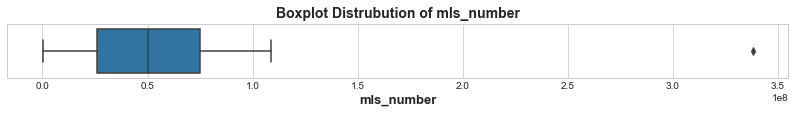

None



10000122    1
10000191    1
10000324    1
           ..
99999204    1
99999419    1
9999959     1
Name: mls_number, Length: 371428, dtype: int64

None



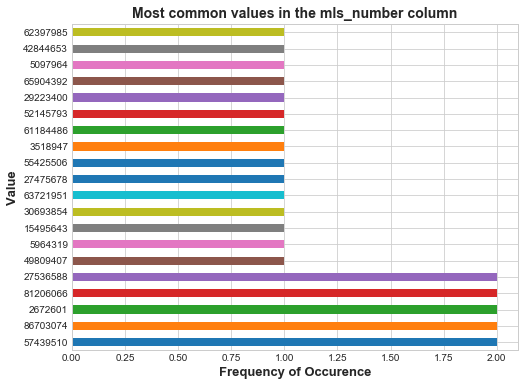


**************************************************

PROPERTY_TYPE

Data type: object
Number of unique values: 4
Number of nulls: 0 - 0.0%
count            371433
unique                4
top       Single-Family
freq             335169
Name: property_type, dtype: object



Mid/Hi-Rise Condo      4674
Multi-Family           2345
Single-Family        335169
Townhouse/Condo       29245
Name: property_type, dtype: int64

None



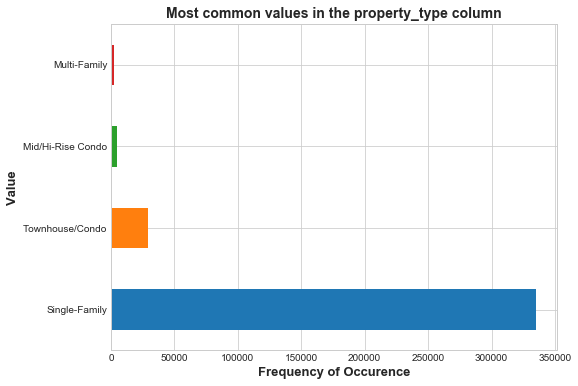


**************************************************

STATUS

Data type: object
Number of unique values: 8
Number of nulls: 0 - 0.0%
count     371433
unique         8
top         Sold
freq      208208
Name: status, dtype: object



Active             27432
Expired            36961
Option Pending      2374
                   ...  
Sold              208208
Terminated         82543
Withdrawn           3303
Name: status, Length: 8, dtype: int64

None



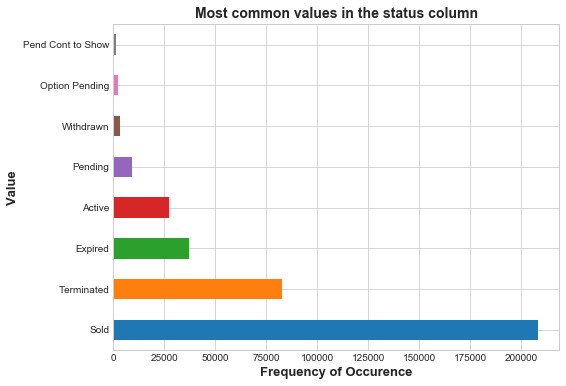


**************************************************

STREET_NUMBER

Data type: object
Number of unique values: 22269
Number of nulls: 1 - 0.0%
count     371432
unique     22269
top           10
freq         592
Name: street_number, dtype: object



0          105
0-11727      1
00           9
          ... 
XXXXX        1
_27194       1
na           1
Name: street_number, Length: 22269, dtype: int64

None



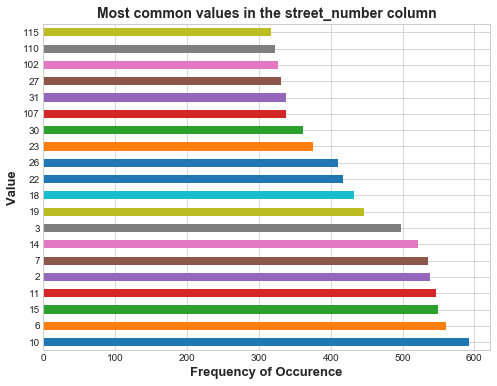


**************************************************

STREET_NAME

Data type: object
Number of unique values: 54971
Number of nulls: 0 - 0.0%
count      371433
unique      54971
top       Seawall
freq          714
Name: street_name, dtype: object



& 71 Richards    1
0Ld Columbus     1
1                1
                ..
yaupon trail     1
yellowood        1
yorkshire oak    2
Name: street_name, Length: 54971, dtype: int64

None



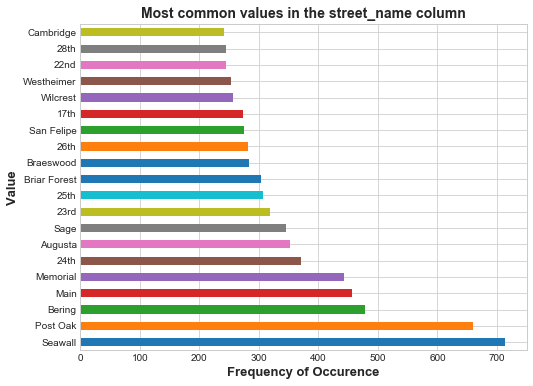


**************************************************

UNIT_NUMBER

Data type: object
Number of unique values: 3546
Number of nulls: 347873 - 93.66%
count     23560
unique     3546
top           A
freq       1316
Name: unit_number, dtype: object



# 11     1
# 6      1
# 9      1
        ..
o        1
t3       1
upper    2
Name: unit_number, Length: 3546, dtype: int64

None



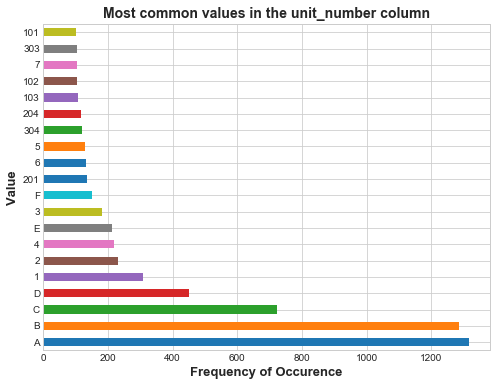


**************************************************

CITY

Data type: object
Number of unique values: 215
Number of nulls: 20 - 0.01%
count      371413
unique        215
top       Houston
freq       132283
Name: city, dtype: object



Alamo          1
Algoa          9
Alief          2
              ..
Woodbranch    36
Woodland       3
Woodloch      26
Name: city, Length: 215, dtype: int64

None



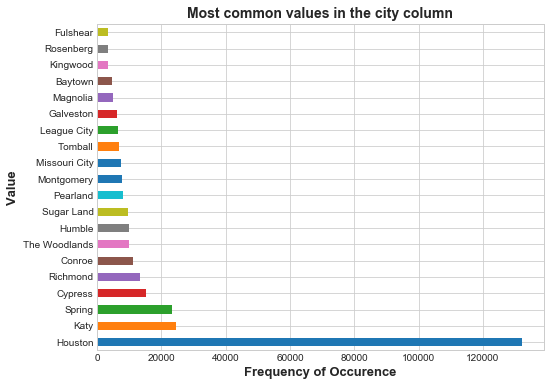


**************************************************

ZIP_CODE

Data type: object
Number of unique values: 532
Number of nulls: 0 - 0.0%
count     371433
unique       532
top        77433
freq        6752
Name: zip_code, dtype: int64



12415    1
25918    1
48351    1
        ..
79119    1
97000    1
99092    1
Name: zip_code, Length: 292, dtype: int64

None



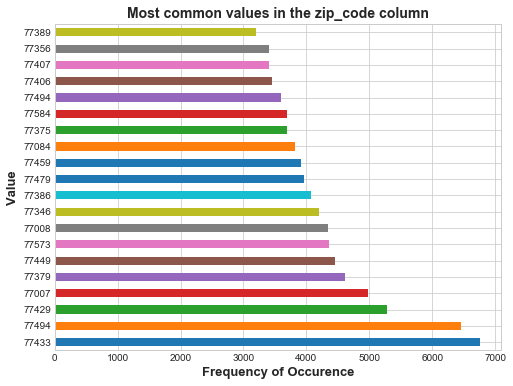


**************************************************

COUNTY

Data type: object
Number of unique values: 9
Number of nulls: 0 - 0.0%
count     371433
unique         9
top       Harris
freq      218486
Name: county, dtype: object



Austin          867
Brazoria      17818
Chambers       2553
              ...  
Liberty        2542
Montgomery    48083
Waller         2504
Name: county, Length: 9, dtype: int64

None



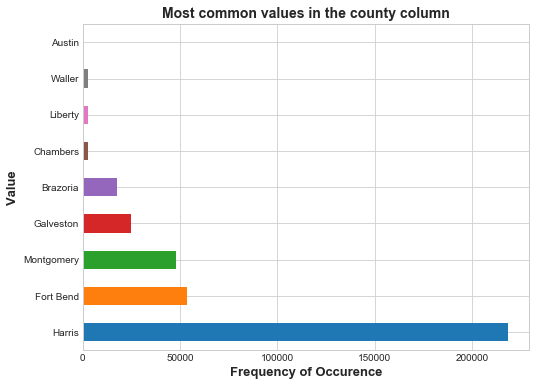


**************************************************

LIST_PRICE

Data type: object
Number of unique values: 29686
Number of nulls: 0 - 0.0%
count      371433
unique      29686
top       $225000
freq         2809
Name: list_price, dtype: object



$1         17
$10         2
$1000      23
           ..
$999995     7
$999998     2
$999999    65
Name: list_price, Length: 29686, dtype: int64

None



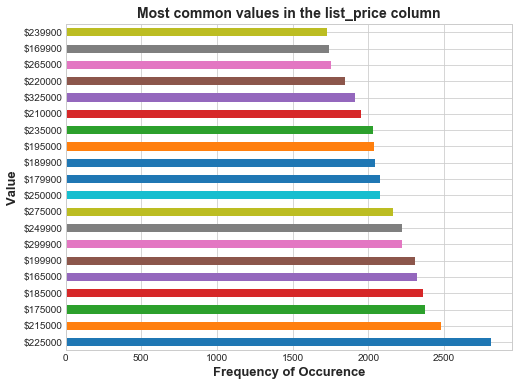


**************************************************

CLOSE_PRICE

Data type: object
Number of unique values: 23686
Number of nulls: 163225 - 43.94%
count      208208
unique      23686
top       $185000
freq         1761
Name: close_price, dtype: object



$1         1
$1000      1
$10000     3
          ..
$999900    8
$999995    1
$999999    4
Name: close_price, Length: 23686, dtype: int64

None



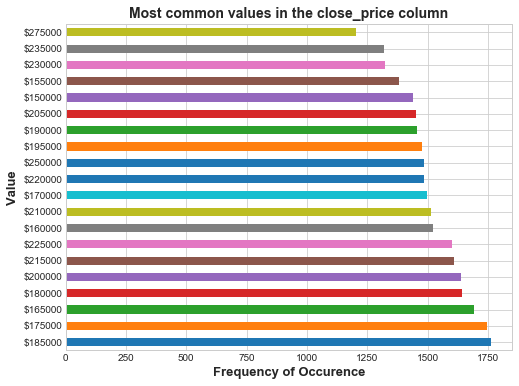


**************************************************

CLOSE_DATE

Data type: object
Number of unique values: 893
Number of nulls: 163225 - 43.94%
count                     208208
unique                       893
top       06/29/2018 12:00:00 AM
freq                        1179
Name: close_date, dtype: object



01/01/2017 12:00:00 AM      7
01/01/2018 12:00:00 AM      8
01/01/2019 12:00:00 AM     11
                         ... 
12/30/2018 12:00:00 AM      3
12/31/2017 12:00:00 AM     10
12/31/2018 12:00:00 AM    705
Name: close_date, Length: 893, dtype: int64

None



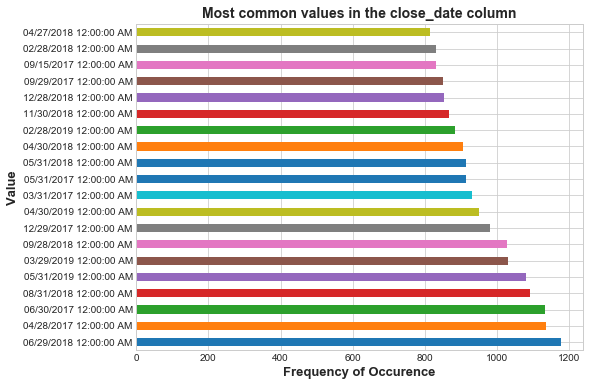


**************************************************

AREA

Data type: float64
Count: 371433
Number of Unique Values: 67
Number of nulls: 871 - 0.23%

Mean: 20.62901484771779
Minimum: 1.0
Lower Quartile: 9.0
Median: 19.0
Upper Quartile: 33.0
Maximum: 86.0


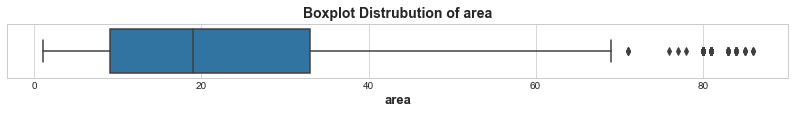

None



1.0     13450
10.0     8213
11.0     3356
        ...  
85.0        4
86.0        3
9.0     17851
Name: area, Length: 67, dtype: int64

None



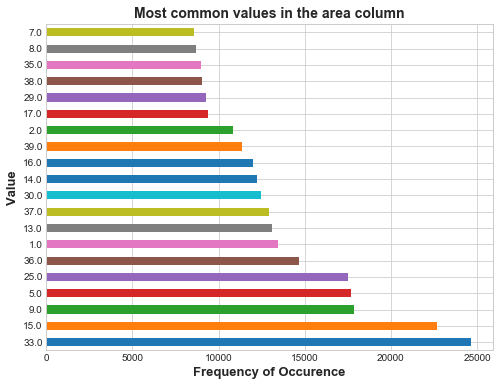


**************************************************

SUBDIVISION

Data type: object
Number of unique values: 49207
Number of nulls: 293 - 0.08%
count              371140
unique              49207
top       Houston Heights
freq                 1510
Name: subdivision, dtype: object



 20TH ST MANOR                1
 2120 Kipling Condominiums    1
 6700 Belmont Ave Th          2
                             ..
woodstream                    2
woodway place                 1
xxx                           1
Name: subdivision, Length: 49207, dtype: int64

None



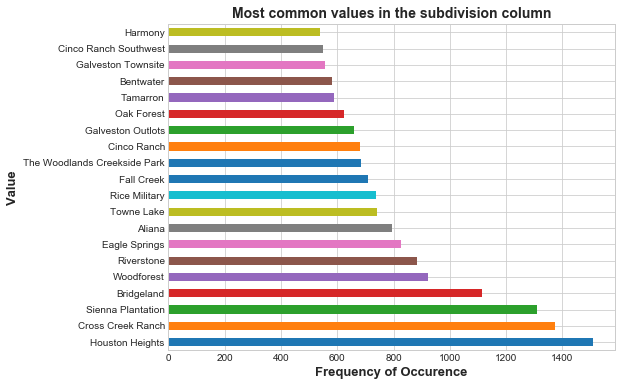


**************************************************

MASTER_PLANNED_COMMUNITY

Data type: object
Number of unique values: 111
Number of nulls: 306044 - 82.4%
count             65389
unique              111
top       The Woodlands
freq               8972
Name: master_planned_community, dtype: object



Aliana                    1200
Atascocita                 353
Auburn Lakes               270
                          ... 
Woodforest Development    1596
Woodson's Reserve          268
Woodtrace                  326
Name: master_planned_community, Length: 111, dtype: int64

None



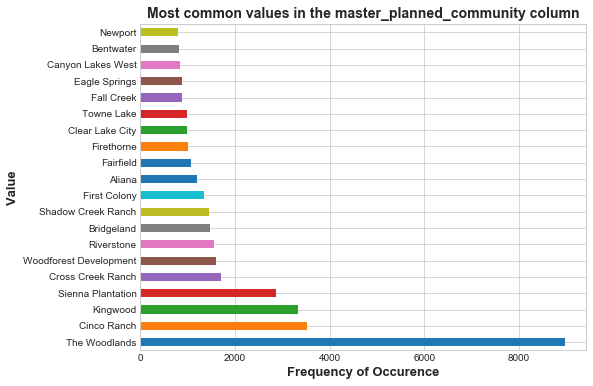


**************************************************

MARKET_AREA

Data type: object
Number of unique values: 182
Number of nulls: 3171 - 0.85%
count               368262
unique                 182
top       Katy - Southwest
freq                 11694
Name: market_area, dtype: object



1960/Cypress                1144
1960/Cypress Creek North    1797
1960/Cypress Creek South    3055
                            ... 
Willow Meadows Area          955
Willowbrook South           1105
Winrock                      265
Name: market_area, Length: 182, dtype: int64

None



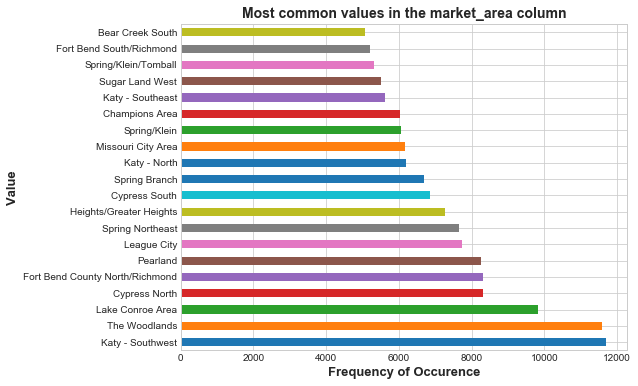


**************************************************

SCHOOL_DISTRICT

Data type: object
Number of unique values: 80
Number of nulls: 1 - 0.0%
count           371432
unique              80
top       27 - Houston
freq             72989
Name: school_district, dtype: object



1 - Aldine                 6002
10 - Columbia-Brazoria      999
100 - Cleveland             574
                          ...  
8 - Channelview             972
9 - Clear Creek           13552
99 - Other                  109
Name: school_district, Length: 80, dtype: int64

None



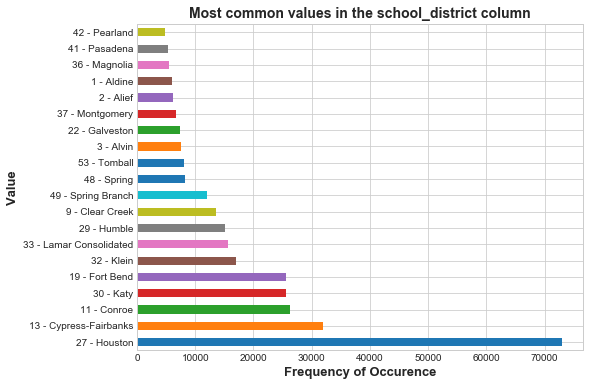


**************************************************

SCHOOL_ELEMENTARY

Data type: object
Number of unique values: 878
Number of nulls: 3364 - 0.91%
count               368069
unique                 878
top       GISD OPEN ENROLL
freq                  7286
Name: school_elementary, dtype: object



A ROBISON ELEMENTARY SCHOOL            696
A.R. TURNER ELEMENTARY SCHOOL         1463
ADAM ELEMENTARY SCHOOL                 502
                                      ... 
YOUNG ELEMENTARY SCHOOL (HOUSTON)      403
YOUNG ELEMENTARY SCHOOL (PASADENA)      97
ZWINK ELEMENTARY SCHOOL                692
Name: school_elementary, Length: 878, dtype: int64

None



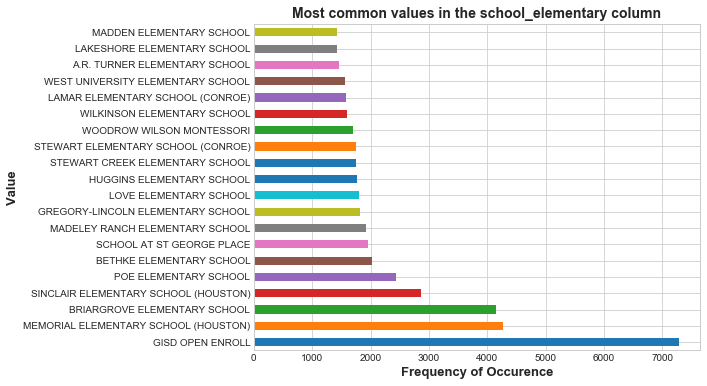


**************************************************

SCHOOL_MIDDLE

Data type: object
Number of unique values: 325
Number of nulls: 2490 - 0.67%
count                           368943
unique                             325
top       HOGG MIDDLE SCHOOL (HOUSTON)
freq                              8439
Name: school_middle, dtype: object



ADAMS MIDDLE SCHOOL                  1
AGUIRRE JUNIOR HIGH                254
ALBRIGHT MIDDLE SCHOOL            1352
                                  ... 
WOODSON MIDDLE SCHOOL              325
WUNDERLICH INTERMEDIATE SCHOOL    1415
YORK JUNIOR HIGH SCHOOL           4708
Name: school_middle, Length: 325, dtype: int64

None



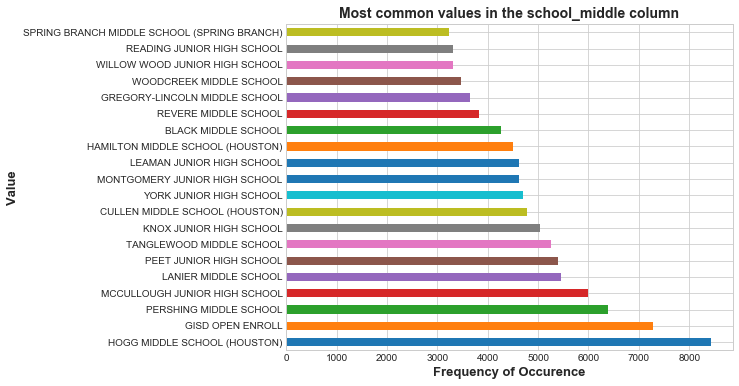


**************************************************

SCHOOL_HIGH

Data type: object
Number of unique values: 223
Number of nulls: 1837 - 0.49%
count                          369596
unique                            223
top       LAMAR HIGH SCHOOL (HOUSTON)
freq                            15100
Name: school_high, dtype: object



AISD DRAW               6114
ALDINE HIGH SCHOOL       497
ALVARADO HIGH SCHOOL       1
                        ... 
WISDOM HIGH SCHOOL      6869
WORTHING HIGH SCHOOL    2457
YATES HIGH SCHOOL       2562
Name: school_high, Length: 223, dtype: int64

None



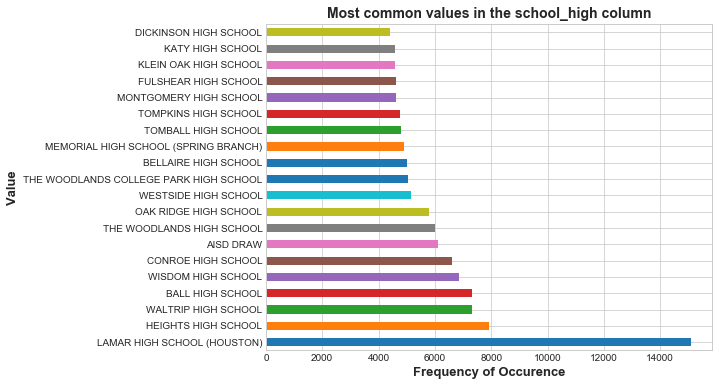


**************************************************

SQ_FT_TOTAL

Data type: float64
Count: 371433
Number of Unique Values: 7223
Number of nulls: 2268 - 0.61%

Mean: 2590.2859561442715
Minimum: 0.0
Lower Quartile: 1747.0
Median: 2330.0
Upper Quartile: 3058.0
Maximum: 21632649.0


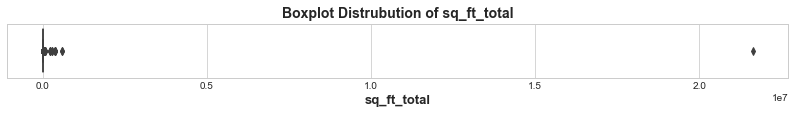

None



0.0        21
1.0         7
1000.0    179
         ... 
999.0      23
9997.0      2
9999.0      3
Name: sq_ft_total, Length: 7223, dtype: int64

None



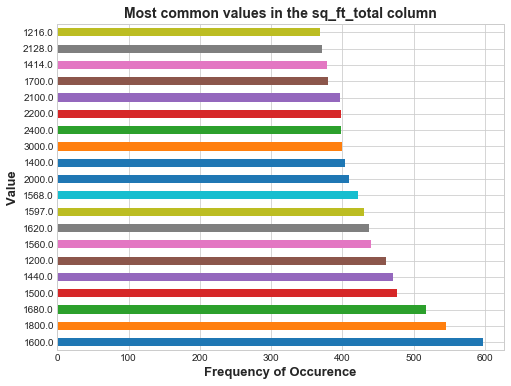


**************************************************

PRICE_SQ_FT_LIST

Data type: object
Number of unique values: 36021
Number of nulls: 2320 - 0.62%
count      369113
unique      36021
top       $100.00
freq          360
Name: price_sq_ft_list, dtype: object



$.00       24
$.01        8
$.02        4
           ..
$994.15     1
$994.90     2
$997.22     1
Name: price_sq_ft_list, Length: 36021, dtype: int64

None



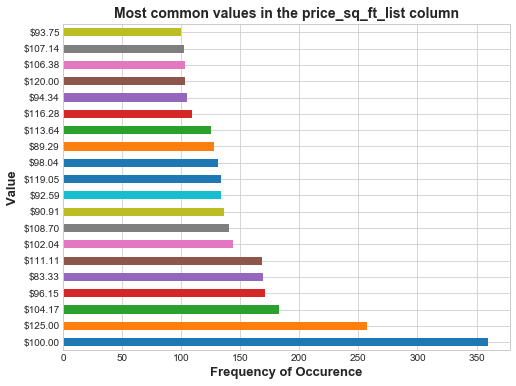


**************************************************

PRICE_SQ_FT_SOLD

Data type: object
Number of unique values: 27562
Number of nulls: 120215 - 32.37%
count     251218
unique     27562
top         $.00
freq       44043
Name: price_sq_ft_sold, dtype: object



$.00       44043
$.06           1
$.12           1
           ...  
$99.98         8
$99.99         4
$997.22        1
Name: price_sq_ft_sold, Length: 27562, dtype: int64

None



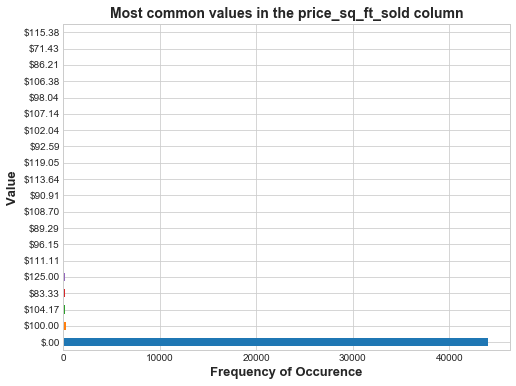


**************************************************

LOT_SIZE

Data type: float64
Count: 371433
Number of Unique Values: 28449
Number of nulls: 45883 - 12.35%

Mean: 20868.795011518967
Minimum: 0.0
Lower Quartile: 6149.0
Median: 7910.0
Upper Quartile: 10761.0
Maximum: 999999999.0


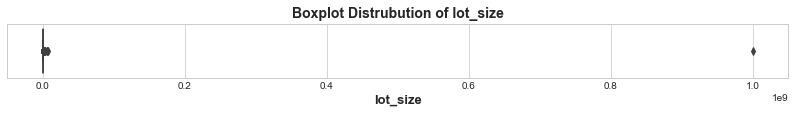

None



0.0            848
1.0              8
100.0            1
              ... 
9998.0           8
9999.0          12
999999999.0      1
Name: lot_size, Length: 28449, dtype: int64

None



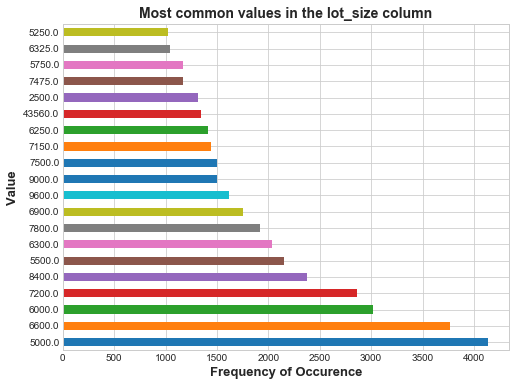


**************************************************

ACRES

Data type: float64
Count: 371433
Number of Unique Values: 11352
Number of nulls: 202340 - 54.48%

Mean: 5.65771462334393
Minimum: 0.0
Lower Quartile: 0.1511
Median: 0.1927
Upper Quartile: 0.2705
Maximum: 152433.0


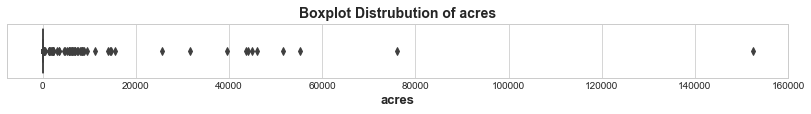

None



0.0       210
0.0011      1
0.0095      1
         ... 
9.982       1
9.991       2
9600.0      1
Name: acres, Length: 11352, dtype: int64

None



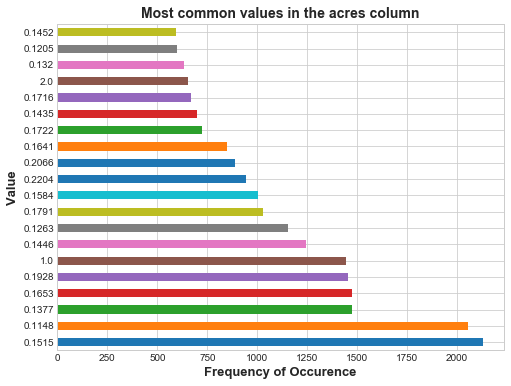


**************************************************

PRICE_ACRE_LIST

Data type: object
Number of unique values: 114744
Number of nulls: 216475 - 58.28%
count       154958
unique      114744
top       $1666667
freq            68
Name: price_acre_list, dtype: object



$          1
$1         1
$100       1
          ..
$99999     1
$999996    1
$999998    1
Name: price_acre_list, Length: 114744, dtype: int64

None



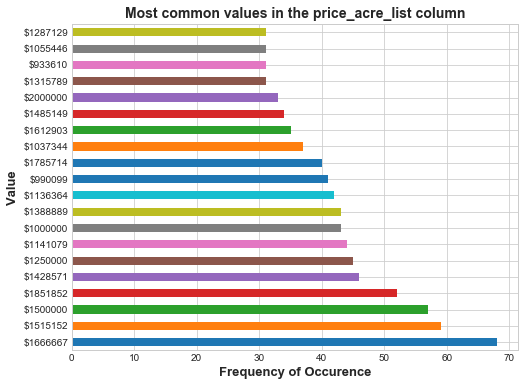


**************************************************

PRICE_ACRE_SALES

Data type: object
Number of unique values: 65722
Number of nulls: 287619 - 77.43%
count        83814
unique       65722
top       $1666667
freq            56
Name: price_acre_sales, dtype: object



$          19
$100        1
$100000    11
           ..
$999753     1
$999971     1
$99999      1
Name: price_acre_sales, Length: 65722, dtype: int64

None



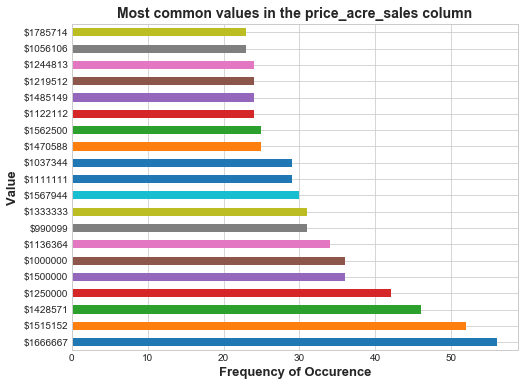


**************************************************

YEAR_BUILT

Data type: float64
Count: 371433
Number of Unique Values: 184
Number of nulls: 1842 - 0.5%

Mean: 2155.9511189395844
Minimum: 0.0
Lower Quartile: 1980.0
Median: 2002.0
Upper Quartile: 2013.0
Maximum: 20002016.0


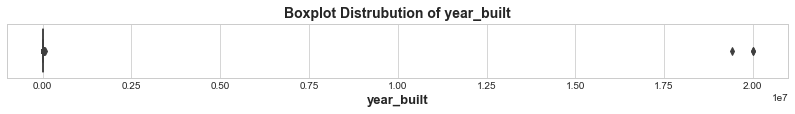

None



0.0        58
1077.0      1
1196.0      1
           ..
7.0         1
77006.0     1
968.0       1
Name: year_built, Length: 184, dtype: int64

None



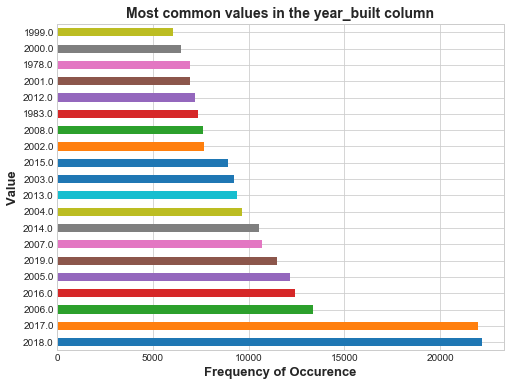


**************************************************

BEDROOMS

Data type: float64
Count: 371433
Number of Unique Values: 19
Number of nulls: 1909 - 0.51%

Mean: 3.509160433422457
Minimum: 0.0
Lower Quartile: 3.0
Median: 4.0
Upper Quartile: 4.0
Maximum: 43.0


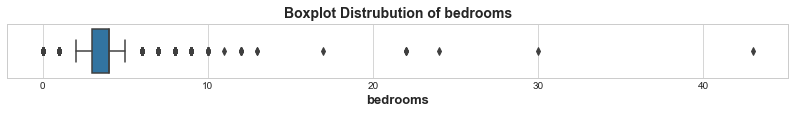

None



0.0      802
1.0     6206
10.0      15
        ... 
7.0      327
8.0       95
9.0       42
Name: bedrooms, Length: 19, dtype: int64

None



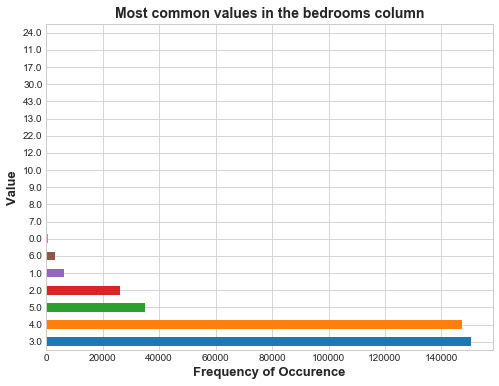


**************************************************

BATHS_FULL

Data type: float64
Count: 371433
Number of Unique Values: 17
Number of nulls: 2285 - 0.62%

Mean: 2.4015679348120536
Minimum: 0.0
Lower Quartile: 2.0
Median: 2.0
Upper Quartile: 3.0
Maximum: 31.0


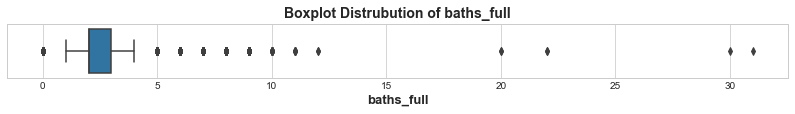

None



0.0       516
1.0     25918
10.0       14
        ...  
7.0       322
8.0       110
9.0        36
Name: baths_full, Length: 17, dtype: int64

None



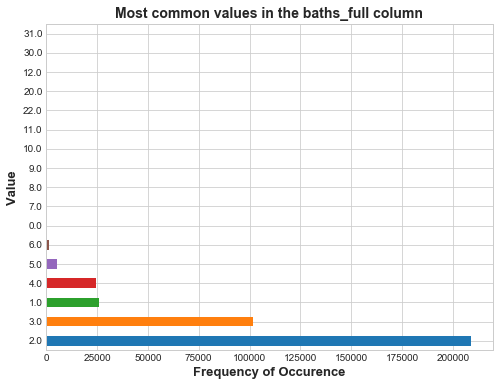


**************************************************

BATHS_HALF

Data type: float64
Count: 371433
Number of Unique Values: 11
Number of nulls: 2287 - 0.62%

Mean: 0.5726731428757186
Minimum: 0.0
Lower Quartile: 0.0
Median: 1.0
Upper Quartile: 1.0
Maximum: 10.0


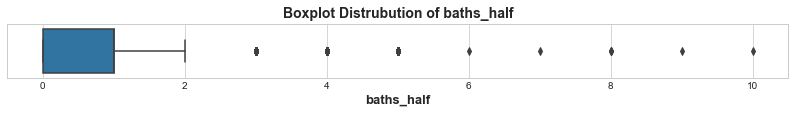

None



0.0     170167
1.0     187932
10.0         1
         ...  
7.0          1
8.0          3
9.0          1
Name: baths_half, Length: 11, dtype: int64

None



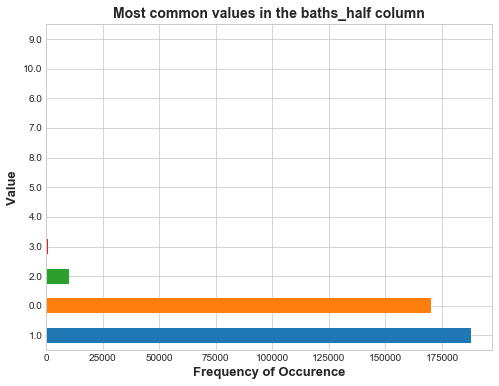


**************************************************

BATHS_TOTAL

Data type: float64
Count: 371433
Number of Unique Values: 80
Number of nulls: 8 - 0.0%

Mean: 2.445416167463149
Minimum: 0.0
Lower Quartile: 2.0
Median: 2.1
Upper Quartile: 3.1
Maximum: 31.1


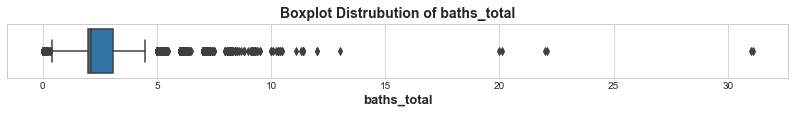

None



0.0    2638
0.1      76
0.2      67
       ... 
9.3       4
9.4       5
9.5       2
Name: baths_total, Length: 80, dtype: int64

None



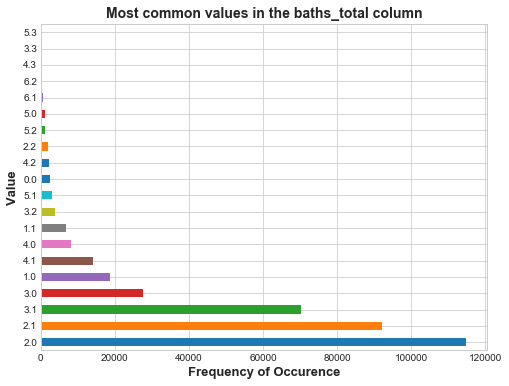


**************************************************

ROOM_COUNT

Data type: float64
Count: 371433
Number of Unique Values: 30
Number of nulls: 3390 - 0.91%

Mean: 8.548650565287208
Minimum: 0.0
Lower Quartile: 6.0
Median: 9.0
Upper Quartile: 11.0
Maximum: 30.0


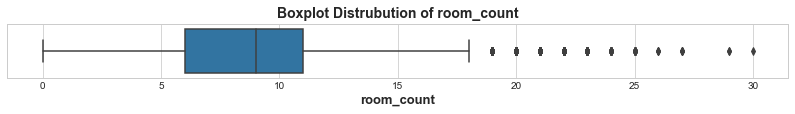

None



0.0       550
1.0      1577
10.0    43374
        ...  
7.0     37578
8.0     47170
9.0     46628
Name: room_count, Length: 30, dtype: int64

None



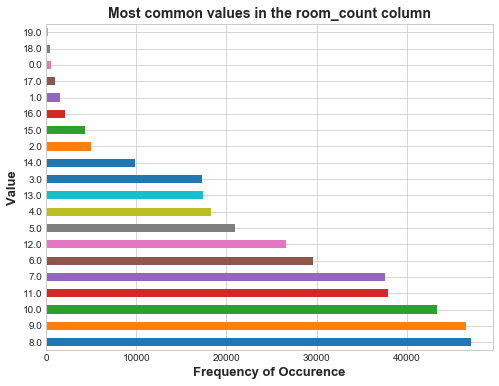


**************************************************

FIREPLACES_NUMBER

Data type: float64
Count: 371433
Number of Unique Values: 17
Number of nulls: 116844 - 31.46%

Mean: 131.31401985160394
Minimum: 0.0
Lower Quartile: 1.0
Median: 1.0
Upper Quartile: 1.0
Maximum: 33181849.0


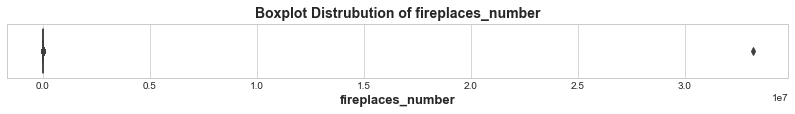

None



0.0      29083
1.0     206286
10.0         1
         ...  
7.0         12
8.0          5
9.0          3
Name: fireplaces_number, Length: 17, dtype: int64

None



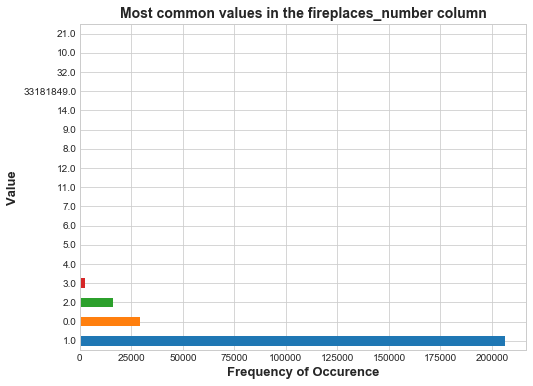


**************************************************

STORIES

Data type: float64
Count: 371433
Number of Unique Values: 54
Number of nulls: 4534 - 1.22%

Mean: 1.6926093557082469
Minimum: -1.0
Lower Quartile: 1.0
Median: 2.0
Upper Quartile: 2.0
Maximum: 8646.0


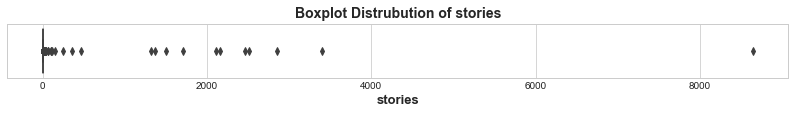

None



-1.0           2
0.0          128
1.0       165592
           ...  
8.0            9
8646.0         1
9.0            7
Name: stories, Length: 54, dtype: int64

None



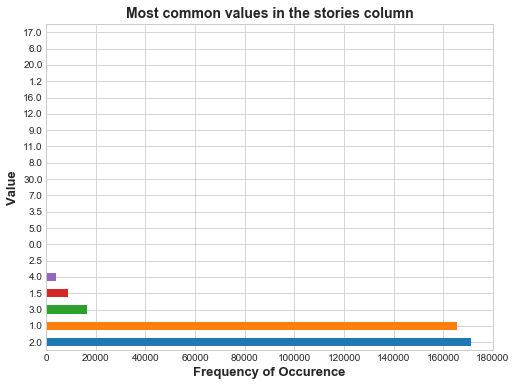


**************************************************

NEW_CONSTRUCTION

Data type: bool
Number of unique values: 2
Number of nulls: 0 - 0.0%
count     371433
unique         2
top        False
freq      306068
Name: new_construction, dtype: object



False    306068
True      65365
Name: new_construction, dtype: int64

None



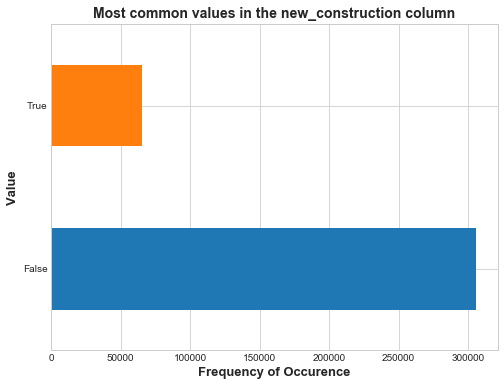


**************************************************

NEW_CONSTRUCTION_DESC

Data type: object
Number of unique values: 2
Number of nulls: 306068 - 82.4%
count                              65365
unique                                 2
top       To Be Built/Under Construction
freq                               40327
Name: new_construction_desc, dtype: object



Never Lived In                    25038
To Be Built/Under Construction    40327
Name: new_construction_desc, dtype: int64

None



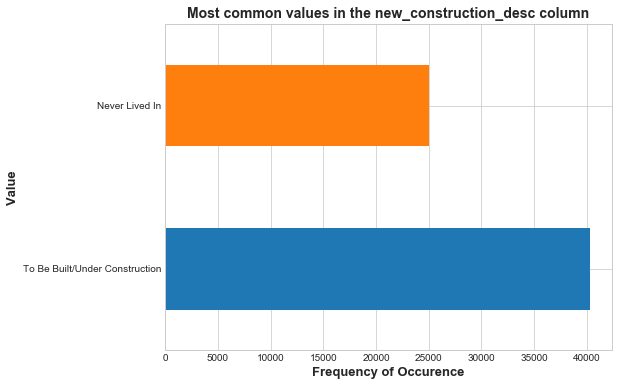


**************************************************

POOL_PRIVATE

Data type: object
Number of unique values: 2
Number of nulls: 2285 - 0.62%
count     369148
unique         2
top        False
freq      324036
Name: pool_private, dtype: object



False    324036
True      45112
Name: pool_private, dtype: int64

None



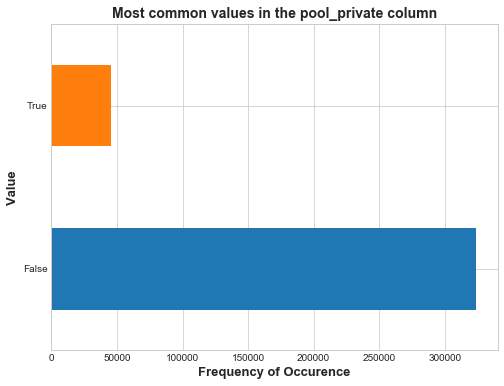


**************************************************

NO_OF_GARAGE_CAP

Data type: float64
Count: 371433
Number of Unique Values: 62
Number of nulls: 6749 - 1.82%

Mean: 2.778441061302388
Minimum: 0.0
Lower Quartile: 2.0
Median: 2.0
Upper Quartile: 2.0
Maximum: 260120.0


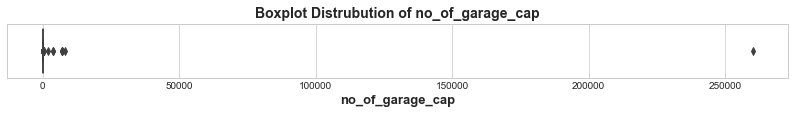

None



0.0       36796
1.0       19962
10.0         30
          ...  
8.0          86
8234.0        1
9.0          27
Name: no_of_garage_cap, Length: 62, dtype: int64

None



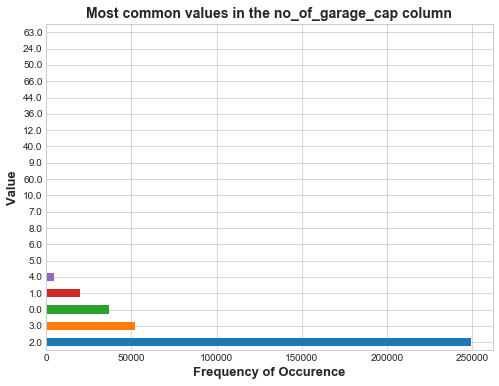


**************************************************

STYLE

Data type: object
Number of unique values: 260
Number of nulls: 7026 - 1.89%
count          364407
unique            260
top       Traditional
freq           282259
Name: style, dtype: object



Colonial                                    2055
Colonial, Contemporary/Modern                 49
Colonial, Contemporary/Modern, English         4
                                           ...  
Traditional                               282259
Traditional, Victorian                       285
Victorian                                   1112
Name: style, Length: 260, dtype: int64

None



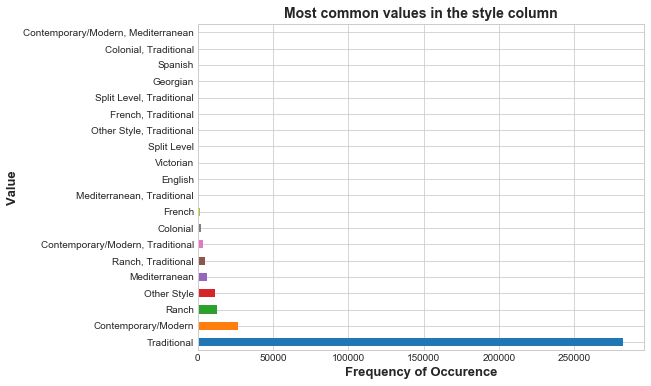


**************************************************

DOM

Data type: float64
Count: 371433
Number of Unique Values: 941
Number of nulls: 1 - 0.0%

Mean: 70.37576191604386
Minimum: -173.0
Lower Quartile: 13.0
Median: 43.0
Upper Quartile: 99.0
Maximum: 3529.0


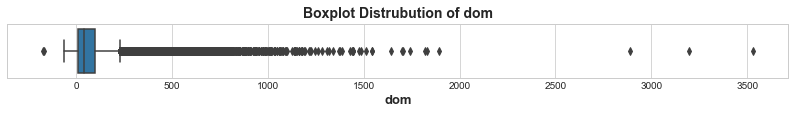

None



-1.0     15
-10.0     5
-12.0     1
         ..
990.0     1
993.0     1
995.0     1
Name: dom, Length: 941, dtype: int64

None



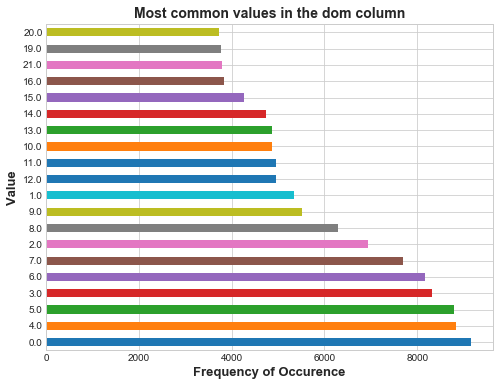


**************************************************

CDOM

Data type: int64
Count: 371433
Number of Unique Values: 1527
Number of nulls: 0 - 0.0%

Mean: 108.93697921294016
Minimum: -173
Lower Quartile: 16.0
Median: 61.0
Upper Quartile: 148.0
Maximum: 5115


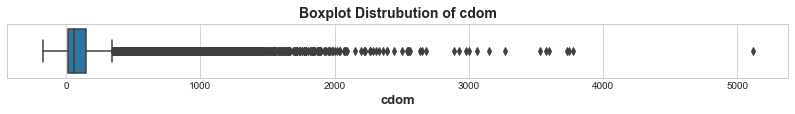

None



-1     8
-10    5
-12    1
      ..
997    5
998    1
999    4
Name: cdom, Length: 1527, dtype: int64

None



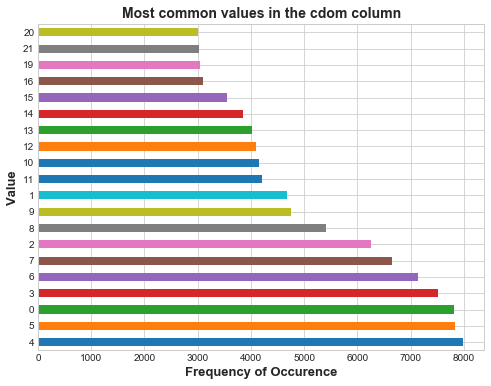


**************************************************

LIST_OFFICE_MLSID

Data type: object
Number of unique values: 5644
Number of nulls: 4 - 0.0%
count     371429
unique      5644
top       KWWD01
freq        5911
Name: list_office_mlsid, dtype: object



AAAD01           13
AAAM01           35
AAAM01           26
               ... 
walz01          323
wwrw01           16
zhao01           18
Name: list_office_mlsid, Length: 5644, dtype: int64

None



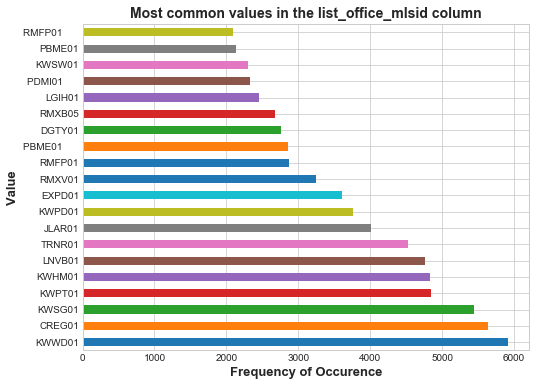


**************************************************

LIST_OFFICE_NAME

Data type: object
Number of unique values: 5422
Number of nulls: 4 - 0.0%
count                371429
unique                 5422
top       BHGRE Gary Greene
freq                  14324
Name: list_office_name, dtype: object



 Ayala Dream Homes                                   2
 Live Texan Realty                                   2
 STOA International Realty Realty Services, Inc.     3
                                                    ..
iPro Real Estate                                     6
iSelect Realty                                      11
iTheRealtor.com                                      6
Name: list_office_name, Length: 5422, dtype: int64

None



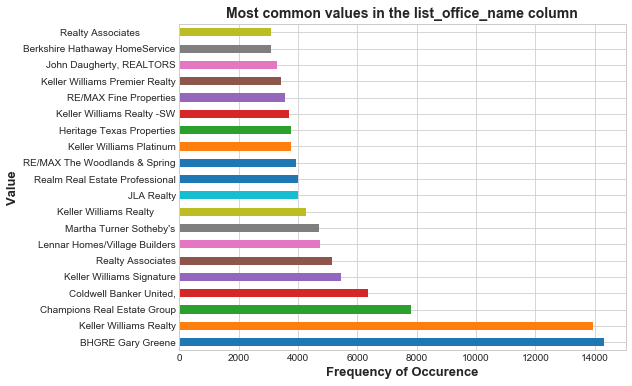


**************************************************

LIST_AGENT_MLSID

Data type: object
Number of unique values: 28788
Number of nulls: 3 - 0.0%
count     371430
unique     28788
top        Loken
freq        5383
Name: list_agent_mlsid, dtype: object



*Nabeel      1
0671027      1
149139rs     1
            ..
zwingle     46
zxu          2
zzz          4
Name: list_agent_mlsid, Length: 28788, dtype: int64

None



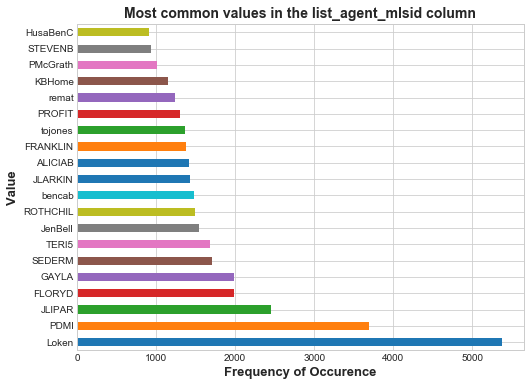


**************************************************

LIST_AGENT_FULL_NAME

Data type: object
Number of unique values: 27609
Number of nulls: 3 - 0.0%
count          371430
unique          27609
top       Lance Loken
freq             7594
Name: list_agent_full_name, dtype: object



(KC) Chau Hoang     11
A. Dana Busa         1
A. Selena Barr       8
                    ..
Zulma Fuentes       13
Zuri Perez-Majul    47
Zvetlana Solomie    18
Name: list_agent_full_name, Length: 27609, dtype: int64

None



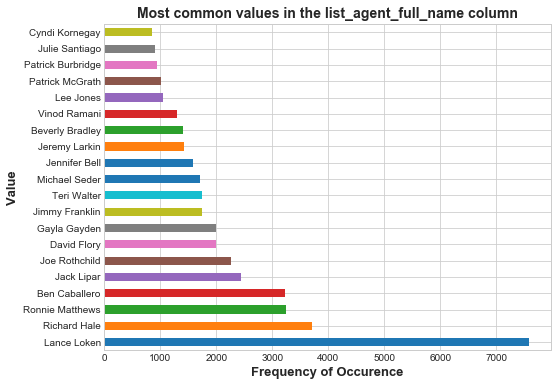


**************************************************

SELLING_OFFICE_MLSID

Data type: object
Number of unique values: 5112
Number of nulls: 150289 - 40.46%
count     221144
unique      5112
top       nonmls
freq       12584
Name: selling_office_mlsid, dtype: object



AAAD01           4
AAAM01          21
AAAM01           9
                ..
wlba01           1
wwrw01          13
zhao01           9
Name: selling_office_mlsid, Length: 5112, dtype: int64

None



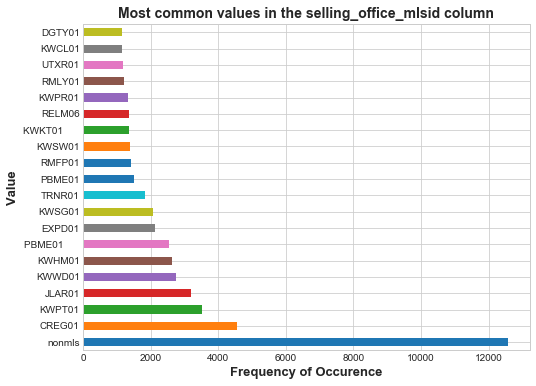


**************************************************

SELLING_OFFICE_NAME

Data type: object
Number of unique values: 4887
Number of nulls: 150290 - 40.46%
count                221143
unique                 4887
top       BHGRE Gary Greene
freq                   9285
Name: selling_office_name, dtype: object



 Key Real Estate                                     1
 Live Texan Realty                                   2
 STOA International Realty Realty Services, Inc.     2
                                                    ..
iPro Real Estate                                     6
iSelect Realty                                      10
iTheRealtor.com                                      1
Name: selling_office_name, Length: 4887, dtype: int64

None



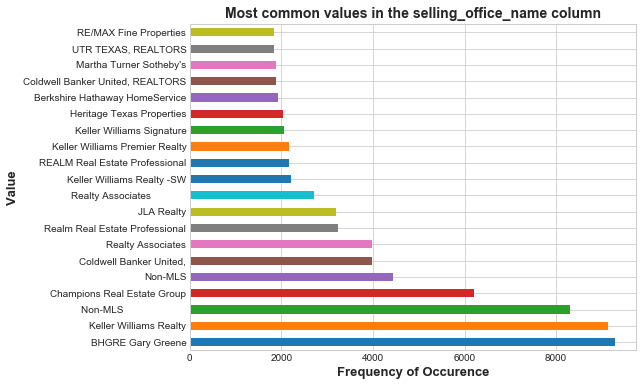


**************************************************

SELLING_AGENT_MLSID

Data type: object
Number of unique values: 33546
Number of nulls: 150242 - 40.45%
count     221191
unique     33546
top       nonmls
freq       10744
Name: selling_agent_mlsid, dtype: object



***        1
105344     1
1STAR1     1
          ..
zyang      1
zzhang     1
zzz       26
Name: selling_agent_mlsid, Length: 33546, dtype: int64

None



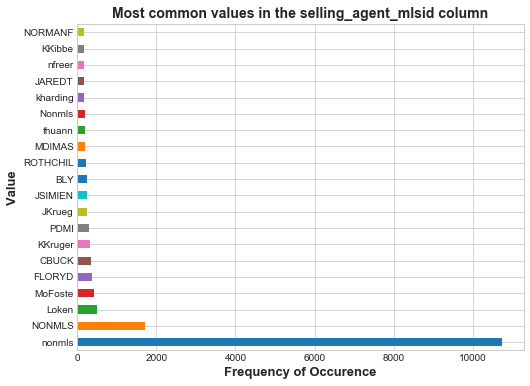


**************************************************

SELLING_AGENT_FULL_NAME

Data type: object
Number of unique values: 28407
Number of nulls: 150249 - 40.45%
count             221184
unique             28407
top        Non-MLS Agent
freq                7029
Name: selling_agent_full_name, dtype: object



 Non-MLS Agent      7029
(KC) Chau Hoang       12
A. Selena Barr        10
                    ... 
Zulma Fuentes         16
Zuri Perez-Majul      36
Zvetlana Solomie      14
Name: selling_agent_full_name, Length: 28407, dtype: int64

None



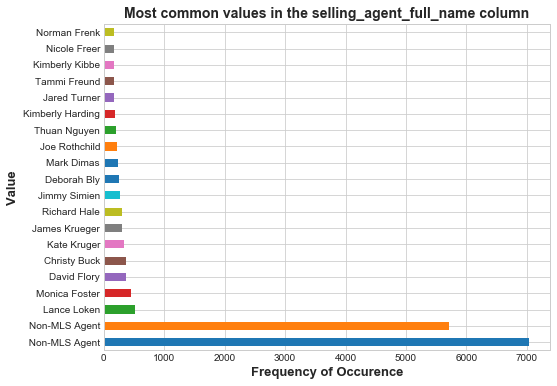


**************************************************

REALIST_OWNER_NAME

Data type: object
Number of unique values: 79842
Number of nulls: 266296 - 71.69%
count            105137
unique            79842
top       Current Owner
freq               1164
Name: realist_owner_name, dtype: object



\tJanie Holmes        1
 Abraham Guererro     1
 Angela Rita Pratt    1
                     ..
james blanton         1
ocwen                 8
pawlak                1
Name: realist_owner_name, Length: 79842, dtype: int64

None



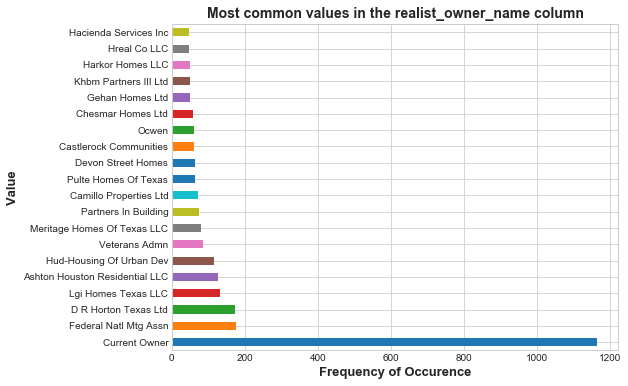


**************************************************

LAST_CHANGE_TIMESTAMP

Data type: object
Number of unique values: 339789
Number of nulls: 15 - 0.0%
count                     371418
unique                    339789
top       11/01/2017 12:30:02 AM
freq                         248
Name: last_change_timestamp, dtype: object



01/01/2017 10:16:01 PM    1
01/01/2017 11:01:00 AM    1
01/01/2017 11:04:54 AM    1
                         ..
12/31/2018 9:56:25 AM     1
12/31/2018 9:58:01 PM     1
12/31/2018 9:58:54 AM     1
Name: last_change_timestamp, Length: 339789, dtype: int64

None



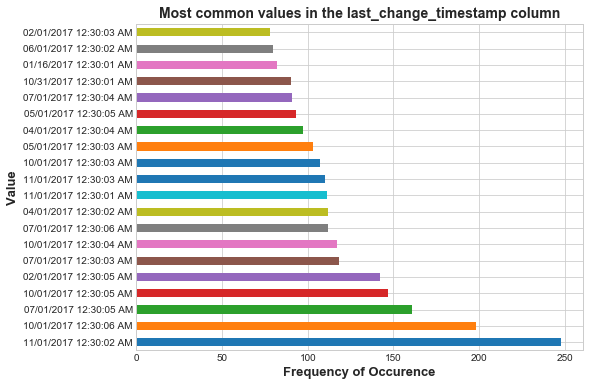


**************************************************

LIST_DATE

Data type: object
Number of unique values: 1675
Number of nulls: 0 - 0.0%
count                     371433
unique                      1675
top       06/01/2018 12:00:00 AM
freq                         787
Name: list_date, dtype: object



01/01/2016 12:00:00 AM      5
01/01/2017 12:00:00 AM    204
01/01/2018 12:00:00 AM    178
                         ... 
12/31/2016 12:00:00 AM     76
12/31/2017 12:00:00 AM     50
12/31/2018 12:00:00 AM    117
Name: list_date, Length: 1675, dtype: int64

None



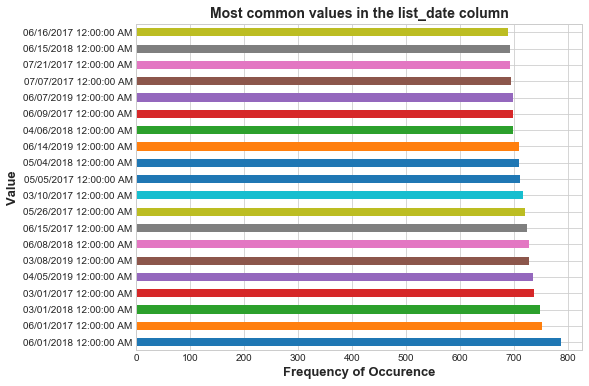


**************************************************



In [13]:
preview_cols(df)

## Cleaning

#### Removing Realtor, Office, and Agent Columns

For the purposes of this project, I am not interested in the information on the listing and selling agents and offices, or the realtors. I will remove these columns.

In [14]:
df.drop(columns=['list_office_mlsid', 'list_office_name', 'list_agent_mlsid', 'list_agent_full_name', 'selling_office_mlsid', 'selling_office_name', 'selling_agent_mlsid', 'selling_agent_full_name', 'realist_owner_name'], inplace=True)

### Checking Nulls

In [15]:
nulls = pd.DataFrame({"total nulls":df.isna().sum(),"percentage %":round(df.isna().sum()/len(df)*100,2)})
nulls

,total nulls,percentage %
mls_number,0,0.00
property_type,0,0.00
status,0,0.00
street_number,1,0.00
street_name,0,0.00
unit_number,347873,93.66
city,20,0.01
zip_code,0,0.00
county,0,0.00
list_price,0,0.00


## Last Change Timestamp

In [16]:
df[df.last_change_timestamp.isna()]

,mls_number,property_type,status,street_number,street_name,unit_number,city,zip_code,county,list_price,close_price,close_date,area,subdivision,master_planned_community,market_area,school_district,school_elementary,school_middle,school_high,sq_ft_total,price_sq_ft_list,price_sq_ft_sold,lot_size,acres,price_acre_list,price_acre_sales,year_built,bedrooms,baths_full,baths_half,baths_total,room_count,fireplaces_number,stories,new_construction,new_construction_desc,pool_private,no_of_garage_cap,style,dom,cdom,last_change_timestamp,list_date
351231,94945289,Multi-Family,Active,2901,Avenue F,NaN,Rosenberg,77471,Fort Bend,$200000,NaN,NaN,30.0,SMITHEY S/D,NaN,Fort Bend South/Richmond,33 - Lamar Consolidated,JACKSON ELEMENTARY SCHOOL (LAMAR),WERTHEIMER/BRISCOE JUNIOR HIGH SCHOOL,FOSTER HIGH SCHOOL,2736.0,$73.10,$.00,9000.0,NaN,NaN,NaN,1930.0,NaN,NaN,NaN,0.0,NaN,NaN,1.0,False,NaN,NaN,NaN,NaN,3529.0,3529,NaN,10/20/2009 12:00:00 AM
364814,72861114,Single-Family,Pending,9431,Charterlawn,NaN,Houston,77070,Harris,$122000,NaN,NaN,13.0,Charterwood Sec 06,NaN,Champions Area,32 - Klein,BRILL ELEMENTARY SCHOOL,KLEB INTERMEDIATE SCHOOL,KLEIN CAIN HIGH SCHOOL,1560.0,$78.21,$.00,7088.0,NaN,NaN,NaN,1979.0,3.0,2.0,0.0,2.0,6.0,NaN,1.0,False,NaN,False,2.0,Contemporary/Modern,25.0,25,NaN,05/15/2015 12:00:00 AM
365355,31594547,Single-Family,Pending,913,Romeo,NaN,Pasadena,77502,Harris,$165000,NaN,NaN,6.0,Williams T E R P,NaN,Pasadena,41 - Pasadena,BAILEY ELEMENTARY SCHOOL,PARKVIEW INTERMEDIATE SCHOOL,SAM RAYBURN HIGH SCHOOL,2229.0,$74.02,$.00,11400.0,NaN,NaN,NaN,2003.0,3.0,2.0,0.0,2.0,8.0,NaN,1.0,False,NaN,False,2.0,Traditional,8.0,8,NaN,08/31/2015 12:00:00 AM
369495,242993,Single-Family,Withdrawn,3110,River,NaN,NaN,77339,Harris,$89900,NaN,NaN,32.0,HUNTERS RIDGE,NaN,Kingwood West,29 - Humble,GREENTREE ELEMENTARY SCHOOL,CREEKWOOD MIDDLE SCHOOL,KINGWOOD HIGH SCHOOL,1675.0,$53.67,NaN,8334.0,NaN,NaN,NaN,1980.0,3.0,2.0,1.0,2.1,8.0,1.0,2.0,False,NaN,False,2.0,Traditional,NaN,0,NaN,07/18/1999 12:00:00 AM
369500,20204503,Townhouse/Condo,Withdrawn,2475,Underwood,269,Houston,77030,Harris,$90000,NaN,NaN,17.0,BRENTWOOD COND,NaN,Rice/Museum District,27 - Houston,ROBERTS ELEMENTARY SCHOOL (HOUSTON),PERSHING MIDDLE SCHOOL,LAMAR HIGH SCHOOL (HOUSTON),860.0,$104.65,$.00,0.0,NaN,NaN,NaN,1977.0,1.0,1.0,0.0,1.0,4.0,NaN,1.0,False,NaN,False,0.0,Traditional,22.0,122,NaN,07/08/2011 12:00:00 AM
369536,60117744,Single-Family,Withdrawn,3131,Eastex Fw,NaN,Houston,77026,Harris,$100000,NaN,NaN,9.0,BARNES WETMORE LETTER BLKS,NaN,Northside,27 - Houston,ROSS ELEMENTARY SCHOOL (HOUSTON),FLEMING MIDDLE SCHOOL,NORTHSIDE HIGH SCHOOL,1912.0,$52.30,$.00,4000.0,NaN,NaN,NaN,1960.0,2.0,2.0,0.0,2.0,2.0,NaN,1.0,False,NaN,False,2.0,Traditional,1193.0,1928,NaN,09/09/2011 12:00:00 AM
369551,5006755,Single-Family,Withdrawn,6322,Cape Forward,NaN,Houston,77083,Harris,$114999,NaN,NaN,28.0,PHEASANT RUN 2 & R/P,NaN,Alief,2 - Alief,MAHANAY ELEMENTARY SCHOOL,O'DONNELL MIDDLE SCHOOL,OTHER,2571.0,$44.73,$.00,5250.0,NaN,NaN,NaN,1979.0,3.0,2.0,0.0,2.0,7.0,1.0,1.0,False,NaN,False,2.0,Colonial,45.0,45,NaN,06/14/2003 12:00:00 AM
369763,2673795,Single-Family,Withdrawn,2303,Cherry,NaN,Houston,77077,Harris,$163500,NaN,NaN,31.0,SOUTHLAKE 3,NaN,Energy Corridor,27 - Houston,ASHFORD/SHADOWBRIAR ELEMENTARY SCHOOL,WEST BRIAR MIDDLE SCHOOL,WESTSIDE HIGH SCHOOL,2160.0,$75.69,$.00,7350.0,NaN,NaN,NaN,1976.0,3.0,2.0,0.0,2.0,8.0,NaN,1.5,False,NaN,False,2.0,Contemporary/Modern,142.0,288,NaN,01/10/2006 12:00:00 AM
369928,29983410,Single-Family,Withdrawn,12014,Brantley Haven,NaN,Tomball,77375,Harris,$185000,NaN,NaN,14.0,Northpointe East Sec 02,NaN,Spring/Klein/Tomball,32 - Klein,KOHRVILLE ELEMENTARY SCHOOL,ULRICH INTERMEDIATE SCHOOL,KLEIN HIGH SCHOOL,2034.0,$90.95,$.00,7305.0,NaN,NaN,NaN,2002.0,3.0,2.0,0.0,2.0,10.0,NaN,1.0,False,NaN,False,2.0,Ranch,2.0,2,NaN,03/20/2015 12:00:00 AM
370012,637322,Single-Family,Withdrawn,7907,Glen Dell,NaN,Houston,77061,Harris,$199000,NaN,NaN,3.0,GLENBROOK VALLEY,NaN,Hobby Area,27 - Houston,PARK PLACE ELEM

Most of the null values in this column are for listings that were withdrawn. As there are only 15, I will remove these rows.

In [17]:
df = df[~df.last_change_timestamp.isna()]

Now I can change the format of this column to the datetime format.

In [18]:
df.last_change_timestamp = pd.to_datetime(df.last_change_timestamp)

## MLS Information

### MLS Number

This column provides the identification for each MLS listing. I will first check for duplicates.

In [19]:
view(df['mls_number'].value_counts(),7)

57439510    2
2672601     2
27536588    2
86703074    2
81206066    2
42844653    1
55425506    1
           ..
8983944     1
17796630    1
15273355    1
33109388    1
8469901     1
67184014    1
55574528    1
Name: mls_number, Length: 371413, dtype: int64

In [20]:
df[df.mls_number==57439510]

,mls_number,property_type,status,street_number,street_name,unit_number,city,zip_code,county,list_price,close_price,close_date,area,subdivision,master_planned_community,market_area,school_district,school_elementary,school_middle,school_high,sq_ft_total,price_sq_ft_list,price_sq_ft_sold,lot_size,acres,price_acre_list,price_acre_sales,year_built,bedrooms,baths_full,baths_half,baths_total,room_count,fireplaces_number,stories,new_construction,new_construction_desc,pool_private,no_of_garage_cap,style,dom,cdom,last_change_timestamp,list_date
305730,57439510,Single-Family,Withdrawn,1601,Callaway,NaN,Alvin,77511,Brazoria,$252900,NaN,NaN,5.0,Hooper & Wade,NaN,Alvin South,3 - Alvin,MELBA PASSMORE ELEMENTARY SCHOOL,ALVIN JUNIOR HIGH SCHOOL,ALVIN HIGH SCHOOL,2386.0,$105.99,NaN,43560.0,1.0,$252900,NaN,1958.0,4.0,2.0,0.0,2.0,8.0,1.0,1.0,False,NaN,False,2.0,Traditional,42.0,69,2019-06-16 19:02:11,03/20/2019 12:00:00 AM
343827,57439510,Single-Family,Active,1601,Callaway,NaN,Alvin,77511,Brazoria,$245900,NaN,NaN,5.0,Hooper & Wade,NaN,Alvin South,3 - Alvin,MELBA PASSMORE ELEMENTARY SCHOOL,ALVIN JUNIOR HIGH SCHOOL,ALVIN HIGH SCHOOL,2386.0,$103.06,NaN,43560.0,1.0,$245900,NaN,1958.0,4.0,2.0,0.0,2.0,8.0,1.0,1.0,False,NaN,False,2.0,Traditional,42.0,69,2019-06-19 15:45:28,03/20/2019 12:00:00 AM


In [21]:
df[df.mls_number==86703074]

,mls_number,property_type,status,street_number,street_name,unit_number,city,zip_code,county,list_price,close_price,close_date,area,subdivision,master_planned_community,market_area,school_district,school_elementary,school_middle,school_high,sq_ft_total,price_sq_ft_list,price_sq_ft_sold,lot_size,acres,price_acre_list,price_acre_sales,year_built,bedrooms,baths_full,baths_half,baths_total,room_count,fireplaces_number,stories,new_construction,new_construction_desc,pool_private,no_of_garage_cap,style,dom,cdom,last_change_timestamp,list_date
291473,86703074,Single-Family,Sold,5812,Gardendale,A,Houston,77092,Harris,$279900,$275000,04/30/2019 12:00:00 AM,24.0,Villas at Gardendale,NaN,Spring Branch,27 - Houston,BENBROOK ELEMENTARY SCHOOL (HOUSTON),CLIFTON MIDDLE SCHOOL (HOUSTON),SCARBOROUGH HIGH SCHOOL,1562.0,$179.19,$176.06,1749.0,NaN,NaN,NaN,2018.0,3.0,2.0,1.0,2.1,3.0,NaN,2.0,True,Never Lived In,False,2.0,Contemporary/Modern,171.0,171,2019-05-08 00:13:45,10/24/2018 12:00:00 AM
367403,86703074,Single-Family,Pending,5812,Gardendale,A,Houston,77092,Harris,$279900,NaN,NaN,24.0,Villas at Gardendale,NaN,Spring Branch,27 - Houston,BENBROOK ELEMENTARY SCHOOL (HOUSTON),CLIFTON MIDDLE SCHOOL (HOUSTON),SCARBOROUGH HIGH SCHOOL,1562.0,$179.19,NaN,1749.0,NaN,NaN,NaN,2018.0,3.0,2.0,1.0,2.1,3.0,NaN,2.0,True,Never Lived In,False,2.0,Contemporary/Modern,171.0,171,2019-04-19 14:53:45,10/24/2018 12:00:00 AM


In [22]:
df[df.mls_number==2672601]

,mls_number,property_type,status,street_number,street_name,unit_number,city,zip_code,county,list_price,close_price,close_date,area,subdivision,master_planned_community,market_area,school_district,school_elementary,school_middle,school_high,sq_ft_total,price_sq_ft_list,price_sq_ft_sold,lot_size,acres,price_acre_list,price_acre_sales,year_built,bedrooms,baths_full,baths_half,baths_total,room_count,fireplaces_number,stories,new_construction,new_construction_desc,pool_private,no_of_garage_cap,style,dom,cdom,last_change_timestamp,list_date
331332,2672601,Single-Family,Active,1007,Bunton Street,NaN,Houston,77009,Harris,$330000,NaN,NaN,NaN,TIMBER HO,NaN,NaN,27 - Houston,NaN,NaN,NaN,1714.0,$192.53,NaN,3275.0,NaN,NaN,NaN,2019.0,3.0,2.0,1.0,2.1,8.0,0.0,2.0,True,Never Lived In,False,0.0,Other Style,27.0,27,2019-06-19 23:10:13,04/17/2019 12:00:00 AM
370668,2672601,Single-Family,Withdrawn,1007,Bunton Street,NaN,Houston,77009,Harris,$330000,NaN,NaN,NaN,TIMBER HO,NaN,NaN,27 - Houston,NaN,NaN,NaN,1714.0,$192.53,NaN,3275.0,NaN,NaN,NaN,2019.0,3.0,2.0,1.0,2.1,8.0,0.0,2.0,True,Never Lived In,False,0.0,Other Style,27.0,27,2019-05-14 12:14:16,04/17/2019 12:00:00 AM


In [23]:
df[df.mls_number==81206066]

,mls_number,property_type,status,street_number,street_name,unit_number,city,zip_code,county,list_price,close_price,close_date,area,subdivision,master_planned_community,market_area,school_district,school_elementary,school_middle,school_high,sq_ft_total,price_sq_ft_list,price_sq_ft_sold,lot_size,acres,price_acre_list,price_acre_sales,year_built,bedrooms,baths_full,baths_half,baths_total,room_count,fireplaces_number,stories,new_construction,new_construction_desc,pool_private,no_of_garage_cap,style,dom,cdom,last_change_timestamp,list_date
301878,81206066,Single-Family,Sold,18303,Otter Creek,NaN,Humble,77346,Harris,$164000,$121111,06/11/2019 12:00:00 AM,1.0,Eagle Spgs Sec 04,Eagle Springs,Atascocita South,29 - Humble,EAGLE SPRINGS ELEMENTARY SCHOOL,TIMBERWOOD MIDDLE SCHOOL,ATASCOCITA HIGH SCHOOL,2160.0,$75.93,$56.07,8360.0,0.1919,$854612,$631115,2003.0,4.0,2.0,0.0,2.0,7.0,1.0,1.0,False,NaN,False,2.0,Traditional,33.0,33,2019-06-14 19:23:28,03/21/2019 12:00:00 AM
337115,81206066,Single-Family,Active,18303,Otter Creek,NaN,Humble,77346,Harris,$164000,NaN,NaN,1.0,Eagle Spgs Sec 04,Eagle Springs,Atascocita South,29 - Humble,EAGLE SPRINGS ELEMENTARY SCHOOL,TIMBERWOOD MIDDLE SCHOOL,ATASCOCITA HIGH SCHOOL,2160.0,$75.93,NaN,8360.0,0.1919,$854612,NaN,2003.0,4.0,2.0,0.0,2.0,7.0,1.0,1.0,False,NaN,False,2.0,Traditional,35.0,35,2019-06-17 15:11:59,03/21/2019 12:00:00 AM


In [24]:
df[df.mls_number==27536588]

,mls_number,property_type,status,street_number,street_name,unit_number,city,zip_code,county,list_price,close_price,close_date,area,subdivision,master_planned_community,market_area,school_district,school_elementary,school_middle,school_high,sq_ft_total,price_sq_ft_list,price_sq_ft_sold,lot_size,acres,price_acre_list,price_acre_sales,year_built,bedrooms,baths_full,baths_half,baths_total,room_count,fireplaces_number,stories,new_construction,new_construction_desc,pool_private,no_of_garage_cap,style,dom,cdom,last_change_timestamp,list_date
304244,27536588,Single-Family,Sold,911,17th,NaN,Texas City,77590,Galveston,$135000,$1400,06/07/2019 12:00:00 AM,33.0,Texas City,NaN,Texas City,52 - Texas City,ROOSEVELT-WILSON ELEMENTARY SCHOOL,BLOCKER MIDDLE SCHOOL,TEXAS CITY HIGH SCHOOL,1381.0,$97.76,$1.01,8125.0,0.1865,$723861,$7507,1970.0,3.0,1.0,1.0,1.1,4.0,NaN,1.0,False,NaN,False,0.0,Traditional,1.0,1,2019-06-07 19:50:40,06/06/2019 12:00:00 AM
317803,27536588,Single-Family,Terminated,911,17th,NaN,Texas City,77590,Galveston,$135000,NaN,NaN,33.0,Texas City,NaN,Texas City,52 - Texas City,ROOSEVELT-WILSON ELEMENTARY SCHOOL,BLOCKER MIDDLE SCHOOL,TEXAS CITY HIGH SCHOOL,1381.0,$97.76,NaN,8125.0,0.1865,$723861,NaN,1970.0,3.0,1.0,1.0,1.1,4.0,NaN,1.0,False,NaN,False,0.0,Traditional,1.0,1,2019-06-19 12:38:24,06/06/2019 12:00:00 AM


#### Drop Duplicates
It looks like for each of the 5 duplicates, one listing was always more updated than the other. I will keep the appropriate one for each.

In [25]:
df.iloc[[305730, 367403, 370668, 301878, 304244]]

,mls_number,property_type,status,street_number,street_name,unit_number,city,zip_code,county,list_price,close_price,close_date,area,subdivision,master_planned_community,market_area,school_district,school_elementary,school_middle,school_high,sq_ft_total,price_sq_ft_list,price_sq_ft_sold,lot_size,acres,price_acre_list,price_acre_sales,year_built,bedrooms,baths_full,baths_half,baths_total,room_count,fireplaces_number,stories,new_construction,new_construction_desc,pool_private,no_of_garage_cap,style,dom,cdom,last_change_timestamp,list_date
305730,57439510,Single-Family,Withdrawn,1601,Callaway,NaN,Alvin,77511,Brazoria,$252900,NaN,NaN,5.0,Hooper & Wade,NaN,Alvin South,3 - Alvin,MELBA PASSMORE ELEMENTARY SCHOOL,ALVIN JUNIOR HIGH SCHOOL,ALVIN HIGH SCHOOL,2386.0,$105.99,NaN,43560.0,1.0000,$252900,NaN,1958.0,4.0,2.0,0.0,2.0,8.0,1.0,1.0,False,NaN,False,2.0,Traditional,42.0,69,2019-06-16 19:02:11,03/20/2019 12:00:00 AM
367406,56115309,Single-Family,Pending,10034,Hillside Bayou,NaN,Houston,77080,Harris,$279990,NaN,NaN,24.0,Shadow Spgs Sec 01,NaN,Spring Branch,49 - Spring Branch,PINE SHADOWS ELEMENTARY SCHOOL,SPRING WOODS MIDDLE SCHOOL,SPRING WOODS HIGH SCHOOL,1932.0,$144.92,NaN,2400.0,0.0551,$5081488,NaN,2009.0,3.0,2.0,1.0,2.1,8.0,NaN,2.0,False,NaN,False,2.0,Traditional,92.0,92,2019-05-20 00:16:31,02/05/2019 12:00:00 AM
370681,12432657,Single-Family,Withdrawn,9111,Appin Falls,NaN,Spring,77379,Harris,$335000,NaN,NaN,13.0,Champion Forest Sec 01,NaN,Champions Area,32 - Klein,BRILL ELEMENTARY SCHOOL,KLEB INTERMEDIATE SCHOOL,KLEIN HIGH SCHOOL,3346.0,$100.12,NaN,13560.0,0.3113,$1076132,NaN,1979.0,4.0,2.0,2.0,2.2,11.0,1.0,2.0,False,NaN,False,3.0,Traditional,8.0,8,2019-03-22 16:03:40,03/14/2019 12:00:00 AM
301878,81206066,Single-Family,Sold,18303,Otter Creek,NaN,Humble,77346,Harris,$164000,$121111,06/11/2019 12:00:00 AM,1.0,Eagle Spgs Sec 04,Eagle Springs,Atascocita South,29 - Humble,EAGLE SPRINGS ELEMENTARY SCHOOL,TIMBERWOOD MIDDLE SCHOOL,ATASCOCITA HIGH SCHOOL,2160.0,$75.93,$56.07,8360.0,0.1919,$854612,$631115,2003.0,4.0,2.0,0.0,2.0,7.0,1.0,1.0,False,NaN,False,2.0,Traditional,33.0,33,2019-06-14 19:23:28,03/21/2019 12:00:00 AM
304244,27536588,Single-Family,Sold,911,17th,NaN,Texas City,77590,Galveston,$135000,$1400,06/07/2019 12:00:00 AM,33.0,Texas City,NaN,Texas City,52 - Texas City,ROOSEVELT-WILSON ELEMENTARY SCHOOL,BLOCKER MIDDLE SCHOOL,TEXAS CITY HIGH SCHOOL,1381.0,$97.76,$1.01,8125.0,0.1865,$723861,$7507,1970.0,3.0,1.0,1.0,1.1,4.0,NaN,1.0,False,NaN,False,0.0,Traditional,1.0,1,2019-06-07 19:50:40,06/06/2019 12:00:00 AM


In [26]:
df.drop([305730, 367403, 370668, 301878, 304244], inplace=True)

Confirming no more duplicate MLS numbers.

In [27]:
view(df['mls_number'].value_counts(),5)

49809407    1
30693854    1
27475678    1
55425506    1
3518947     1
           ..
33109388    1
8469901     1
67184014    1
14262028    1
55574528    1
Name: mls_number, Length: 371413, dtype: int64

### Property Types

In [28]:
df.property_type.value_counts()

Single-Family        335152
Townhouse/Condo       29244
Mid/Hi-Rise Condo      4673
Multi-Family           2344
Name: property_type, dtype: int64

In [29]:
df.property_type.isna().sum()

0

**Property Types Descriptions:**

* Single-Family: detached, manufactured home
* Townhouse/Condo: property attached to other dwellings
* Mid/Hi-Rise Condo: condominium located in a building with 4+ stories
* Multi-Family: one unit in a residential building with 12 or fewer units

### Status

In [30]:
df.status.value_counts()

Sold                 208206
Terminated            82543
Expired               36961
Active                27431
Pending                9216
Withdrawn              3289
Option Pending         2374
Pend Cont to Show      1393
Name: status, dtype: int64

In [31]:
df.status.isna().sum()

0

In [32]:
print('Percentage of each status type:')
round(df.status.value_counts()/len(df)*100,4)

Percentage of each status type:


Sold                 56.0578
Terminated           22.2240
Expired               9.9515
Active                7.3856
Pending               2.4813
Withdrawn             0.8855
Option Pending        0.6392
Pend Cont to Show     0.3751
Name: status, dtype: float64

**Status Descriptions:**

* **Active:** Currently active listing
* **Option Pending:** Listing is under contract and the seller and buyer have agreed to use the “Termination Option” in paragraph 23 of the standard TREC contract
    * Option Pending (OP) status listings automatically reclassify to Pending (P) status three (3) days after the Option End Date unless modified by the listing office to the appropriate status, i.e. OP, PS, or A.
* **Pending Continue to Show:**  Listing has a contract with a contingency and is still taking back-up offers
    * Pending Continuing to Show (PS) listings automatically reclassify to Pending (P) status at midnight on the expiration date, unless changed to another status by listing office.
* **Pending:** Listing is under contact and no longer available to show
* **Sold:** Property has funded and closed
* **Withdrawn:** Listing is taken off the market or seller requests the listing no longer be marketed in the MLS, but a valid listing agreement still exists
* **Terminated:** Listing agreement between the owner and the listing agent is terminated prior to the listing expiration date
* **Expired:** Listing agreement between the owner and the listing agent ends, at an agreed upon date in the listing agreement
    * Active (A) and Withdrawn (W) status listings automatically reclassify to Expired (X)
status at midnight of the listing expiration date.

**Additional Notes:**
* Terminated (T) listings are deleted from the system 1 year after the termination date
* Expired (X) listings are deleted from the system 2 years after the expiration date
* Pending (P) listings are deleted from the system 2 years after the pending date of the estimated closed date is in the past. Note: If you have a valid listing that is in Pending status for more than 2 years, make sure the Estimated Closed Date is a future date to avoid having the listing deleted

In [33]:
df[df.status!='Sold'].shape

(163207, 44)

In [34]:
df.isna().sum()

mls_number                       0
property_type                    0
status                           0
street_number                    1
street_name                      0
unit_number                 347856
city                            19
zip_code                         0
county                           0
list_price                       0
close_price                 163207
close_date                  163207
area                           870
subdivision                    293
master_planned_community    306027
market_area                   3170
school_district                  1
school_elementary             3363
school_middle                 2489
school_high                   1836
sq_ft_total                   2268
price_sq_ft_list              2320
price_sq_ft_sold            120210
lot_size                     45880
acres                       202324
price_acre_list             216458
price_acre_sales            287601
year_built                    1842
bedrooms            

The properties that have not been sold will have null values for related columns (e.g. close_price, close_date, selling information). These will be dealt with later.

## Geographical Location

In [35]:
df[['street_number','street_name','unit_number','city','zip_code','county']].isna().sum()

street_number         1
street_name           0
unit_number      347856
city                 19
zip_code              0
county                0
dtype: int64

### Checking for Duplicate Homes by Address

In [36]:
view(df[df.duplicated(subset=['street_number','street_name','unit_number','city','zip_code','year_built'])],2)

,mls_number,property_type,status,street_number,street_name,unit_number,city,zip_code,county,list_price,close_price,close_date,area,subdivision,master_planned_community,market_area,school_district,school_elementary,school_middle,school_high,sq_ft_total,price_sq_ft_list,price_sq_ft_sold,lot_size,acres,price_acre_list,price_acre_sales,year_built,bedrooms,baths_full,baths_half,baths_total,room_count,fireplaces_number,stories,new_construction,new_construction_desc,pool_private,no_of_garage_cap,style,dom,cdom,last_change_timestamp,list_date
12995,25811306,Single-Family,Sold,23626,Starling Grove,NaN,Katy,77493,Harris,$358990,$387800,08/20/2017 12:00:00 AM,25.0,ELYSON,Elyson,Brookshire,30 - Katy,ROYAL ELEMENTARY SCHOOL,ROYAL JUNIOR HIGH SCHOOL,ROYAL HIGH SCHOOL,3276.0,$109.58,$118.38,NaN,NaN,NaN,NaN,2016.0,4.0,3.0,1.0,3.1,12.0,1.0,2.0,True,Never Lived In,False,2.0,Traditional,5.0,5,2017-09-28 21:54:05,08/05/2017 12:00:00 AM
14916,52554412,Single-Family,Sold,1042,Cash,NaN,Alvin,77511,Brazoria,$237009,$236897,07/28/2017 12:00:00 AM,5.0,FOREST HEIGHTS,NaN,Alvin South,3 - Alvin,HOOD-CASE ELEMENTARY SCHOOL,G W HARBY J H,ALVIN HIGH SCHOOL,2507.0,$94.54,$94.49,NaN,NaN,NaN,NaN,2017.0,4.0,2.0,1.0,2.1,8.0,NaN,2.0,True,To Be Built/Under Construction,False,2.0,Traditional,10.0,10,2017-07-28 14:55:21,02/24/2017 12:00:00 AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371428,98139799,Single-Family,Withdrawn,11314,Claymore,NaN,Piney Point Village,77024,Harris,$4600000,NaN,NaN,23.0,Claymore Estates,NaN,Memorial Villages,49 - Spring Branch,MEMORIAL DRIVE ELEMENTARY SCHOOL,SPRING BRANCH MIDDLE SCHOOL (SPRING BRANCH),MEMORIAL HIGH SCHOOL (SPRING BRANCH),7790.0,$590.50,NaN,36631.0,0.8196,$5612494,NaN,1973.0,5.0,5.0,3.0,5.3,15.0,2.0,2.0,False,NaN,True,4.0,Traditional,12.0,12,2019-04-10 10:07:31,03/29/2019 12:00:00 AM
371432,10817804,Single-Family,Withdrawn,314,Hunters Trail,NaN,Houston,77024,Harris,$5999900,NaN,NaN,23.0,Hunterwood,NaN,Memorial Villages,49 - Spring Branch,HUNTERS CREEK ELEMENTARY SCHOOL,SPRING BRANCH MIDDLE SCHOOL (SPRING BRANCH),MEMORIAL HIGH SCHOOL (SPRING BRANCH),9257.0,$648.15,NaN,27958.0,0.6418,$9348551,NaN,2019.0,6.0,6.0,3.0,6.3,19.0,2.0,2.0,True,To Be Built/Under Construction,False,3.0,Other Style,71.0,106,2019-06-04 10:00:42,03/25/2019 12:00:00 AM


In [37]:
df[df.street_number=='23626'][df.street_name=='Starling Grove'][df.zip_code==77493]

,mls_number,property_type,status,street_number,street_name,unit_number,city,zip_code,county,list_price,close_price,close_date,area,subdivision,master_planned_community,market_area,school_district,school_elementary,school_middle,school_high,sq_ft_total,price_sq_ft_list,price_sq_ft_sold,lot_size,acres,price_acre_list,price_acre_sales,year_built,bedrooms,baths_full,baths_half,baths_total,room_count,fireplaces_number,stories,new_construction,new_construction_desc,pool_private,no_of_garage_cap,style,dom,cdom,last_change_timestamp,list_date
12878,97155475,Single-Family,Sold,23626,Starling Grove,NaN,Katy,77493,Harris,$355000,$352000,08/20/2017 12:00:00 AM,25.0,ELYSON,Elyson,Katy - Old Towne,30 - Katy,BETHKE ELEMENTARY SCHOOL,STOCKDICK JUNIOR HIGH SCHOOL,PAETOW HIGH SCHOOL,3276.0,$108.36,$107.45,NaN,NaN,NaN,NaN,2016.0,4.0,3.0,1.0,3.1,12.0,1.0,2.0,True,Never Lived In,False,2.0,Traditional,291.0,291,2017-08-14 09:07:49,09/28/2016 12:00:00 AM
12995,25811306,Single-Family,Sold,23626,Starling Grove,NaN,Katy,77493,Harris,$358990,$387800,08/20/2017 12:00:00 AM,25.0,ELYSON,Elyson,Brookshire,30 - Katy,ROYAL ELEMENTARY SCHOOL,ROYAL JUNIOR HIGH SCHOOL,ROYAL HIGH SCHOOL,3276.0,$109.58,$118.38,NaN,NaN,NaN,NaN,2016.0,4.0,3.0,1.0,3.1,12.0,1.0,2.0,True,Never Lived In,False,2.0,Traditional,5.0,5,2017-09-28 21:54:05,08/05/2017 12:00:00 AM
370944,35518670,Single-Family,Withdrawn,23626,Starling Grove,NaN,Katy,77493,Harris,$425000,NaN,NaN,25.0,Elyson,Elyson,Katy - Old Towne,30 - Katy,BETHKE ELEMENTARY SCHOOL,NaN,PAETOW HIGH SCHOOL,3276.0,$129.73,NaN,8476.0,0.1946,$2183967,NaN,2016.0,4.0,3.0,1.0,3.1,7.0,1.0,2.0,False,NaN,True,2.0,Traditional,26.0,26,2018-08-18 09:03:12,07/23/2018 12:00:00 AM


In [38]:
df[df.street_number=='314'][df.street_name=='Hunters Trail'][df.zip_code==77024]

,mls_number,property_type,status,street_number,street_name,unit_number,city,zip_code,county,list_price,close_price,close_date,area,subdivision,master_planned_community,market_area,school_district,school_elementary,school_middle,school_high,sq_ft_total,price_sq_ft_list,price_sq_ft_sold,lot_size,acres,price_acre_list,price_acre_sales,year_built,bedrooms,baths_full,baths_half,baths_total,room_count,fireplaces_number,stories,new_construction,new_construction_desc,pool_private,no_of_garage_cap,style,dom,cdom,last_change_timestamp,list_date
13619,46887427,Single-Family,Sold,314,Hunters Trail,NaN,Hunters Creek Village,77024,Harris,$2095000,$1850000,08/31/2017 12:00:00 AM,23.0,Hunterwood,NaN,Memorial Villages,49 - Spring Branch,HUNTERS CREEK ELEMENTARY SCHOOL,SPRING BRANCH MIDDLE SCHOOL (SPRING BRANCH),MEMORIAL HIGH SCHOOL (SPRING BRANCH),5166.0,$405.54,$358.11,27958.0,NaN,NaN,NaN,1971.0,5.0,5.0,1.0,5.1,13.0,2.0,2.0,False,NaN,True,2.0,Contemporary/Modern,234.0,234,2017-09-01 12:16:15,10/24/2016 12:00:00 AM
251626,84951134,Single-Family,Terminated,314,Hunters Trail,NaN,Hunters Creek Village,77024,Harris,$2100000,NaN,NaN,23.0,Hunterwood,NaN,Memorial Villages,49 - Spring Branch,HUNTERS CREEK ELEMENTARY SCHOOL,SPRING BRANCH MIDDLE SCHOOL (SPRING BRANCH),MEMORIAL HIGH SCHOOL (SPRING BRANCH),5166.0,$406.50,NaN,27958.0,NaN,NaN,NaN,1971.0,5.0,5.0,1.0,5.1,13.0,2.0,1.0,False,NaN,True,2.0,Contemporary/Modern,117.0,117,2018-01-10 17:30:01,09/15/2017 12:00:00 AM
325706,49629232,Single-Family,Terminated,314,Hunters Trail,NaN,Houston,77024,Harris,$5999900,NaN,NaN,23.0,Hunterwood,NaN,Memorial Villages,49 - Spring Branch,HUNTERS CREEK ELEMENTARY SCHOOL,SPRING BRANCH MIDDLE SCHOOL (SPRING BRANCH),MEMORIAL HIGH SCHOOL (SPRING BRANCH),9257.0,$648.15,NaN,27958.0,0.6418,$9348551,NaN,2019.0,6.0,6.0,3.0,6.3,19.0,2.0,2.0,True,To Be Built/Under Construction,False,3.0,Other Style,35.0,35,2019-03-25 10:55:38,10/29/2018 12:00:00 AM
371432,10817804,Single-Family,Withdrawn,314,Hunters Trail,NaN,Houston,77024,Harris,$5999900,NaN,NaN,23.0,Hunterwood,NaN,Memorial Villages,49 - Spring Branch,HUNTERS CREEK ELEMENTARY SCHOOL,SPRING BRANCH MIDDLE SCHOOL (SPRING BRANCH),MEMORIAL HIGH SCHOOL (SPRING BRANCH),9257.0,$648.15,NaN,27958.0,0.6418,$9348551,NaN,2019.0,6.0,6.0,3.0,6.3,19.0,2.0,2.0,True,To Be Built/Under Construction,False,3.0,Other Style,71.0,106,2019-06-04 10:00:42,03/25/2019 12:00:00 AM


It looks like some of the repeated addresses are the same home that was listed for sale at different times. But there are some that may have been listed multiple times by accident. I will check for duplicate listings by including list date in my search subset.

In [39]:
view(df[df.duplicated(subset=['street_number','street_name','unit_number','city','zip_code','year_built','list_date'])],2)

,mls_number,property_type,status,street_number,street_name,unit_number,city,zip_code,county,list_price,close_price,close_date,area,subdivision,master_planned_community,market_area,school_district,school_elementary,school_middle,school_high,sq_ft_total,price_sq_ft_list,price_sq_ft_sold,lot_size,acres,price_acre_list,price_acre_sales,year_built,bedrooms,baths_full,baths_half,baths_total,room_count,fireplaces_number,stories,new_construction,new_construction_desc,pool_private,no_of_garage_cap,style,dom,cdom,last_change_timestamp,list_date
62347,98116462,Single-Family,Sold,5521,Darling,NaN,Houston,77007,Harris,$399900,$399900,01/24/2017 12:00:00 AM,16.0,Cottage Grove,NaN,Cottage Grove,27 - Houston,MEMORIAL ELEMENTARY SCHOOL (HOUSTON),HOGG MIDDLE SCHOOL (HOUSTON),WALTRIP HIGH SCHOOL,2350.0,$170.17,$170.17,1875.0,NaN,NaN,NaN,2016.0,3.0,3.0,1.0,3.1,8.0,0.0,4.0,True,Never Lived In,False,2.0,Traditional,32.0,32,2017-01-24 18:30:28,11/18/2016 12:00:00 AM
62350,36516104,Single-Family,Sold,5521,Darling,NaN,Houston,77007,Harris,$405000,$400000,01/31/2017 12:00:00 AM,16.0,Cottage Grove,NaN,Cottage Grove,27 - Houston,MEMORIAL ELEMENTARY SCHOOL (HOUSTON),HOGG MIDDLE SCHOOL (HOUSTON),WALTRIP HIGH SCHOOL,2350.0,$172.34,$170.21,1500.0,NaN,NaN,NaN,2016.0,3.0,3.0,1.0,3.1,7.0,NaN,4.0,True,Never Lived In,False,2.0,Traditional,29.0,29,2017-02-04 19:16:08,11/18/2016 12:00:00 AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370615,63716572,Single-Family,Withdrawn,5653,Oasis Palm,NaN,Houston,77021,Harris,$315000,NaN,NaN,4.0,Oasis/Macgregror Place Amendin,NaN,University Area,27 - Houston,PECK ELEMENTARY SCHOOL,CULLEN MIDDLE SCHOOL (HOUSTON),YATES HIGH SCHOOL,2433.0,$129.47,NaN,2036.0,0.0467,$6745182,NaN,2013.0,3.0,2.0,1.0,2.1,8.0,1.0,3.0,False,NaN,False,2.0,"Colonial, Traditional",49.0,133,2018-11-08 17:20:25,09/20/2018 12:00:00 AM
371316,22391549,Single-Family,Withdrawn,9237,Westview,NaN,Houston,77055,Harris,$985000,NaN,NaN,24.0,Campbell Place,NaN,Spring Branch,49 - Spring Branch,VALLEY OAKS ELEMENTARY SCHOOL,SPRING BRANCH MIDDLE SCHOOL (SPRING BRANCH),MEMORIAL HIGH SCHOOL (SPRING BRANCH),1827.0,$539.14,NaN,35708.0,0.8197,$1201659,NaN,1952.0,3.0,2.0,1.0,2.1,3.0,NaN,1.0,False,NaN,False,1.0,Traditional,53.0,402,2019-01-21 13:45:57,11/29/2018 12:00:00 AM


In [40]:
df[df.street_number=='5521'][df.street_name=='Darling'][df.zip_code==77007]

,mls_number,property_type,status,street_number,street_name,unit_number,city,zip_code,county,list_price,close_price,close_date,area,subdivision,master_planned_community,market_area,school_district,school_elementary,school_middle,school_high,sq_ft_total,price_sq_ft_list,price_sq_ft_sold,lot_size,acres,price_acre_list,price_acre_sales,year_built,bedrooms,baths_full,baths_half,baths_total,room_count,fireplaces_number,stories,new_construction,new_construction_desc,pool_private,no_of_garage_cap,style,dom,cdom,last_change_timestamp,list_date
62323,84558306,Single-Family,Sold,5521,Darling,NaN,Houston,77007,Harris,$399900,$390000,01/23/2017 12:00:00 AM,16.0,Cottage Grove,NaN,Cottage Grove,27 - Houston,MEMORIAL ELEMENTARY SCHOOL (HOUSTON),HOGG MIDDLE SCHOOL (HOUSTON),WALTRIP HIGH SCHOOL,2350.0,$170.17,$165.96,2000.0,NaN,NaN,NaN,2016.0,3.0,3.0,1.0,3.1,8.0,NaN,4.0,True,Never Lived In,False,2.0,Traditional,32.0,32,2017-01-24 18:31:28,11/18/2016 12:00:00 AM
62347,98116462,Single-Family,Sold,5521,Darling,NaN,Houston,77007,Harris,$399900,$399900,01/24/2017 12:00:00 AM,16.0,Cottage Grove,NaN,Cottage Grove,27 - Houston,MEMORIAL ELEMENTARY SCHOOL (HOUSTON),HOGG MIDDLE SCHOOL (HOUSTON),WALTRIP HIGH SCHOOL,2350.0,$170.17,$170.17,1875.0,NaN,NaN,NaN,2016.0,3.0,3.0,1.0,3.1,8.0,0.0,4.0,True,Never Lived In,False,2.0,Traditional,32.0,32,2017-01-24 18:30:28,11/18/2016 12:00:00 AM
62350,36516104,Single-Family,Sold,5521,Darling,NaN,Houston,77007,Harris,$405000,$400000,01/31/2017 12:00:00 AM,16.0,Cottage Grove,NaN,Cottage Grove,27 - Houston,MEMORIAL ELEMENTARY SCHOOL (HOUSTON),HOGG MIDDLE SCHOOL (HOUSTON),WALTRIP HIGH SCHOOL,2350.0,$172.34,$170.21,1500.0,NaN,NaN,NaN,2016.0,3.0,3.0,1.0,3.1,7.0,NaN,4.0,True,Never Lived In,False,2.0,Traditional,29.0,29,2017-02-04 19:16:08,11/18/2016 12:00:00 AM


In [41]:
df[df.street_number=='9237'][df.street_name=='Westview'][df.zip_code==77055]

,mls_number,property_type,status,street_number,street_name,unit_number,city,zip_code,county,list_price,close_price,close_date,area,subdivision,master_planned_community,market_area,school_district,school_elementary,school_middle,school_high,sq_ft_total,price_sq_ft_list,price_sq_ft_sold,lot_size,acres,price_acre_list,price_acre_sales,year_built,bedrooms,baths_full,baths_half,baths_total,room_count,fireplaces_number,stories,new_construction,new_construction_desc,pool_private,no_of_garage_cap,style,dom,cdom,last_change_timestamp,list_date
128156,85059234,Single-Family,Terminated,9237,Westview,NaN,Houston,77055,Harris,$1150000,NaN,NaN,24.0,Campbell Place 02 Amd,NaN,Spring Branch,49 - Spring Branch,VALLEY OAKS ELEMENTARY SCHOOL,SPRING BRANCH MIDDLE SCHOOL (SPRING BRANCH),MEMORIAL HIGH SCHOOL (SPRING BRANCH),1827.0,$629.45,$.00,35708.0,0.8197,NaN,NaN,1952.0,3.0,2.0,0.0,2.0,8.0,0.0,1.0,False,NaN,False,2.0,Ranch,77.0,77,2017-09-14 16:16:31,06/14/2017 12:00:00 AM
251423,46897175,Single-Family,Terminated,9237,Westview,NaN,Houston,77055,Harris,$1125000,NaN,NaN,24.0,Campbell Place,NaN,Spring Branch,49 - Spring Branch,VALLEY OAKS ELEMENTARY SCHOOL,SPRING BRANCH MIDDLE SCHOOL (SPRING BRANCH),MEMORIAL HIGH SCHOOL (SPRING BRANCH),1827.0,$615.76,NaN,35708.0,0.8197,$1372453,NaN,1952.0,2.0,1.0,1.0,1.1,5.0,NaN,1.0,False,NaN,False,1.0,Traditional,21.0,257,2018-03-22 12:54:10,03/01/2018 12:00:00 AM
251430,99801564,Single-Family,Terminated,9237,Westview,NaN,Houston,77055,Harris,$1150000,NaN,NaN,24.0,Campbell Place 02 Amd,NaN,Spring Branch,49 - Spring Branch,VALLEY OAKS ELEMENTARY SCHOOL,SPRING BRANCH MIDDLE SCHOOL (SPRING BRANCH),MEMORIAL HIGH SCHOOL (SPRING BRANCH),1827.0,$629.45,NaN,35708.0,0.8197,NaN,NaN,1952.0,3.0,2.0,0.0,2.0,8.0,0.0,1.0,False,NaN,False,2.0,Ranch,159.0,236,2018-03-01 16:56:43,09/14/2017 12:00:00 AM
267661,71193802,Single-Family,Terminated,9237,Westview,NaN,Houston,77055,Harris,$985000,NaN,NaN,24.0,Campbell Place,NaN,Spring Branch,49 - Spring Branch,VALLEY OAKS ELEMENTARY SCHOOL,SPRING BRANCH MIDDLE SCHOOL (SPRING BRANCH),MEMORIAL HIGH SCHOOL (SPRING BRANCH),1827.0,$539.14,NaN,35708.0,0.8197,$1201659,NaN,1952.0,3.0,2.0,0.0,2.0,3.0,NaN,1.0,False,NaN,False,2.0,Traditional,0.0,349,2018-11-29 17:58:05,11/29/2018 12:00:00 AM
371316,22391549,Single-Family,Withdrawn,9237,Westview,NaN,Houston,77055,Harris,$985000,NaN,NaN,24.0,Campbell Place,NaN,Spring Branch,49 - Spring Branch,VALLEY OAKS ELEMENTARY SCHOOL,SPRING BRANCH MIDDLE SCHOOL (SPRING BRANCH),MEMORIAL HIGH SCHOOL (SPRING BRANCH),1827.0,$539.14,NaN,35708.0,0.8197,$1201659,NaN,1952.0,3.0,2.0,1.0,2.1,3.0,NaN,1.0,False,NaN,False,1.0,Traditional,53.0,402,2019-01-21 13:45:57,11/29/2018 12:00:00 AM


In [42]:
len(df)

371413

In [43]:
df.drop_duplicates(subset=['street_number','street_name','unit_number','city','zip_code','year_built','list_date'], keep='last', inplace = True) 

In [44]:
len(df)

370797

### Narrowing down location

#### County

In [45]:
df.county.unique()

array(['Liberty', 'Galveston', 'Chambers', 'Brazoria', 'Montgomery',
       'Fort Bend', 'Waller', 'Austin', 'Harris'], dtype=object)

#### City

I will only include cities that are designated as part of Houston Metro according to https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_Greater_Houston.

In [46]:
len(df.city.value_counts())

215

In [47]:
df.city.unique()

array(['Rye', 'Galveston', 'La Marque', 'Winnie', 'Freeport',
       'Montgomery', 'Romayor', 'Willis', 'Dayton', 'Magnolia', 'Arcola',
       'Brazoria', 'Conroe', 'Cleveland', 'Splendora', 'Texas City',
       'Brookshire', 'Kenefick', 'Santa Fe', 'Anahuac', 'Waller',
       'Lake Jackson', 'New Caney', 'Old River-Winfree', 'Hempstead',
       'Angleton', 'Bellville', 'Alvin', 'San Leon', 'Hitchcock',
       'The Woodlands', 'Richmond', 'West Columbia', 'Friendswood',
       'Houston', 'Missouri City', 'Rosenberg', 'Pearland',
       'Surfside Beach', 'Sugar Land', 'Liberty', 'Bacliff', 'Needville',
       'Porter', 'Woodbranch', 'Oyster Creek', 'Spring', 'Dickinson',
       'Clute', 'Sealy', 'Danbury', 'Sweeny', 'Baytown', 'Katy',
       'League City', 'Kingwood', 'Fresno', 'Rosharon', 'Pinehurst',
       'Cove', 'Kemah', 'Crystal Beach', 'Stafford', 'Hockley', 'Manvel',
       'Jamaica Beach', 'Meadows Place', 'Iowa Colony',
       'Hillcrest Village', 'Panorama Village', 'Bayou Vi

In [48]:
view(df.city.value_counts(),10)

Houston               131931
Katy                   24399
Spring                 23099
Cypress                15245
Richmond               13299
Conroe                 11195
The Woodlands           9862
Humble                  9728
Sugar Land              9664
Pearland                7911
                       ...  
Wild Peach Village         1
Coral Springs              1
Porter Heights             1
Bleiblerville              1
Thompsons                  1
Columbia Lakes             1
Huntsville                 1
Terrell                    1
Roenberg                   1
Anthony                    1
Name: city, Length: 215, dtype: int64

In [49]:
df.city = df.city.astype(str)

In [50]:
citiestokeep = ['Alief', 'Alvin', 'Anahuac', 'Angleton', 'Bacliff', 'Barker', 'Baytown', 'Baytown', 'Beasley', 'Bellaire', 'Bellville', 'Bleiblerville', 'Brazoria', 'Brookshire', 'Cat Spring', 'Channelview', 'Cleveland', 'Clute', 'Conroe', 'Crosby', 'Cypress', 'Daisetta', 'Damon', 'Danbury', 'Danciger', 'Dayton', 'Deer Park', 'Devers', 'Dickinson', 'Dobbin', 'Freeport', 'Fresno', 'Friendswood', 'Fulshear', 'Galena Park', 'Galveston', 'Gilchrist', 'Guy', 'Hankamer', 'Hardin', 'Hempstead', 'High Island', 'Highlands', 'Hitchcock', 'Hockley', 'Houston', 'Houston', 'Huffman', 'Hufsmith', 'Hull', 'Humble', 'Industry', 'Katy', 'Katy', 'Kemah', 'Kendleton', 'Kenney', 'Kingwood', 'La Marque', 'La Porte', 'Lake Jackson', 'League City', 'Liberty', 'Liverpool', 'Magnolia', 'Manvel', 'Missouri City', 'Mont Belvieu', 'Montgomery', 'Needville', 'New Caney', 'New Ulm', 'North Houston', 'Old Ocean', 'Orchard', 'Pasadena', 'Pattison', 'Pearland', 'Pinehurst', 'Port Bolivar', 'Porter', 'Prairie View', 'Raywood', 'Richmond', 'Romayor', 'Rosenberg', 'Rosharon', 'Rye', 'San Felipe', 'Santa Fe', 'Seabrook', 'Sealy', 'Simonton', 'South Houston', 'Splendora', 'Spring', 'Spring', 'Stafford', 'Stowell', 'Sugar Land', 'Sweeny', 'Texas City', 'Thompsons', 'Tomball', 'Waller', 'Wallis', 'Wallisville', 'Webster', 'West Columbia', 'Willis', 'Winnie']

In [51]:
(len(df)-len(df[df.city.isin(citiestokeep)]))/len(df)

0.04981971267297201

In [52]:
len(df)

370797

In [53]:
df = df[df.city.isin(citiestokeep)]

In [54]:
len(df)

352324

#### Zip Codes

In [55]:
df.zip_code.unique()

array([77369, 77554, 77568, 77665, 77541, 77356, 77327, 77378, 77535,
       77354, 77316, 77422, 77303, 77372, 77590, 77423, 77517, 77514,
       77328, 77484, 77566, 77357, 77445, 77551, 77515, 77302, 77418,
       77301, 77550, 77511, 77318, 77306, 77591, 77563, 77385, 77469,
       77486, 77546, 77053, 77489, 77355, 77471, 77584, 77099, 77498,
       77575, 77459, 77518, 77461, 77304, 77365, 77386, 77510, 77539,
       77531, 77474, 77534, 77083, 77480, 77523, 77450, 77573, 77339,
       77380, 77581, 77545, 77478, 77406, 77384, 77583, 77521, 77362,
       77565, 77477, 77447, 77407, 77578, 77085, 77479, 77494, 77084,
       77382, 77493, 77336, 77381, 77441, 77433, 77417, 77661, 77564,
       77617, 77319, 77091, 77021, 77035, 77078, 77029, 77071, 77036,
       77004, 77562, 77016, 77092, 77028, 77039, 77054, 77038, 77034,
       77504, 77074, 77571, 77532, 77015, 77072, 77026, 77032, 77033,
       77042, 77017, 77090, 77020, 77076, 77048, 77520, 77060, 77088,
       77044, 77338,

In [56]:
df.zip_code = df.zip_code.astype(str)

In [57]:
zipstokeep = ['77002', '77003', '77004', '77005', '77006', '77007', '77008', '77009', '77010', '77011', '77012', '77013', '77014', '77015', '77016', '77017', '77018', '77019', '77020', '77021', '77022', '77023', '77024', '77025', '77026', '77027', '77028', '77029', '77030', '77031', '77032', '77033', '77034', '77035', '77036', '77037', '77038', '77039', '77040', '77041', '77042', '77043', '77044', '77045', '77046', '77047', '77047', '77048', '77049', '77050', '77051', '77053', '77053', '77054', '77055', '77056', '77057', '77058', '77059', '77060', '77061', '77062', '77063', '77064', '77065', '77066', '77067', '77068', '77069', '77070', '77071', '77072', '77073', '77074', '77075', '77076', '77077', '77078', '77079', '77080', '77081', '77082', '77082', '77083', '77083', '77084', '77085', '77085', '77086', '77087', '77088', '77089', '77090', '77091', '77092', '77093', '77094', '77095', '77096', '77098', '77099', '77099', '77201', '77301', '77302', '77303', '77304', '77306', '77315', '77316', '77318', '77327', '77327', '77328', '77328', '77336', '77338', '77339', '77339', '77345', '77346', '77354', '77355', '77355', '77356', '77357', '77357', '77357', '77358', '77362', '77363', '77365', '77365', '77371', '77372', '77372', '77373', '77375', '77377', '77378', '77379', '77380', '77381', '77382', '77384', '77385', '77386', '77388', '77389', '77396', '77401', '77406', '77407', '77417', '77418', '77420', '77422', '77423', '77423', '77426', '77429', '77430', '77430', '77433', '77435', '77441', '77444', '77444', '77445', '77447', '77447', '77447', '77449', '77450', '77450', '77459', '77461', '77469', '77471', '77474', '77477', '77477', '77478', '77479', '77480', '77484', '77484', '77485', '77485', '77486', '77489', '77489', '77493', '77493', '77493', '77494', '77494', '77494', '77498', '77498', '77502', '77503', '77504', '77505', '77506', '77507', '77510', '77511', '77511', '77514', '77515', '77517', '77518', '77520', '77520', '77521', '77521', '77523', '77523', '77530', '77531', '77532', '77534', '77535', '77535', '77535', '77536', '77538', '77539', '77541', '77545', '77546', '77546', '77546', '77547', '77550', '77551', '77554', '77560', '77562', '77563', '77564', '77565', '77566', '77568', '77571', '77573', '77575', '77575', '77577', '77578', '77578', '77581', '77581', '77583', '77583', '77584', '77584', '77586', '77587', '77590', '77591', '77597', '77598', '77622', '77665', '77833', '77873', '78931', '78933', '78940', '78944', '78950', '78954']

In [58]:
for z in zipstokeep:
    rename(df,'zip_code',z,z)

In [59]:
df = df[df.zip_code.isin(zipstokeep)]

In [60]:
len(df)

351829

#### Null Values in Geographical Location

In [61]:
df[['street_number','street_name','unit_number','city','zip_code','county']].isna().sum()

street_number         1
street_name           0
unit_number      328625
city                  0
zip_code              0
county                0
dtype: int64

In [62]:
df = df.drop(columns='unit_number')

In [63]:
df = df[~df.street_number.isna()]

## Closing Details

In [64]:
df[['list_price','close_price','close_date']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351828 entries, 1 to 371432
Data columns (total 3 columns):
list_price     351828 non-null object
close_price    198451 non-null object
close_date     198451 non-null object
dtypes: object(3)
memory usage: 10.7+ MB


### List Price

In [65]:
view(df.list_price.value_counts().sort_index(),3)

$1         16
$10         2
$1000      23
           ..
$999995     7
$999998     1
$999999    60
Name: list_price, Length: 28639, dtype: int64

In [66]:
df.list_price = df.list_price.str.replace('$','').astype('int')

Data type: int64
Count: 351828
Number of Unique Values: 28639
Number of nulls: 0 - 0.0%

Mean: 344414.464988574
Minimum: 1
Lower Quartile: 189000.0
Median: 265000.0
Upper Quartile: 385000.0
Maximum: 29999999


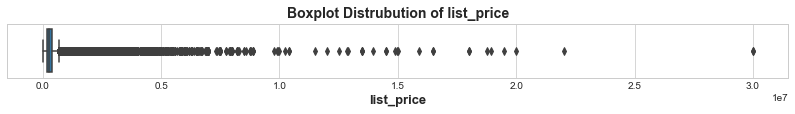

In [67]:
stats(df,'list_price')

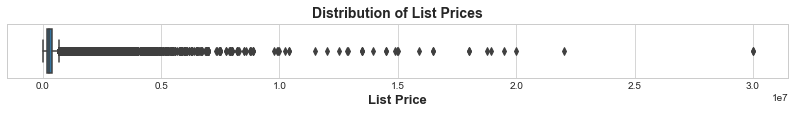

In [68]:
plt.figure(figsize=(14,1))
sns.boxplot(df.list_price)
plt.title('Distribution of List Prices', fontsize=14, fontweight='bold')
plt.xlabel('List Price', fontsize=13, fontweight='bold')
plt.show()

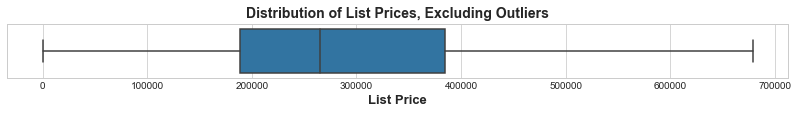

In [69]:
plt.figure(figsize=(14,1))
sns.boxplot(df.list_price, showfliers=False)
plt.title('Distribution of List Prices, Excluding Outliers', fontsize=14, fontweight='bold')
plt.xlabel('List Price', fontsize=13, fontweight='bold')
plt.show()

Distribution of Listing Prices less than $20k:

Data type: int64
Count: 1741
Number of Unique Values: 261
Number of nulls: 0 - 0.0%

Mean: 2457.4451464675476
Minimum: 1
Lower Quartile: 1275.0
Median: 1600.0
Upper Quartile: 2100.0
Maximum: 19999


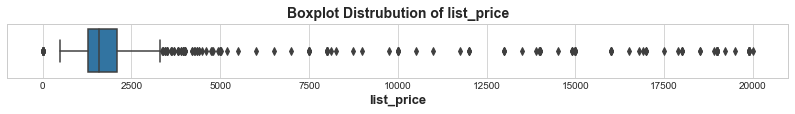

In [70]:
print('Distribution of Listing Prices less than $20k:\n')

stats(df[df.list_price < 20000],'list_price')

In [71]:
view(df[df.list_price < 20000].list_price.value_counts().sort_index(),7)

1        16
10        2
499       1
550       1
595       1
625       1
650       5
         ..
18500     2
18900     1
19000    14
19200     1
19500     1
19900    11
19999     1
Name: list_price, Length: 261, dtype: int64

In [72]:
df[df.list_price < 20000].status.value_counts().sort_index()

Active           8
Expired        109
Sold            65
Terminated    1545
Withdrawn       14
Name: status, dtype: int64

In [73]:
df[df.list_price==650]

,mls_number,property_type,status,street_number,street_name,city,zip_code,county,list_price,close_price,close_date,area,subdivision,master_planned_community,market_area,school_district,school_elementary,school_middle,school_high,sq_ft_total,price_sq_ft_list,price_sq_ft_sold,lot_size,acres,price_acre_list,price_acre_sales,year_built,bedrooms,baths_full,baths_half,baths_total,room_count,fireplaces_number,stories,new_construction,new_construction_desc,pool_private,no_of_garage_cap,style,dom,cdom,last_change_timestamp,list_date
128348,76661404,Townhouse/Condo,Terminated,6200,Ranchester,Houston,77036,Harris,650,NaN,NaN,17.0,HAMILTON COURT CONDO,NaN,Sharpstown Area,2 - Alief,COLLINS ELEMENTARY SCHOOL (ALIEF),ALIEF MIDDLE SCHOOL,AISD DRAW,605.0,$1.07,$.00,0.0,NaN,NaN,NaN,1977.0,1.0,1.0,1.0,1.1,3.0,NaN,2.0,False,NaN,False,0.0,Split Level,0.0,0,2017-11-01 20:28:16,11/01/2017 12:00:00 AM
225267,60885922,Single-Family,Terminated,14574,Groves,Splendora,77372,Montgomery,650,NaN,NaN,40.0,Wm Barker,NaN,Cleveland Area,47 - Splendora,GREENLEAF ELEMENTARY SCHOOL,SPLENDORA JUNIOR HIGH,SPLENDORA HIGH SCHOOL,550.0,$1.18,NaN,NaN,NaN,NaN,NaN,2005.0,1.0,1.0,0.0,1.0,3.0,NaN,1.0,False,NaN,False,0.0,Other Style,1.0,1,2018-11-05 12:08:59,11/04/2018 12:00:00 AM
247605,46604114,Multi-Family,Terminated,14031,Garber,Houston,77015,Harris,650,NaN,NaN,2.0,Clover Leaf Add 3rd,NaN,North Channel,21 - Galena Park,CLOVERLEAF ELEMENTARY SCHOOL,NORTH SHORE MIDDLE SCHOOL,NORTH SHORE SENIOR HIGH SCHOOL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1982.0,NaN,NaN,NaN,0.0,NaN,NaN,1.0,False,NaN,NaN,NaN,NaN,1.0,1,2018-02-28 09:28:13,02/27/2018 12:00:00 AM
247606,94019339,Townhouse/Condo,Terminated,5625,Antoine,Houston,77091,Harris,650,NaN,NaN,9.0,Oakwood Gardens Condo LLC,NaN,Oak Forest West Area,27 - Houston,SMITH ELEMENTARY SCHOOL (HOUSTON),CLIFTON MIDDLE SCHOOL (HOUSTON),SCARBOROUGH HIGH SCHOOL,725.0,$.90,NaN,398376.0,NaN,NaN,NaN,1972.0,1.0,1.0,0.0,1.0,1.0,NaN,1.0,False,NaN,False,0.0,Other Style,0.0,0,2018-02-15 22:51:29,02/15/2018 12:00:00 AM
256613,3041617,Multi-Family,Terminated,4201,Hopper,Houston,77093,Harris,650,NaN,NaN,34.0,Lonoke Place,NaN,Aldine Area,1 - Aldine,ORANGE GROVE ELEMENTARY SCHOOL,HAMBRICK MIDDLE SCHOOL,MACARTHUR HIGH SCHOOL (ALDINE),2616.0,$.25,NaN,6538.0,NaN,NaN,NaN,1962.0,NaN,NaN,NaN,0.0,NaN,NaN,1.0,False,NaN,NaN,NaN,NaN,9.0,9,2018-08-22 12:07:52,07/31/2018 12:00:00 AM


In [74]:
print(f'{len(df[df.list_price<20000])} homes listed at less than $20k makes up \
{round(len(df[df.list_price<20000])/len(df)*100,2)}% of the data')

1741 homes listed at less than $20k makes up 0.49% of the data


It is very rare and unlikely to find a home listed under \\$20k. Seeing as how many of these properties were terminated, I will assume that most of them had the wrong price put in, or were accidentally misentered as homes for sale when they were supposed to be for rent. And if neither, they are still outliers. I will remove any home listed for less than \\$20k.

In [75]:
df = df[df.list_price>=20000]

Data type: int64
Count: 350087
Number of Unique Values: 28378
Number of nulls: 0 - 0.0%

Mean: 346115.0341943574
Minimum: 20000
Lower Quartile: 189900.0
Median: 265000.0
Upper Quartile: 387900.0
Maximum: 29999999


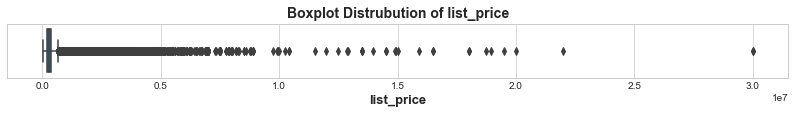

In [76]:
stats(df,'list_price')

Distribution of Listing Prices greater than $700k:

Data type: int64
Count: 22184
Number of Unique Values: 2651
Number of nulls: 0 - 0.0%

Mean: 1289793.6776054814
Minimum: 700100
Lower Quartile: 799999.0
Median: 985000.0
Upper Quartile: 1395000.0
Maximum: 29999999


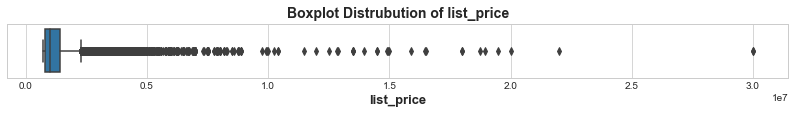

In [77]:
print('Distribution of Listing Prices greater than $700k:\n')

stats(df[df.list_price >700000],'list_price')

For the purpose of EDA, I will leave these very expensive properties in the dataset for now.

### Close Price

In [78]:
view(df.close_price.value_counts().sort_index(),3)

$1            1
$100000     392
$1000000     63
           ... 
$999900       8
$999995       1
$999999       4
Name: close_price, Length: 22780, dtype: int64

In [79]:
df.close_price = df.close_price.str.replace('$','')

In [80]:
df.close_price.isna().sum()/len(df[df.status!='Sold'])

1.0

All the listings with a null value for the close price are listings that do not have a Sold status. I will put 0 as the filler value for now.

In [81]:
df.close_price.fillna(0, inplace=True)

In [82]:
df.close_price = df.close_price.astype('int')

Data type: int64
Count: 198386
Number of Unique Values: 22780
Number of nulls: 0 - 0.0%

Mean: 286086.190658615
Minimum: 1
Lower Quartile: 170000.0
Median: 230000.0
Upper Quartile: 330000.0
Maximum: 17500000


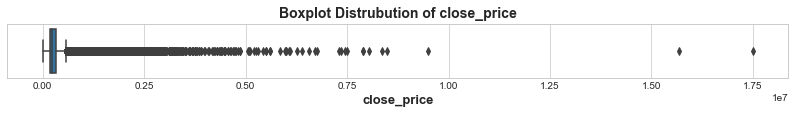

In [83]:
stats(df[df.close_price!=0],'close_price')

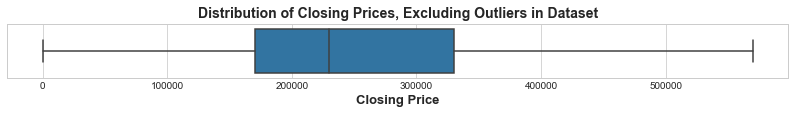

In [84]:
plt.figure(figsize=(14,1))
sns.boxplot(df[df.close_price!=0].close_price, showfliers=False)
plt.title('Distribution of Closing Prices, Excluding Outliers in Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Closing Price', fontsize=13, fontweight='bold')
plt.show()

Distribution of Closing Prices less than $20k:

Data type: int64
Count: 28
Number of Unique Values: 14
Number of nulls: 0 - 0.0%

Mean: 15227.214285714286
Minimum: 1
Lower Quartile: 16000.0
Median: 17000.0
Upper Quartile: 18025.0
Maximum: 19000


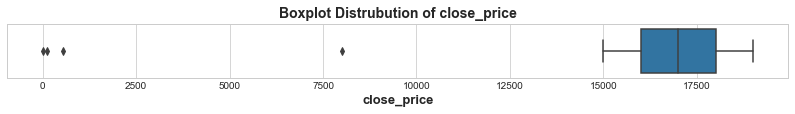

In [85]:
print('Distribution of Closing Prices less than $20k:\n')

stats(df[df.close_price!=0][df.close_price < 20000],'close_price')

In [86]:
df = df[~df.close_price.between(1,20000, inclusive=True)]

Distribution of Closing Prices greater than $700k:

Data type: int64
Count: 7165
Number of Unique Values: 1323
Number of nulls: 0 - 0.0%

Mean: 1210450.2714584786
Minimum: 499000
Lower Quartile: 809000.0
Median: 975000.0
Upper Quartile: 1300000.0
Maximum: 18750000


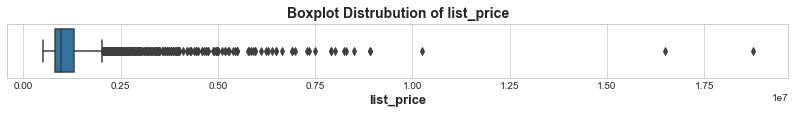

In [87]:
print('Distribution of Closing Prices greater than $700k:\n')

stats(df[df.close_price >700000],'list_price')

For the purpose of EDA, I will leave these very expensive properties in the dataset for now.

### Close Date

In [88]:
len(df)

350039

In [89]:
view(df.close_date.value_counts().sort_index(),3)

01/01/2017 12:00:00 AM      6
01/01/2018 12:00:00 AM      8
01/01/2019 12:00:00 AM      9
                         ... 
12/30/2018 12:00:00 AM      3
12/31/2017 12:00:00 AM     10
12/31/2018 12:00:00 AM    676
Name: close_date, Length: 893, dtype: int64

In [90]:
df.close_date.isna().sum()/len(df[df.status!='Sold'])

1.0

All the listings with a null value for the close date are listings that do not have a Sold status. I will put 01-01-1900 as the filler value for now.

In [91]:
df.close_date = df.close_date.fillna('1900-01-01')

In [92]:
df.close_date = pd.to_datetime(df.close_date)

In [93]:
view(df.close_date.value_counts().sort_index(),3)

1900-01-01    151701
2017-01-01         6
2017-01-02        13
               ...  
2019-06-14       407
2019-06-15         8
2019-06-16         2
Name: close_date, Length: 894, dtype: int64

### List Date

In [94]:
view(df.list_date.value_counts().sort_index(),3)

01/01/2016 12:00:00 AM      5
01/01/2017 12:00:00 AM    190
01/01/2018 12:00:00 AM    166
                         ... 
12/31/2016 12:00:00 AM     75
12/31/2017 12:00:00 AM     48
12/31/2018 12:00:00 AM    109
Name: list_date, Length: 1649, dtype: int64

In [95]:
df.list_date = pd.to_datetime(df.list_date)

## Community Location

In [96]:
df[['area','subdivision','master_planned_community','market_area','school_district','school_elementary','school_middle','school_high']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350039 entries, 3 to 371432
Data columns (total 8 columns):
area                        349216 non-null float64
subdivision                 349765 non-null object
master_planned_community    56939 non-null object
market_area                 347146 non-null object
school_district             350039 non-null object
school_elementary           346804 non-null object
school_middle               347673 non-null object
school_high                 348317 non-null object
dtypes: float64(1), object(7)
memory usage: 24.0+ MB


In [97]:
df[['area','subdivision','master_planned_community','market_area','school_district','school_elementary','school_middle','school_high']].isna().sum()

area                           823
subdivision                    274
master_planned_community    293100
market_area                   2893
school_district                  0
school_elementary             3235
school_middle                 2366
school_high                   1722
dtype: int64

In [98]:
round(df[['area','subdivision','master_planned_community','market_area','school_district','school_elementary','school_middle','school_high']].isna().sum()/len(df)*100,2)

area                         0.24
subdivision                  0.08
master_planned_community    83.73
market_area                  0.83
school_district              0.00
school_elementary            0.92
school_middle                0.68
school_high                  0.49
dtype: float64

### Master Planned Community

In [99]:
view(df.master_planned_community.value_counts(),10)

Cinco Ranch               3510
Kingwood                  3324
Sienna Plantation         2834
Cross Creek Ranch         1715
Woodforest Development    1593
Riverstone                1559
The Woodlands             1493
Bridgeland                1477
Shadow Creek Ranch        1443
First Colony              1340
                          ... 
Steeplechase                37
Lakes of Brightwater        33
Magnolia Ridge              23
Lakes of Mission Grove      20
Crown Ranch                 19
Vicksburg                   19
Eaglewood                   17
Sierra Vista                11
Meridiana                    6
Traditions                   5
Name: master_planned_community, Length: 111, dtype: int64

In [100]:
print(f'Percent null: {round(df.master_planned_community.isna().sum()/len(df)*100,2)}%')

Percent null: 83.73%


This column looks very helpful and it would be great to analyze, especially as the input is much cleaner than most of the other community location columns. However, because of the high percentage of null values, I will remove this column.

In [101]:
df = df.drop(columns='master_planned_community')

### Area, Subdivision, and Market Area

#### Area

There are 823 null values in the area column, making up .24% of the data. I will drop the null values.

In [102]:
df = df[~df.area.isna()]

In [103]:
df.area = df.area.astype('int')

In [104]:
view(df.area.value_counts(),10)

33    22021
9     17666
25    17421
5     16142
36    14591
15    13685
1     13361
13    12943
37    12887
30    12243
      ...  
69        2
71        2
76        1
78        1
42        1
58        1
60        1
63        1
68        1
77        1
Name: area, Length: 63, dtype: int64

In [105]:
df.area.unique()

array([53, 33,  5, 39, 52, 14, 15, 19, 26, 40, 57, 30, 80, 38, 29, 37, 36,
        3, 32, 34,  2,  1, 35, 25, 17, 12,  7,  4, 20, 21,  9, 28, 11,  6,
       31, 13, 18, 22, 24, 10,  8, 16, 23, 49, 61, 64, 84, 81, 86, 47, 85,
       60, 71, 78, 83, 69, 77, 51, 42, 76, 68, 58, 63])

The numbers in this column are associated with the following MLS defined areas.

    1 - Northeast
    2 - East
    3 - Southeast
    4 - South
    5 - Brazoria County
    6 - Pasadena Area
    7 - Clear Lake Area
    8 - Hwy 6 North
    9 - Central North
    10 - Cy-Fair
    11 - Near North
    12 - North
    13 - Northwest
    14 - Far Northwest
    15 - Montgomery County SW
    16 - Central
    17 - Southwest
    18 - South Central
    19 - Montgomery County NE
    20 - Bellaire South
    21 - Bellaire West
    22 - Central West
    23 - Memorial
    24 - Spring Branch
    25 - Far West
    26 - Waller County
    28 - Alief Area
    29 - Ft. Bend Central
    30 - Ft. Bend Southwest
    31 - West
    32 - Far Northeast
    33 - Galveston County
    34 - Aldine-Westfield Area
    35 - Tomball/Cypress
    36 - South Katy Area
    37 - Ft. Bend West
    38 - Ft. Bend East
    39 - Montgomery County NW
    40 - Montgomery County SE
    42 - Trinity County
    47 - Newton County
    49 - Hardin County
    51 - Jefferson County
    52 - Liberty County
    53 - Chambers County
    57 - Austin County
    58 - Washington County
    60 - Grimes County
    61 - Brazos County
    63 - Leon County
    64 - San Jacinto County
    68 - Lavaca County
    69 - Fayette County
    71 - Milam County
    76 - Cherokee County
    77 - Nacogdoches County
    78 - San Augustine County
    80 - Other - Texas
    81 - Other - United States
    83 - Central Texas
    84 - North Texas
    85 - South Texas
    86 - West Texas

#### Subdivision

In [106]:
view(df.subdivision.value_counts(),10)

Houston Heights                  1482
Cross Creek Ranch                1369
Sienna Plantation                1300
Bridgeland                       1107
Woodforest                        921
Riverstone                        879
Eagle Springs                     820
Aliana                            788
Towne Lake                        737
Rice Military                     736
                                 ... 
Amber                               1
Summerset Landing Condo Ph 02       1
Woodforst                           1
WESTERN TRAILS                      1
PIRATES COVE TOWNHOMES AT LA        1
Southampton Ext 2004                1
Westover Park Sec 14b               1
SHERATON OAKS 1                     1
Fall Crk Sec                        1
Park Crk Sec 3                      1
Name: subdivision, Length: 47036, dtype: int64

In [107]:
df.subdivision.unique()

array(['none', 'Pirates Cove', 'Velasco Freeport', ..., 'Rhode',
       'Mayerling Add', 'Bayou Woods Sec 2'], dtype=object)

#### Market Area

In [108]:
view(df.market_area.value_counts(),10)

Katy - Southwest                       11639
Lake Conroe Area                        9686
Cypress North                           8288
Fort Bend County North/Richmond         8282
Pearland                                8171
League City                             7542
Heights/Greater Heights                 7204
Spring Northeast                        7200
Cypress South                           6822
Spring Branch                           6621
                                       ...  
Rivercrest                                26
Bayou Vista                               17
Highland Bayou                            14
Livingston Area                           12
Realist Other                             10
Tiki Island                               10
Plantersville Area                         6
Coldspring/South San Jacinto County        5
Port Bolivar                               2
Tyler County                               1
Name: market_area, Length: 178, dtype: int64

In [109]:
df.market_area.unique()

array(['Chambers County East', 'West End', 'Other', 'Lake Conroe Area',
       'Livingston Area', 'Conroe Northeast', 'Dayton', 'La Marque',
       'Magnolia/1488 West', 'Cleveland Area', 'Texas City', 'Brookshire',
       'Santa Fe', 'Magnolia/1488 East', 'Waller',
       'Porter/New Caney West', 'Willis/New Waverly', 'Hempstead',
       'Midtown - Galveston', 'Conroe Southeast', 'East End',
       'Near West End', 'Alvin South', 'Hitchcock', 'Spring Northeast',
       'Fort Bend South/Richmond', 'Friendswood', 'Missouri City Area',
       'Pearland', 'Stafford Area', 'Sugar Land West', 'Sugar Land North',
       'Liberty', 'Bacliff/San Leon', 'Montgomery County Northwest',
       'Conroe Southwest', 'Dickinson', 'Porter/New Caney East',
       'Mission Bend Area', 'Baytown/Chambers County', 'Katy - Southeast',
       'League City', 'Kingwood West', 'Spring/Klein', 'Alvin North',
       'Teichman/Channelview Area', 'Fulshear/South Brookshire/Simonton',
       'Fort Bend County North/R

It looks like there is a lot of inconsistency in how the information for Subdivision and Market Area, and there is a high cardinality in both. I will drop these columns.

In [110]:
df.drop(columns=['subdivision','market_area'], inplace=True)

### School District and Schools

In [111]:
df.school_district.value_counts()

27 - Houston               70912
13 - Cypress-Fairbanks     31290
30 - Katy                  25398
19 - Fort Bend             25117
11 - Conroe                17741
32 - Klein                 16808
33 - Lamar Consolidated    15335
29 - Humble                14961
9 - Clear Creek            12785
49 - Spring Branch         10819
48 - Spring                 8201
3 - Alvin                   6802
37 - Montgomery             6722
53 - Tomball                6702
22 - Galveston              6076
2 - Alief                   6011
1 - Aldine                  5935
41 - Pasadena               5259
36 - Magnolia               4914
42 - Pearland               4816
23 - Goose Creek            4185
17 - Dickinson              4131
39 - New Caney              4070
56 - Willis                 3711
7 - Brazosport              2096
55 - Waller                 2064
20 - Friendswood            2045
12 - Crosby                 2010
35 - La Porte               1916
46 - Sheldon                1863
          

In [112]:
view(df.school_elementary.value_counts(),5)

GISD OPEN ENROLL                        5993
MEMORIAL ELEMENTARY SCHOOL (HOUSTON)    4223
BRIARGROVE ELEMENTARY SCHOOL            4085
SINCLAIR ELEMENTARY SCHOOL (HOUSTON)    2830
POE ELEMENTARY SCHOOL                   2383
                                        ... 
COUNTY LINE ELEMENTARY SCHOOL              1
MINSHEW ELEMENTARY SCHOOL                  1
SAM ROSEN ELEMENTARY SCHOOL                1
HICKS ELEMENTARY SCHOOL (LEWISVILLE)       1
MARGARET L. FELTY ELEMENTARY SCHOOL        1
Name: school_elementary, Length: 865, dtype: int64

In [113]:
view(df.school_middle.value_counts(),5)

HOGG MIDDLE SCHOOL (HOUSTON)    8351
GISD OPEN ENROLL                5993
PEET JUNIOR HIGH SCHOOL         5378
LANIER MIDDLE SCHOOL            5371
PERSHING MIDDLE SCHOOL          5354
                                ... 
HUNT MIDDLE SCHOOL                 1
DANNY JONES MIDDLE SCHOOL          1
CHURCH HILL MIDDLE SCHOOL          1
MCDONALD MIDDLE SCHOOL             1
MINEOLA MIDDLE SCHOOL              1
Name: school_middle, Length: 313, dtype: int64

In [114]:
view(df.school_high.value_counts(),5)

LAMAR HIGH SCHOOL (HOUSTON)    13906
HEIGHTS HIGH SCHOOL             7849
WALTRIP HIGH SCHOOL             7251
WISDOM HIGH SCHOOL              6739
CONROE HIGH SCHOOL              6592
                               ...  
CARTHAGE HIGH SCHOOL               1
WACO HIGH SCHOOL                   1
BRENHAM HIGH SCHOOL                1
BOERNE HIGH SCHOOL                 1
NEW BRAUNFELS HIGH SCHOOL          1
Name: school_high, Length: 214, dtype: int64

In [115]:
df[['school_district','school_elementary','school_middle','school_high']].isna().sum()

school_district         0
school_elementary    2504
school_middle        1635
school_high           989
dtype: int64

In [116]:
round(df[['school_district','school_elementary','school_middle','school_high']].isna().sum()/len(df)*100,2)

school_district      0.00
school_elementary    0.72
school_middle        0.47
school_high          0.28
dtype: float64

In [117]:
print(f'{len(df[(df.school_high.isna())|(df.school_middle.isna())|(df.school_elementary.isna())])} null values \
in school columns makes up {round(len(df[(df.school_high.isna())|(df.school_middle.isna())| \
(df.school_elementary.isna())])/len(df)*100,2)}% of the data')

3169 null values in school columns makes up 0.91% of the data


In [118]:
df = df[~df.school_high.isna()][~df.school_middle.isna()][~df.school_elementary.isna()]

In [119]:
print('Columns that still have null values:')
df[df.columns[df.isna().any()]].isna().sum()

Columns that still have null values:


sq_ft_total                1982
price_sq_ft_list           2032
price_sq_ft_sold         110849
lot_size                  42729
acres                    188218
price_acre_list          201387
price_acre_sales         267093
year_built                 1710
bedrooms                   1762
baths_full                 2082
baths_half                 2083
baths_total                   6
room_count                 3120
fireplaces_number        109516
stories                    4415
new_construction_desc    285063
pool_private               2082
no_of_garage_cap           6429
style                      6699
dtype: int64

In [120]:
print('Columns that still have null values, percentages:')
round(df[df.columns[df.isna().any()]].isna().sum()/len(df)*100,4)

Columns that still have null values, percentages:


sq_ft_total               0.5728
price_sq_ft_list          0.5872
price_sq_ft_sold         32.0329
lot_size                 12.3477
acres                    54.3909
price_acre_list          58.1964
price_acre_sales         77.1840
year_built                0.4942
bedrooms                  0.5092
baths_full                0.6017
baths_half                0.6019
baths_total               0.0017
room_count                0.9016
fireplaces_number        31.6477
stories                   1.2758
new_construction_desc    82.3770
pool_private              0.6017
no_of_garage_cap          1.8578
style                     1.9359
dtype: float64

## Property Size and Attributes

### Home and Lot Size

#### Acres

In [121]:
df.acres.describe()

count    157829.000000
mean          5.231319
std         526.809853
min           0.000000
25%           0.150100
50%           0.190100
75%           0.264500
max      152433.000000
Name: acres, dtype: float64

The acres column as a lot of null values. It should describe information similar to lot size, so I will remove the columns related to acres.

In [122]:
df = df.drop(columns=['acres','price_acre_list','price_acre_sales'])

#### Square Footage

In [123]:
df[['sq_ft_total','lot_size','stories']].describe().T

,count,mean,std,min,25%,50%,75%,max
sq_ft_total,344065.0,2567.444401,3.690806e+04,0.0,1746.0,2323.0,3037.0,21632649.0
lot_size,303318.0,20997.257258,1.816573e+06,0.0,6108.0,7819.0,10560.0,999999999.0
stories,341632.0,1.690201,1.899060e+01,-1.0,1.0,2.0,2.0,8646.0


In [124]:
view(df[df.sq_ft_total.isna()],3)

,mls_number,property_type,status,street_number,street_name,city,zip_code,county,list_price,close_price,close_date,area,school_district,school_elementary,school_middle,school_high,sq_ft_total,price_sq_ft_list,price_sq_ft_sold,lot_size,year_built,bedrooms,baths_full,baths_half,baths_total,room_count,fireplaces_number,stories,new_construction,new_construction_desc,pool_private,no_of_garage_cap,style,dom,cdom,last_change_timestamp,list_date
68,41849521,Townhouse/Condo,Sold,6300,Seawall,Galveston,77551,Galveston,89000,77000,2017-09-07,33,22 - Galveston,GISD OPEN ENROLL,GISD OPEN ENROLL,BALL HIGH SCHOOL,NaN,NaN,NaN,NaN,1983.0,1.0,1.0,0.0,1.0,3.0,NaN,3.0,False,NaN,False,0.0,Traditional,25.0,25,2017-09-22 09:46:36,2017-07-24
95,95892604,Single-Family,Sold,6514,County Road 166,Alvin,77511,Brazoria,95000,90000,2017-09-13,80,3 - Alvin,WALT DISNEY ELEMENTARY SCHOOL,ALVIN JUNIOR HIGH SCHOOL,ALVIN HIGH SCHOOL,NaN,NaN,NaN,43560.0,2008.0,3.0,2.0,0.0,2.0,6.0,0.0,1.0,False,NaN,False,0.0,Other Style,5.0,5,2017-09-18 10:07:36,2017-08-02
135,50318790,Single-Family,Sold,30126,Davis,Magnolia,77355,Montgomery,115000,108000,2017-09-15,15,36 - Magnolia,MAGNOLIA ELEMENTARY SCHOOL (MAGNOLIA),MAGNOLIA JUNIOR HIGH SCHOOL,MAGNOLIA WEST HIGH SCHOOL,NaN,NaN,NaN,19920.0,1985.0,3.0,2.0,0.0,2.0,8.0,NaN,2.0,False,NaN,False,0.0,Traditional,7.0,7,2017-09-15 16:39:45,2017-07-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371037,7410547,Single-Family,Withdrawn,509,Teetshorn,Houston,77009,Harris,495000,0,1900-01-01,9,27 - Houston,TRAVIS ELEMENTARY SCHOOL (HOUSTON),HOGG MIDDLE SCHOOL (HOUSTON),HEIGHTS HIGH SCHOOL,NaN,NaN,NaN,6350.0,1926.0,2.0,1.0,0.0,1.0,4.0,1.0,1.0,False,NaN,False,1.0,Traditional,193.0,453,2018-07-16 11:41:29,2018-01-03
371076,93547095,Single-Family,Withdrawn,9127,Katy Hockley,Katy,77493,Harris,524990,0,1900-01-01,25,30 - Katy,BETHKE ELEMENTARY SCHOOL,KATY JUNIOR HIGH SCHOOL,PAETOW HIGH SCHOOL,NaN,NaN,NaN,NaN,2011.0,3.0,2.0,0.0,2.0,9.0,1.0,1.0,False,NaN,False,0.0,Traditional,2.0,2,2018-07-18 15:42:17,2018-07-16
371086,64305398,Single-Family,Withdrawn,11639,Garrett,Houston,77044,Harris,525000,0,1900-01-01,2,46 - Sheldon,GARRETT ELEMENTARY SCHOOL,MICHAEL R. NULL MIDDLE SCHOOL,CE KING HIGH SCHOOL,NaN,NaN,NaN,435600.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,1.0,False,NaN,False,0.0,Other Style,215.0,215,2019-02-26 17:37:26,2018-07-26


The square foot total column has a very low percentage of null values, so I will remove these rows.

In [125]:
df = df[~df.sq_ft_total.isna()]

I will also remove the price per square foot columns, because there are a significant number of null values in these columns, and the same values can also be calculated from the other columns.

In [126]:
df = df.drop(columns=['price_sq_ft_list','price_sq_ft_sold'])

#### Lot Size

In [127]:
df[df.lot_size.isna()].isna().sum()

mls_number                   0
property_type                0
status                       0
street_number                0
street_name                  0
city                         0
zip_code                     0
county                       0
list_price                   0
close_price                  0
close_date                   0
area                         0
school_district              0
school_elementary            0
school_middle                0
school_high                  0
sq_ft_total                  0
lot_size                 42014
year_built                 806
bedrooms                    71
baths_full                  81
baths_half                  81
baths_total                  0
room_count                 313
fireplaces_number        22673
stories                   4381
new_construction             0
new_construction_desc    15604
pool_private                81
no_of_garage_cap          4403
style                     4512
dom                          0
cdom    

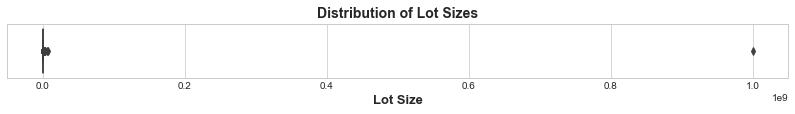

In [128]:
plt.figure(figsize=(14,1))
sns.boxplot(df[~df.lot_size.isna()].lot_size)
plt.title('Distribution of Lot Sizes', fontsize=14, fontweight='bold')
plt.xlabel('Lot Size', fontsize=13, fontweight='bold')
plt.show()

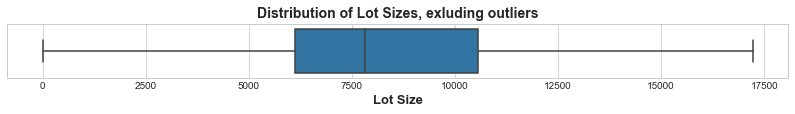

In [129]:
plt.figure(figsize=(14,1))
sns.boxplot(df[~df.lot_size.isna()].lot_size, showfliers=False)
plt.title('Distribution of Lot Sizes, exluding outliers', fontsize=14, fontweight='bold')
plt.xlabel('Lot Size', fontsize=13, fontweight='bold')
plt.show()

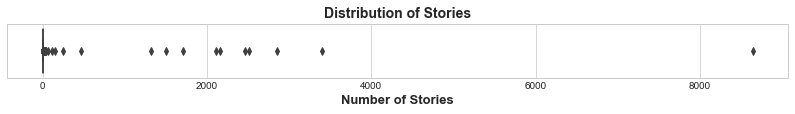

In [130]:
plt.figure(figsize=(14,1))
sns.boxplot(df[~df.stories.isna()].stories)
plt.title('Distribution of Stories', fontsize=14, fontweight='bold')
plt.xlabel('Number of Stories', fontsize=13, fontweight='bold')
plt.show()

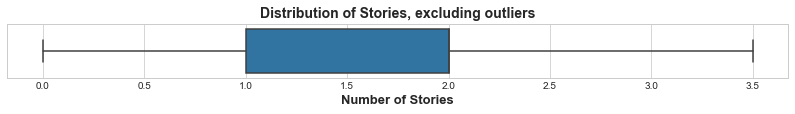

In [131]:
plt.figure(figsize=(14,1))
sns.boxplot(df[~df.stories.isna()].stories, showfliers=False)
plt.title('Distribution of Stories, excluding outliers', fontsize=14, fontweight='bold')
plt.xlabel('Number of Stories', fontsize=13, fontweight='bold')
plt.show()

The lot size and stories columns are very heavily positively skewed.

In [132]:
view(df[df.lot_size.isna()],3)

,mls_number,property_type,status,street_number,street_name,city,zip_code,county,list_price,close_price,close_date,area,school_district,school_elementary,school_middle,school_high,sq_ft_total,lot_size,year_built,bedrooms,baths_full,baths_half,baths_total,room_count,fireplaces_number,stories,new_construction,new_construction_desc,pool_private,no_of_garage_cap,style,dom,cdom,last_change_timestamp,list_date
3,47405549,Single-Family,Sold,723,Broadway,Winnie,77665,Chambers,39900,25000,2017-09-20,53,18 - East Chambers,EAST CHAMBERS ELEMENTARY SCHOOL,EAST CHAMBERS J H,EAST CHAMBERS HIGH SCHOOL,672.0,NaN,1952.0,2.0,1.0,0.0,1.0,2.0,NaN,1.0,False,NaN,False,0.0,Other Style,0.0,123,2017-09-21 14:59:24,2017-08-23
4,86143414,Townhouse/Condo,Sold,"7 A,B & H",Dana,Galveston,77554,Galveston,25000,25000,2017-09-11,33,22 - Galveston,GISD OPEN ENROLL,GISD OPEN ENROLL,BALL HIGH SCHOOL,801.0,NaN,1984.0,1.0,1.0,0.0,1.0,3.0,1.0,2.0,False,NaN,False,1.0,Mediterranean,49.0,49,2017-09-11 15:43:04,2017-07-07
6,99874455,Townhouse/Condo,Sold,13151,Walden,Montgomery,77356,Montgomery,36000,36000,2017-09-29,39,37 - Montgomery,MADELEY RANCH ELEMENTARY SCHOOL,MONTGOMERY JUNIOR HIGH SCHOOL,MONTGOMERY HIGH SCHOOL,489.0,NaN,1979.0,1.0,1.0,0.0,1.0,2.0,0.0,1.0,False,NaN,False,0.0,Traditional,86.0,86,2017-09-29 13:35:36,2017-06-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371406,55379037,Mid/Hi-Rise Condo,Withdrawn,1409,Post Oak,Houston,77056,Harris,1950000,0,1900-01-01,22,27 - Houston,BRIARGROVE ELEMENTARY SCHOOL,TANGLEWOOD MIDDLE SCHOOL,WISDOM HIGH SCHOOL,3010.0,NaN,2014.0,4.0,4.0,1.0,4.1,7.0,NaN,NaN,False,NaN,False,NaN,NaN,33.0,33,2019-03-06 01:35:59,2019-02-01
371421,25962888,Mid/Hi-Rise Condo,Withdrawn,2121,Kirby,Houston,77019,Harris,3295000,0,1900-01-01,16,27 - Houston,RIVER OAKS ELEMENTARY SCHOOL (HOUSTON),LANIER MIDDLE SCHOOL,LAMAR HIGH SCHOOL (HOUSTON),4522.0,NaN,1983.0,3.0,3.0,1.0,3.1,11.0,NaN,NaN,False,NaN,False,NaN,NaN,212.0,212,2019-05-24 09:41:13,2018-10-24
371430,18009952,Mid/Hi-Rise Condo,Withdrawn,1000,Uptown Park,Houston,77056,Harris,4995000,0,1900-01-01,22,27 - Houston,BRIARGROVE ELEMENTARY SCHOOL,TANGLEWOOD MIDDLE SCHOOL,WISDOM HIGH SCHOOL,6260.0,NaN,2001.0,3.0,3.0,2.0,3.2,11.0,1.0,NaN,False,NaN,False,NaN,NaN,276.0,641,2019-03-22 13:55:24,2018-06-19


In [133]:
df[df.lot_size.isna()].stories.value_counts().sort_index()

0.0          38
1.0       16410
1.2           4
1.5         862
2.0       17220
2.5          17
3.0        2190
3.5           1
4.0         830
5.0           6
7.0           7
8.0           7
9.0           3
10.0          1
11.0          3
12.0          5
13.0          1
15.0          1
16.0          5
17.0          2
18.0          1
20.0          3
25.0          1
30.0          9
33.0          1
116.0         1
244.0         1
1315.0        1
2466.0        1
2507.0        1
Name: stories, dtype: int64

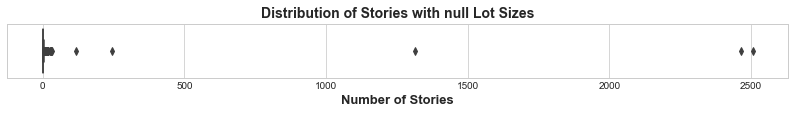

In [134]:
plt.figure(figsize=(14,1))
sns.boxplot(df[df.lot_size.isna()].stories, showfliers=True)
plt.title('Distribution of Stories with null Lot Sizes', fontsize=14, fontweight='bold')
plt.xlabel('Number of Stories', fontsize=13, fontweight='bold')
plt.show()

In [135]:
df.sq_ft_total.value_counts().sort_index().head(50)

0.0      20
1.0       7
102.0     3
127.0     1
200.0     1
224.0     1
240.0     1
252.0     1
271.0     1
283.0     5
288.0     4
300.0     1
304.0     3
306.0     1
320.0     3
324.0     2
328.0     1
336.0     1
343.0     1
345.0     1
350.0     1
360.0     3
374.0     2
384.0    25
385.0     1
392.0     1
394.0     5
396.0     6
398.0     1
399.0     8
400.0     7
403.0     1
406.0     2
408.0    26
416.0    18
417.0     1
418.0     1
420.0     2
423.0     1
425.0     1
431.0     1
432.0    10
436.0     1
438.0     3
440.0     1
448.0     7
450.0     5
453.0     6
455.0     1
456.0     1
Name: sq_ft_total, dtype: int64

It is very unlikely that a home has a square footage of 450 or less, and it is especially impossible to have a square footage of 0. These are most likely erroneous entries, so I will remove any homes that have a square footage of less than 450.

In [136]:
df = df[df.sq_ft_total>=450]

In [137]:
df[df.lot_size.isna()].stories.value_counts().sort_index()

0.0          38
1.0       16395
1.2           4
1.5         862
2.0       17218
2.5          17
3.0        2190
3.5           1
4.0         830
5.0           6
7.0           7
8.0           7
10.0          1
11.0          3
12.0          5
13.0          1
15.0          1
16.0          5
17.0          2
18.0          1
20.0          3
25.0          1
30.0          9
33.0          1
116.0         1
244.0         1
1315.0        1
2466.0        1
2507.0        1
Name: stories, dtype: int64

In [138]:
df[~df.lot_size.isna()].stories.value_counts().sort_index()

-1.00            2
 0.00           49
 1.00       137992
 1.10            2
 1.20            1
 1.25            1
 1.50         7216
 1.53            1
 2.00       139945
 2.10            2
 2.50          329
 3.00        13406
 3.50           29
 4.00         2903
 5.00           36
 6.00            1
 7.00            4
 8.00            2
 9.00            3
 11.00           4
 15.00           1
 20.00           1
 21.00           1
 22.00           2
 23.00           1
 24.00           1
 30.00           2
 60.00           1
 143.00          1
 471.00          1
 1506.00         1
 1705.00         1
 2105.00         1
 2163.00         1
 2848.00         1
 3404.00         1
 8646.00         1
Name: stories, dtype: int64

In [139]:
df.stories.value_counts().sort_index()

-1.00            2
 0.00           87
 1.00       154387
 1.10            2
 1.20            5
 1.25            1
 1.50         8078
 1.53            1
 2.00       157163
 2.10            2
 2.50          346
 3.00        15596
 3.50           30
 4.00         3733
 5.00           42
 6.00            1
 7.00           11
 8.00            9
 9.00            3
 10.00           1
 11.00           7
 12.00           5
 13.00           1
 15.00           2
 16.00           5
 17.00           2
 18.00           1
 20.00           4
 21.00           1
 22.00           2
 23.00           1
 24.00           1
 25.00           1
 30.00          11
 33.00           1
 60.00           1
 116.00          1
 143.00          1
 244.00          1
 471.00          1
 1315.00         1
 1506.00         1
 1705.00         1
 2105.00         1
 2163.00         1
 2466.00         1
 2507.00         1
 2848.00         1
 3404.00         1
 8646.00         1
Name: stories, dtype: int64

In [140]:
(df[~df.lot_size.isna()].lot_size / df[~df.lot_size.isna()].sq_ft_total).describe()

count    301957.000000
mean         10.911932
std         892.905444
min           0.000000
25%           2.458613
50%           3.298689
75%           4.680000
max      490196.077941
dtype: float64

In [141]:
(df[~df.lot_size.isna()][df.stories==1].lot_size / df[~df.lot_size.isna()][df.stories==1].sq_ft_total).describe()

count    137992.000000
mean         16.630878
std        1320.470105
min           0.000000
25%           3.378653
50%           4.261001
75%           5.952381
max      490196.077941
dtype: float64

In [142]:
(df[~df.lot_size.isna()][df.stories==1.5].lot_size / df[~df.lot_size.isna()][df.stories==1.5].sq_ft_total).describe()

count    7216.000000
mean        7.771396
std        19.284028
min         0.000000
25%         2.658997
50%         3.293011
75%         5.043211
max       648.296390
dtype: float64

In [143]:
(df[~df.lot_size.isna()][df.stories==2].lot_size / df[~df.lot_size.isna()][df.stories==2].sq_ft_total).describe()

count    139945.000000
mean          6.416182
std          29.196866
min           0.000000
25%           2.188976
50%           2.691199
75%           3.456388
max        1509.504950
dtype: float64

In [144]:
(df[~df.lot_size.isna()][df.stories==2.5].lot_size / df[~df.lot_size.isna()][df.stories==2.5].sq_ft_total).describe()

count    329.000000
mean       3.366182
std        7.993710
min        0.406801
25%        1.077134
50%        1.652473
75%        2.437655
max       70.638722
dtype: float64

In [145]:
(df[~df.lot_size.isna()][df.stories>2.5].lot_size / df[~df.lot_size.isna()][df.stories>2.5].sq_ft_total).describe()

count    16407.000000
mean         2.596988
std         18.000272
min          0.000000
25%          0.694462
50%          0.803633
75%          0.984238
max        525.805778
dtype: float64

In [146]:
df[df.lot_size.isna()].index

Int64Index([     3,      4,      6,      7,     35,     44,     46,     49,
                54,     55,
            ...
            371359, 371378, 371385, 371387, 371395, 371400, 371403, 371406,
            371421, 371430],
           dtype='int64', length=41913)

Over 12% of values in the lot size column are null. These values probably were not entered. I am going to plug in rough numbers based on the average ratio between lot size and number of stories for each home. This will help with estimations for modeling.

In [147]:
df.loc[(df.lot_size.isna())&(df.stories>2.5), 'lot_size'] = df.sq_ft_total
df.loc[(df.lot_size.isna())&(df.stories==2.5), 'lot_size'] = df.sq_ft_total*2
df.loc[(df.lot_size.isna())&(df.stories==2), 'lot_size'] = df.sq_ft_total*2.8
df.loc[(df.lot_size.isna())&(df.stories==1.5), 'lot_size'] = df.sq_ft_total*3.4
df.loc[(df.lot_size.isna()), 'lot_size'] = df.sq_ft_total*4

### Year Built

In [148]:
view(df[df.year_built.isna()],3)

,mls_number,property_type,status,street_number,street_name,city,zip_code,county,list_price,close_price,close_date,area,school_district,school_elementary,school_middle,school_high,sq_ft_total,lot_size,year_built,bedrooms,baths_full,baths_half,baths_total,room_count,fireplaces_number,stories,new_construction,new_construction_desc,pool_private,no_of_garage_cap,style,dom,cdom,last_change_timestamp,list_date
717,99843457,Single-Family,Sold,5549,N Buffalo,Willis,77378,Montgomery,183990,183990,2017-09-01,19,56 - Willis,PARMLEY ELEMENTARY SCHOOL,LYNN LUCAS MIDDLE SCHOOL,WILLIS HIGH SCHOOL,1705.0,6820.0,NaN,4.0,2.0,0.0,2.0,8.0,NaN,1.0,True,To Be Built/Under Construction,False,2.0,Ranch,53.0,53,2017-09-14 11:14:19,2017-06-20
783,53638685,Single-Family,Sold,5541,N Buffalo,Willis,77378,Montgomery,177990,189990,2017-09-22,19,56 - Willis,PARMLEY ELEMENTARY SCHOOL,LYNN LUCAS MIDDLE SCHOOL,WILLIS HIGH SCHOOL,1602.0,6408.0,NaN,3.0,2.0,0.0,2.0,8.0,NaN,1.0,True,Never Lived In,False,2.0,Traditional,53.0,53,2017-09-24 16:46:49,2017-04-29
784,7480386,Single-Family,Sold,5545,N Buffalo,Willis,77378,Montgomery,189990,189990,2017-09-29,19,56 - Willis,PARMLEY ELEMENTARY SCHOOL,LYNN LUCAS MIDDLE SCHOOL,WILLIS HIGH SCHOOL,1769.0,7076.0,NaN,4.0,2.0,0.0,2.0,9.0,NaN,1.0,True,Never Lived In,False,2.0,Traditional,123.0,123,2017-09-30 17:05:07,2017-04-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370415,47908928,Multi-Family,Withdrawn,4533,Rosemont,Houston,77051,Harris,270000,0,1900-01-01,3,27 - Houston,YOUNG ELEMENTARY SCHOOL (HOUSTON),ATTUCKS MIDDLE SCHOOL,WORTHING HIGH SCHOOL,2200.0,5000.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0,True,To Be Built/Under Construction,NaN,NaN,NaN,97.0,97,2018-11-21 11:18:12,2018-08-16
370928,59565300,Single-Family,Withdrawn,1434,W 34th 1/2 Street,Houston,77018,Harris,424990,0,1900-01-01,9,27 - Houston,GARDEN OAKS ELEMENTARY SCHOOL,BLACK MIDDLE SCHOOL,WALTRIP HIGH SCHOOL,2135.0,2135.0,NaN,3.0,2.0,1.0,2.1,3.0,NaN,3.0,True,To Be Built/Under Construction,False,2.0,"Contemporary/Modern, Traditional",40.0,40,2019-04-25 09:49:36,2019-03-16
371289,40048213,Single-Family,Withdrawn,13711,Dominion Falls,Humble,77396,Harris,899000,0,1900-01-01,1,29 - Humble,FALL CREEK ELEMENTARY SCHOOL,WOODCREEK MIDDLE SCHOOL,SUMMER CREEK HIGH SCHOOL,5282.0,11700.0,NaN,5.0,4.0,1.0,4.1,0.0,NaN,2.0,True,To Be Built/Under Construction,False,3.0,Traditional,413.0,413,2019-04-29 14:59:58,2018-03-10


In [149]:
df[df.year_built.isna()].new_construction.value_counts()

True     1390
False      64
Name: new_construction, dtype: int64

In [150]:
df.year_built.isna().sum()/len(df)

0.004228342106028441

The large majority of the homes with null values in the year built column are new constructions. This makes up a very small percentage of the total listings, so I will remove the rows with nulls here.

In [151]:
df = df[~df.year_built.isna()]

In [152]:
df.year_built.value_counts().sort_index()

0.0              27
7.0               1
67.0              1
201.0             3
218.0             1
968.0             1
1077.0            1
1754.0            1
1800.0            1
1835.0            1
1846.0            1
1853.0            1
1856.0            1
1857.0            3
1858.0            1
1859.0            1
1860.0            3
1863.0            1
1865.0           12
1868.0            2
1870.0            5
1871.0            6
1872.0            1
1873.0            2
1874.0            9
1875.0           10
1876.0            6
1878.0            8
1879.0            1
1880.0            7
              ...  
2001.0         6348
2002.0         7077
2003.0         8628
2004.0         8924
2005.0        11402
2006.0        12461
2007.0        10037
2008.0         7099
2009.0         4960
2010.0         5180
2011.0         5067
2012.0         6674
2013.0         8915
2014.0        10065
2015.0         8457
2016.0        11328
2017.0        20354
2018.0        20810
2019.0        10734


In [153]:
view(df.year_built.value_counts().sort_index()[:1950], 15)

0.0         27
7.0          1
67.0         1
201.0        3
218.0        1
968.0        1
1077.0       1
1754.0       1
1800.0       1
1835.0       1
1846.0       1
1853.0       1
1856.0       1
1857.0       3
1858.0       1
          ... 
1936.0     253
1937.0     106
1938.0     478
1939.0     225
1940.0    1772
1941.0     144
1942.0     204
1943.0     134
1944.0     126
1945.0     630
1946.0     350
1947.0     408
1948.0     702
1949.0     499
1950.0    3046
Name: year_built, Length: 100, dtype: int64

To narrow down my research, I will restrict the homes in this project to homes built between the years 1950 and 2019 inclusive.

In [154]:
df = df[df.year_built >= 1950]

In [155]:
df = df[df.year_built <= 2019]

In [156]:
df.year_built = df.year_built.astype('int')

In [157]:
print('Columns that still have null values:')
df[df.columns[df.isna().any()]].isna().sum()

Columns that still have null values:


bedrooms                   1058
baths_full                 1241
baths_half                 1242
baths_total                   5
room_count                 1862
fireplaces_number        100202
stories                    4152
new_construction_desc    272047
pool_private               1241
no_of_garage_cap           5328
style                      5569
dtype: int64

In [158]:
print('Columns that still have null values, percentages:')
round(df[df.columns[df.isna().any()]].isna().sum()/len(df)*100,4)

Columns that still have null values, percentages:


bedrooms                  0.3195
baths_full                0.3747
baths_half                0.3750
baths_total               0.0015
room_count                0.5622
fireplaces_number        30.2570
stories                   1.2537
new_construction_desc    82.1472
pool_private              0.3747
no_of_garage_cap          1.6088
style                     1.6816
dtype: float64

### Bedrooms and Bathrooms

In [159]:
df[df.baths_half.isna()]

,mls_number,property_type,status,street_number,street_name,city,zip_code,county,list_price,close_price,close_date,area,school_district,school_elementary,school_middle,school_high,sq_ft_total,lot_size,year_built,bedrooms,baths_full,baths_half,baths_total,room_count,fireplaces_number,stories,new_construction,new_construction_desc,pool_private,no_of_garage_cap,style,dom,cdom,last_change_timestamp,list_date
62,40232708,Multi-Family,Sold,702,Dallas,Cleveland,77327,Liberty,74988,71666,2017-09-15,52,100 - Cleveland,NORTHSIDE ELEMENTARY SCHOOL (CLEVELAND),CLEVELAND MIDDLE SCHOOL,CLEVELAND HIGH SCHOOL,2304.0,8899.0,1970,NaN,NaN,NaN,0.0,NaN,NaN,1.0,False,NaN,NaN,NaN,NaN,46.0,46,2017-09-18 12:59:18,2017-06-08
139,48090850,Multi-Family,Sold,601,Edgewood,Cleveland,77327,Liberty,139500,110000,2017-09-20,52,100 - Cleveland,NORTHSIDE ELEMENTARY SCHOOL (CLEVELAND),CLEVELAND MIDDLE SCHOOL,CLEVELAND HIGH SCHOOL,2516.0,21750.0,1978,NaN,NaN,NaN,0.0,NaN,NaN,1.0,False,NaN,NaN,NaN,NaN,12.0,12,2017-09-21 15:15:00,2017-08-11
433,29245050,Multi-Family,Sold,3628,Avenue R,Galveston,77550,Galveston,169500,159000,2017-09-15,33,22 - Galveston,GISD OPEN ENROLL,GISD OPEN ENROLL,BALL HIGH SCHOOL,1124.0,2580.0,1960,NaN,NaN,NaN,0.0,NaN,NaN,2.0,False,NaN,NaN,NaN,NaN,60.0,60,2017-09-18 10:05:07,2017-06-01
1093,61516545,Multi-Family,Sold,1915,40th,Galveston,77550,Galveston,225000,215000,2017-09-20,33,22 - Galveston,GISD OPEN ENROLL,GISD OPEN ENROLL,BALL HIGH SCHOOL,4968.0,6000.0,1971,NaN,NaN,NaN,0.0,NaN,NaN,2.0,False,NaN,NaN,NaN,NaN,35.0,35,2017-09-27 10:09:12,2017-07-05
1268,31883494,Multi-Family,Sold,1813,Avenue N 1/2,Galveston,77550,Galveston,229000,229000,2017-09-15,33,22 - Galveston,GISD OPEN ENROLL,GISD OPEN ENROLL,BALL HIGH SCHOOL,2128.0,5160.0,1960,NaN,NaN,NaN,0.0,NaN,NaN,1.5,False,NaN,NaN,NaN,NaN,2.0,2,2017-09-17 22:15:51,2017-07-30
1346,6825724,Multi-Family,Sold,1101,Church,Galveston,77550,Galveston,235000,235000,2017-09-08,33,22 - Galveston,GISD OPEN ENROLL,GISD OPEN ENROLL,BALL HIGH SCHOOL,1992.0,5140.0,1958,NaN,NaN,NaN,0.0,NaN,NaN,2.0,False,NaN,NaN,NaN,NaN,1.0,1,2017-09-08 11:17:48,2017-06-29
1429,25942362,Multi-Family,Sold,5008,Avenue O 1/2,Galveston,77551,Galveston,249000,242000,2017-09-20,33,22 - Galveston,GISD OPEN ENROLL,GISD OPEN ENROLL,BALL HIGH SCHOOL,1698.0,5760.0,1955,NaN,NaN,NaN,0.0,NaN,NaN,1.0,False,NaN,NaN,NaN,NaN,65.0,65,2017-09-22 09:25:00,2017-05-30
1651,24283894,Multi-Family,Sold,3720,Ave P 1/2,Galveston,77550,Galveston,259000,261000,2017-09-29,33,22 - Galveston,GISD OPEN ENROLL,GISD OPEN ENROLL,BALL HIGH SCHOOL,1988.0,5566.4,1960,NaN,NaN,NaN,0.0,NaN,NaN,2.0,False,NaN,NaN,NaN,NaN,14.0,14,2017-10-09 12:54:13,2017-08-02
1992,40211524,Multi-Family,Sold,1701,Market,Galveston,77550,Galveston,299000,299000,2017-09-28,33,22 - Galveston,GISD OPEN ENROLL,GISD OPEN ENROLL,BALL HIGH SCHOOL,3528.0,4356.0,1958,NaN,NaN,NaN,0.0,NaN,NaN,2.0,False,NaN,NaN,NaN,NaN,35.0,35,2017-09-29 09:11:26,2017-05-16
2880,19914275,Multi-Family,Sold,100,Will,Willis,77378,Montgomery,529000,540000,2017-09-22,19,56 - Willis,W. LLOYD MEADOR ELEMENTARY SCHOOL,ROBERT P. BRABHAM MIDDLE SCHOOL,WILLIS HIGH SCHOOL,4732.0,18928.0,1974,NaN,NaN,NaN,0.0,NaN,NaN,1.0,False,NaN,NaN,NaN,NaN,1.0,4,2017-09-23 07:27:27,2017-09-12


In [160]:
df.baths_half.fillna(0.0, inplace=True)

In [161]:
len(df[df.bedrooms==0])

402

In [162]:
df[df.bedrooms==0][['bedrooms','baths_full','baths_half','baths_total','room_count']].describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,402.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
baths_full,402.0,0.833333,1.105228,0.0,0.0,1.0,1.0,11.0
baths_half,402.0,0.273632,0.590660,0.0,0.0,0.0,0.0,4.0
baths_total,402.0,0.860697,1.103948,0.0,0.0,1.0,1.1,11.1
room_count,323.0,0.510836,1.598439,0.0,0.0,0.0,0.0,16.0


In [163]:
df[df.bedrooms==0].room_count.value_counts().sort_index()

0.0     254
1.0      34
2.0      16
3.0      10
4.0       2
5.0       3
6.0       1
8.0       1
16.0      2
Name: room_count, dtype: int64

In [164]:
df[df.room_count==0][['bedrooms','baths_full','baths_half','baths_total','room_count']].describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,333.0,0.828829,1.543782,0.0,0.0,0.0,0.0,6.0
baths_full,333.0,1.252252,1.167856,0.0,0.0,1.0,2.0,5.0
baths_half,333.0,0.327327,0.573830,0.0,0.0,0.0,1.0,4.0
baths_total,333.0,1.284985,1.180929,0.0,0.0,1.0,2.0,5.2
room_count,333.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [165]:
len(df[df.room_count==0][df.bedrooms==0])

254

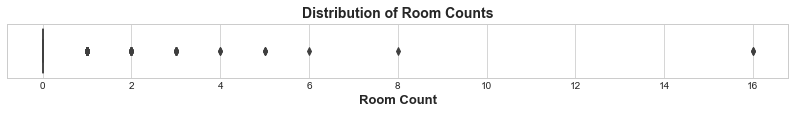

In [166]:
plt.figure(figsize=(14,1))
sns.boxplot(df[~df.room_count.isna()][df.bedrooms==0].room_count)
plt.title('Distribution of Room Counts', fontsize=14, fontweight='bold')
plt.xlabel('Room Count', fontsize=13, fontweight='bold')
plt.show()

In [167]:
df[df.bedrooms==0][df.room_count>0].room_count.value_counts().sort_index()

1.0     34
2.0     16
3.0     10
4.0      2
5.0      3
6.0      1
8.0      1
16.0     2
Name: room_count, dtype: int64

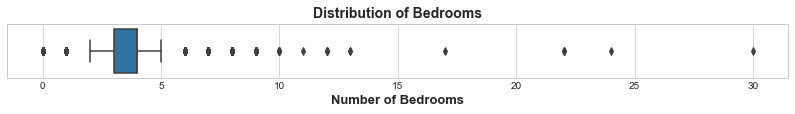

In [168]:
plt.figure(figsize=(14,1))
sns.boxplot(df.bedrooms)
plt.title('Distribution of Bedrooms', fontsize=14, fontweight='bold')
plt.xlabel('Number of Bedrooms', fontsize=13, fontweight='bold')
plt.show()

In [169]:
df[df.bedrooms == df.bedrooms.max()]

,mls_number,property_type,status,street_number,street_name,city,zip_code,county,list_price,close_price,close_date,area,school_district,school_elementary,school_middle,school_high,sq_ft_total,lot_size,year_built,bedrooms,baths_full,baths_half,baths_total,room_count,fireplaces_number,stories,new_construction,new_construction_desc,pool_private,no_of_garage_cap,style,dom,cdom,last_change_timestamp,list_date
85867,62437224,Single-Family,Expired,2354,County Road 59,Manvel,77578,Brazoria,3600000,0,1900-01-01,5,3 - Alvin,SILVERCREST ELEMENTARY SCHOOL,ROGERS/BERRY MILLER JUNIOR HIGH SCHOOL,GLENDA DAWSON HIGH SCHOOL,63890.0,463914.0,2001,30.0,30.0,10.0,31.0,6.0,NaN,2.0,False,NaN,True,9.0,Traditional,274.0,466,2017-07-12 00:30:02,2016-07-12


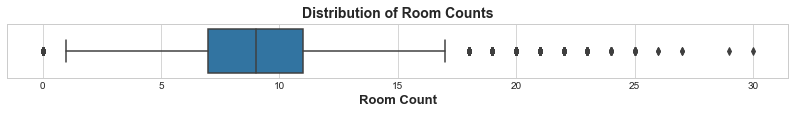

In [170]:
plt.figure(figsize=(14,1))
sns.boxplot(df[~df.room_count.isna()].room_count)
plt.title('Distribution of Room Counts', fontsize=14, fontweight='bold')
plt.xlabel('Room Count', fontsize=13, fontweight='bold')
plt.show()

In [171]:
df[['bedrooms','baths_full','baths_half','baths_total','room_count']].describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,330112.0,3.530980,0.864485,0.0,3.0,4.0,4.0,30.0
baths_full,329929.0,2.409958,0.799590,0.0,2.0,2.0,3.0,31.0
baths_half,331170.0,0.575372,0.559376,0.0,0.0,1.0,1.0,10.0
baths_total,331165.0,2.460102,0.832063,0.0,2.0,2.1,3.1,31.1
room_count,329308.0,8.612299,3.048011,0.0,7.0,9.0,11.0,30.0


In [172]:
df[df.baths_full == df.baths_full.max()]

,mls_number,property_type,status,street_number,street_name,city,zip_code,county,list_price,close_price,close_date,area,school_district,school_elementary,school_middle,school_high,sq_ft_total,lot_size,year_built,bedrooms,baths_full,baths_half,baths_total,room_count,fireplaces_number,stories,new_construction,new_construction_desc,pool_private,no_of_garage_cap,style,dom,cdom,last_change_timestamp,list_date
54853,37747624,Single-Family,Sold,12331,Carita,Richmond,77406,Fort Bend,401231,401231,2017-02-24,37,33 - Lamar Consolidated,BENTLEY ELEMENTARY SCHOOL,WERTHEIMER/BRISCOE JUNIOR HIGH SCHOOL,FOSTER HIGH SCHOOL,3196.0,9404.0,2017,4.0,31.0,1.0,31.1,13.0,1.0,2.0,True,To Be Built/Under Construction,False,2.0,Traditional,1.0,1,2017-03-01 15:41:28,2017-01-19


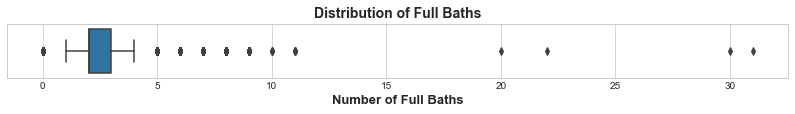

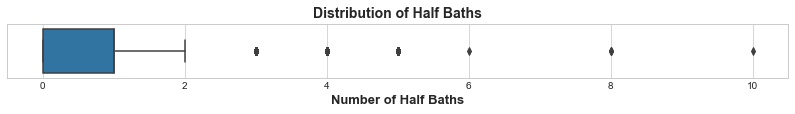

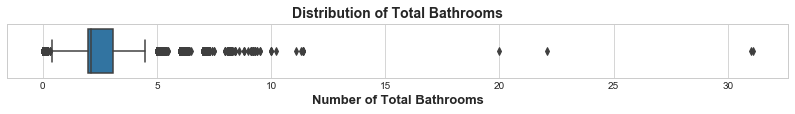

In [173]:
plt.figure(figsize=(14,1))
sns.boxplot(df[~df.baths_full.isna()].baths_full)
plt.title('Distribution of Full Baths', fontsize=14, fontweight='bold')
plt.xlabel('Number of Full Baths', fontsize=13, fontweight='bold')
plt.show()

plt.figure(figsize=(14,1))
sns.boxplot(df[~df.baths_half.isna()].baths_half)
plt.title('Distribution of Half Baths', fontsize=14, fontweight='bold')
plt.xlabel('Number of Half Baths', fontsize=13, fontweight='bold')
plt.show()

plt.figure(figsize=(14,1))
sns.boxplot(df[~df.baths_total.isna()].baths_total)
plt.title('Distribution of Total Bathrooms', fontsize=14, fontweight='bold')
plt.xlabel('Number of Total Bathrooms', fontsize=13, fontweight='bold')
plt.show()

In [174]:
df.bedrooms.replace({0:1}, inplace=True)

In [175]:
len(df[df.baths_total==0])

1417

There is high collinearity between baths total and full baths. The room count column seems to have inconsistent information input. Some values total the number of bedrooms and bathrooms in each house, and some are an entirely different amount. I will remove both these columns.

In [176]:
df = df.drop(columns=['baths_total','room_count'])

In [177]:
len(df[(df.baths_full==0) & (df.baths_half==0)])

179

In [178]:
df[df.baths_half==0].baths_full.value_counts().sort_index()

0.0        179
1.0      13224
2.0     103292
3.0      24703
4.0       7093
5.0        835
6.0        120
7.0         20
8.0          2
10.0         3
20.0         1
Name: baths_full, dtype: int64

In [179]:
len(df[(df.baths_full==0)])/len(df)

0.000842467614820183

In [180]:
view(df[df.baths_full==0],3)

,mls_number,property_type,status,street_number,street_name,city,zip_code,county,list_price,close_price,close_date,area,school_district,school_elementary,school_middle,school_high,sq_ft_total,lot_size,year_built,bedrooms,baths_full,baths_half,fireplaces_number,stories,new_construction,new_construction_desc,pool_private,no_of_garage_cap,style,dom,cdom,last_change_timestamp,list_date
108,48481298,Single-Family,Sold,13930,Mcgregor,Conroe,77302,Montgomery,100000,95000,2017-09-15,19,11 - Conroe,SAN JACINTO ELEMENTARY SCHOOL (CONROE),MOORHEAD JUNIOR HIGH SCHOOL,CANEY CREEK HIGH SCHOOL,1216.0,217800.0,1994,1.0,0.0,0.0,NaN,1.0,False,NaN,False,0.0,Other Style,8.0,8,2017-09-15 20:39:35,2017-07-22
3096,24992400,Single-Family,Sold,810,Reidland,Crosby,77532,Harris,45000,40000,2017-09-05,1,12 - Crosby,CROSBY ELEMENTARY SCHOOL (CROSBY),CROSBY MIDDLE SCHOOL (CROSBY),CROSBY HIGH SCHOOL,1082.0,9350.0,1950,1.0,0.0,0.0,NaN,1.0,False,NaN,False,1.0,Traditional,76.0,76,2018-05-21 12:43:20,2017-05-26
7336,51868140,Single-Family,Sold,23503,Wilshire,New Caney,77357,Montgomery,68500,60000,2017-08-07,40,39 - New Caney,TAVOLA ELEMENTARY SCHOOL (NEW CANEY),KEEFER CROSSING MIDDLE SCHOOL,NEW CANEY HIGH SCHOOL,1120.0,38700.0,1992,1.0,0.0,0.0,NaN,1.0,False,NaN,False,0.0,Ranch,21.0,21,2017-08-08 04:40:31,2017-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368781,34711281,Single-Family,Pending,406,Butterfly,Houston,77079,Harris,515000,0,1900-01-01,23,49 - Spring Branch,WILCHESTER ELEMENTARY SCHOOL,MEMORIAL MIDDLE SCHOOL (SPRING BRANCH),STRATFORD HIGH SCHOOL (SPRING BRANCH),2218.0,12233.0,1968,1.0,0.0,0.0,1.0,1.5,False,NaN,False,2.0,Traditional,61.0,291,2019-06-13 00:16:17,2019-03-22
370657,66486698,Single-Family,Withdrawn,2710,Jensen,Houston,77026,Harris,329000,0,1900-01-01,9,27 - Houston,SHERMAN ELEMENTARY SCHOOL,FLEMING MIDDLE SCHOOL,NORTHSIDE HIGH SCHOOL,2695.0,22110.0,1965,1.0,0.0,0.0,NaN,1.0,False,NaN,False,0.0,Other Style,122.0,122,2019-06-14 21:47:50,2019-02-12
371109,95206331,Single-Family,Withdrawn,7514,Shadyvilla,Houston,77055,Harris,550000,0,1900-01-01,24,49 - Spring Branch,HOUSMAN ELEMENTARY SCHOOL,LANDRUM MIDDLE SCHOOL,NORTHBROOK HIGH SCHOOL,2650.0,13300.0,1965,1.0,0.0,0.0,0.0,2.0,False,NaN,False,0.0,Traditional,75.0,75,2019-01-07 14:45:39,2018-10-24


In [181]:
df = df[df.baths_full != 0]

In [182]:
df.bedrooms.isna().sum()

1058

In [183]:
df[df.bedrooms.isna()].baths_full.isna().sum()

1058

In [184]:
df.baths_full.isna().sum()

1241

In [185]:
df.baths_full.isna().sum()/len(df)

0.003750479765239913

In [186]:
df = df[~df.baths_full.isna()]

### Extra House Features

In [187]:
view(df,1)

,mls_number,property_type,status,street_number,street_name,city,zip_code,county,list_price,close_price,close_date,area,school_district,school_elementary,school_middle,school_high,sq_ft_total,lot_size,year_built,bedrooms,baths_full,baths_half,fireplaces_number,stories,new_construction,new_construction_desc,pool_private,no_of_garage_cap,style,dom,cdom,last_change_timestamp,list_date
3,47405549,Single-Family,Sold,723,Broadway,Winnie,77665,Chambers,39900,25000,2017-09-20,53,18 - East Chambers,EAST CHAMBERS ELEMENTARY SCHOOL,EAST CHAMBERS J H,EAST CHAMBERS HIGH SCHOOL,672.0,2688.0,1952,2.0,1.0,0.0,NaN,1.0,False,NaN,False,0.0,Other Style,0.0,123,2017-09-21 14:59:24,2017-08-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371432,10817804,Single-Family,Withdrawn,314,Hunters Trail,Houston,77024,Harris,5999900,0,1900-01-01,23,49 - Spring Branch,HUNTERS CREEK ELEMENTARY SCHOOL,SPRING BRANCH MIDDLE SCHOOL (SPRING BRANCH),MEMORIAL HIGH SCHOOL (SPRING BRANCH),9257.0,27958.0,2019,6.0,6.0,3.0,2.0,2.0,True,To Be Built/Under Construction,False,3.0,Other Style,71.0,106,2019-06-04 10:00:42,2019-03-25


#### Fireplaces

In [188]:
print(f'{df.fireplaces_number.isna().sum()} null values in High School makes up \
{round(df.fireplaces_number.isna().sum()/len(df)*100,2)}% of the data')

98749 null values in High School makes up 29.96% of the data


In [189]:
df.fireplaces_number.value_counts().sort_index()

0.0            25512
1.0           189324
2.0            13659
3.0             1881
4.0              381
5.0              104
6.0               18
7.0                8
8.0                1
9.0                2
11.0               5
12.0               3
14.0               1
21.0               1
33181849.0         1
Name: fireplaces_number, dtype: int64

In [190]:
view(df.fireplaces_number,5)

3         NaN
4         1.0
6         0.0
7         NaN
8         NaN
         ... 
371426    2.0
371429    4.0
371430    1.0
371431    2.0
371432    2.0
Name: fireplaces_number, Length: 329650, dtype: float64

In [191]:
df.loc[[3,7,8]]

,mls_number,property_type,status,street_number,street_name,city,zip_code,county,list_price,close_price,close_date,area,school_district,school_elementary,school_middle,school_high,sq_ft_total,lot_size,year_built,bedrooms,baths_full,baths_half,fireplaces_number,stories,new_construction,new_construction_desc,pool_private,no_of_garage_cap,style,dom,cdom,last_change_timestamp,list_date
3,47405549,Single-Family,Sold,723,Broadway,Winnie,77665,Chambers,39900,25000,2017-09-20,53,18 - East Chambers,EAST CHAMBERS ELEMENTARY SCHOOL,EAST CHAMBERS J H,EAST CHAMBERS HIGH SCHOOL,672.0,2688.0,1952,2.0,1.0,0.0,NaN,1.0,False,NaN,False,0.0,Other Style,0.0,123,2017-09-21 14:59:24,2017-08-23
7,41623334,Single-Family,Sold,951,Mockingbird,Romayor,77327,Liberty,38000,36100,2017-09-01,52,107 - Hardin,HARDIN ELEMENTARY SCHOOL,HARDIN INTERMEDIATE SCHOOL,HARDIN HIGH SCHOOL,964.0,3856.0,1970,2.0,1.0,0.0,NaN,1.0,False,NaN,False,0.0,Ranch,20.0,20,2017-09-12 15:10:51,2017-05-30
8,59747549,Single-Family,Sold,211,Wooded Oak,Willis,77378,Montgomery,47000,36500,2017-09-29,14,56 - Willis,W. LLOYD MEADOR ELEMENTARY SCHOOL,ROBERT P. BRABHAM MIDDLE SCHOOL,WILLIS HIGH SCHOOL,1064.0,9713.0,1986,3.0,2.0,0.0,NaN,1.0,False,NaN,False,0.0,Traditional,22.0,22,2017-10-01 21:39:40,2017-08-30


In [192]:
view(df[df.fireplaces_number.isna()],3)

,mls_number,property_type,status,street_number,street_name,city,zip_code,county,list_price,close_price,close_date,area,school_district,school_elementary,school_middle,school_high,sq_ft_total,lot_size,year_built,bedrooms,baths_full,baths_half,fireplaces_number,stories,new_construction,new_construction_desc,pool_private,no_of_garage_cap,style,dom,cdom,last_change_timestamp,list_date
3,47405549,Single-Family,Sold,723,Broadway,Winnie,77665,Chambers,39900,25000,2017-09-20,53,18 - East Chambers,EAST CHAMBERS ELEMENTARY SCHOOL,EAST CHAMBERS J H,EAST CHAMBERS HIGH SCHOOL,672.0,2688.0,1952,2.0,1.0,0.0,NaN,1.0,False,NaN,False,0.0,Other Style,0.0,123,2017-09-21 14:59:24,2017-08-23
7,41623334,Single-Family,Sold,951,Mockingbird,Romayor,77327,Liberty,38000,36100,2017-09-01,52,107 - Hardin,HARDIN ELEMENTARY SCHOOL,HARDIN INTERMEDIATE SCHOOL,HARDIN HIGH SCHOOL,964.0,3856.0,1970,2.0,1.0,0.0,NaN,1.0,False,NaN,False,0.0,Ranch,20.0,20,2017-09-12 15:10:51,2017-05-30
8,59747549,Single-Family,Sold,211,Wooded Oak,Willis,77378,Montgomery,47000,36500,2017-09-29,14,56 - Willis,W. LLOYD MEADOR ELEMENTARY SCHOOL,ROBERT P. BRABHAM MIDDLE SCHOOL,WILLIS HIGH SCHOOL,1064.0,9713.0,1986,3.0,2.0,0.0,NaN,1.0,False,NaN,False,0.0,Traditional,22.0,22,2017-10-01 21:39:40,2017-08-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371403,37975222,Mid/Hi-Rise Condo,Withdrawn,4521,San Felipe,Houston,77027,Harris,1850000,0,1900-01-01,16,27 - Houston,SCHOOL AT ST GEORGE PLACE,LANIER MIDDLE SCHOOL,LAMAR HIGH SCHOOL (HOUSTON),2815.0,11260.0,2018,3.0,2.0,1.0,NaN,NaN,True,Never Lived In,False,NaN,NaN,19.0,19,2019-02-12 13:36:58,2019-01-24
371406,55379037,Mid/Hi-Rise Condo,Withdrawn,1409,Post Oak,Houston,77056,Harris,1950000,0,1900-01-01,22,27 - Houston,BRIARGROVE ELEMENTARY SCHOOL,TANGLEWOOD MIDDLE SCHOOL,WISDOM HIGH SCHOOL,3010.0,12040.0,2014,4.0,4.0,1.0,NaN,NaN,False,NaN,False,NaN,NaN,33.0,33,2019-03-06 01:35:59,2019-02-01
371421,25962888,Mid/Hi-Rise Condo,Withdrawn,2121,Kirby,Houston,77019,Harris,3295000,0,1900-01-01,16,27 - Houston,RIVER OAKS ELEMENTARY SCHOOL (HOUSTON),LANIER MIDDLE SCHOOL,LAMAR HIGH SCHOOL (HOUSTON),4522.0,18088.0,1983,3.0,3.0,1.0,NaN,NaN,False,NaN,False,NaN,NaN,212.0,212,2019-05-24 09:41:13,2018-10-24


From looking up some of the listings with a null value for fireplace, I believe the majority of these homes do not have a fireplace. I will change the nulls to 0. I will also replace the column with one that just describes whether or not the property has at least one fireplace.

In [193]:
df.fireplaces_number.fillna(0, inplace=True)

In [194]:
view(df.fireplaces_number,7)

3         0.0
4         1.0
6         0.0
7         0.0
8         0.0
9         0.0
13        1.0
         ... 
371424    2.0
371425    2.0
371426    2.0
371429    4.0
371430    1.0
371431    2.0
371432    2.0
Name: fireplaces_number, Length: 329650, dtype: float64

In [195]:
view(df.fireplaces_number.astype('bool'),7)

3         False
4          True
6         False
7         False
8         False
9         False
13         True
          ...  
371424     True
371425     True
371426     True
371429     True
371430     True
371431     True
371432     True
Name: fireplaces_number, Length: 329650, dtype: bool

In [196]:
df['fireplace'] = df.fireplaces_number.astype('bool')

In [197]:
df = df.drop(columns='fireplaces_number')

### Stories

In [198]:
df.stories.value_counts().sort_index()

0.00           77
1.00       145130
1.10            2
1.20            1
1.25            1
1.50         7774
1.53            1
2.00       153161
2.10            2
2.50          309
3.00        15220
3.50           30
4.00         3675
5.00           41
7.00           11
8.00            9
9.00            3
10.00           1
11.00           7
12.00           5
13.00           1
15.00           2
16.00           5
17.00           2
18.00           1
20.00           4
22.00           2
23.00           1
24.00           1
25.00           1
30.00          11
33.00           1
60.00           1
116.00          1
143.00          1
244.00          1
471.00          1
1315.00         1
1506.00         1
2105.00         1
2163.00         1
2466.00         1
2507.00         1
2848.00         1
3404.00         1
8646.00         1
Name: stories, dtype: int64

In [199]:
df[df.stories==5].head()

,mls_number,property_type,status,street_number,street_name,city,zip_code,county,list_price,close_price,close_date,area,school_district,school_elementary,school_middle,school_high,sq_ft_total,lot_size,year_built,bedrooms,baths_full,baths_half,stories,new_construction,new_construction_desc,pool_private,no_of_garage_cap,style,dom,cdom,last_change_timestamp,list_date,fireplace
13496,74603024,Townhouse/Condo,Sold,5319,Paseo Caceres,Houston,77007,Harris,875000,850000,2017-08-04,16,27 - Houston,MEMORIAL ELEMENTARY SCHOOL (HOUSTON),HOGG MIDDLE SCHOOL (HOUSTON),LAMAR HIGH SCHOOL (HOUSTON),2783.0,1976.0,2013,3.0,3.0,1.0,5.0,False,NaN,False,2.0,Spanish,23.0,23,2017-08-04 15:29:12,2017-05-25,True
15760,37370131,Mid/Hi-Rise Condo,Sold,2299,Lone Star,Sugar Land,77479,Fort Bend,365000,350000,2017-07-10,29,19 - Fort Bend,COLONY MEADOWS ELEMENTARY SCHOOL,FORT SETTLEMENT MIDDLE SCHOOL,CLEMENTS HIGH SCHOOL,1478.0,0.0,2004,2.0,2.0,0.0,5.0,False,NaN,False,0.0,NaN,61.0,61,2017-07-10 16:57:56,2017-05-10,False
34465,55669007,Townhouse/Condo,Sold,310,Calle Sevilla,Houston,77007,Harris,789000,782000,2017-05-22,16,27 - Houston,MEMORIAL ELEMENTARY SCHOOL (HOUSTON),HOGG MIDDLE SCHOOL (HOUSTON),LAMAR HIGH SCHOOL (HOUSTON),3311.0,1471.0,2008,2.0,3.0,1.0,5.0,False,NaN,False,2.0,Spanish,5.0,5,2017-05-30 15:14:46,2017-03-24,True
45336,25718743,Townhouse/Condo,Sold,5306,Calle Cadiz,Houston,77007,Harris,899900,840000,2017-04-28,16,27 - Houston,MEMORIAL ELEMENTARY SCHOOL (HOUSTON),HOGG MIDDLE SCHOOL (HOUSTON),LAMAR HIGH SCHOOL (HOUSTON),3400.0,3400.0,2013,3.0,3.0,1.0,5.0,False,NaN,False,2.0,Spanish,40.0,40,2017-05-01 20:51:53,2017-02-09,True
76013,73474034,Single-Family,Sold,340,Bomar,Houston,77006,Harris,799000,767000,2017-11-06,16,27 - Houston,WILLIAM WHARTON K-8 DUAL LANGUAGE ACADEMY,GREGORY-LINCOLN MIDDLE SCHOOL,LAMAR HIGH SCHOOL (HOUSTON),3335.0,2195.0,2014,3.0,2.0,1.0,5.0,False,NaN,False,2.0,Mediterranean,81.0,81,2017-11-07 08:52:00,2017-07-06,True


In [200]:
view(df[df.stories>10],3)

,mls_number,property_type,status,street_number,street_name,city,zip_code,county,list_price,close_price,close_date,area,school_district,school_elementary,school_middle,school_high,sq_ft_total,lot_size,year_built,bedrooms,baths_full,baths_half,stories,new_construction,new_construction_desc,pool_private,no_of_garage_cap,style,dom,cdom,last_change_timestamp,list_date,fireplace
3125,41634031,Townhouse/Condo,Sold,7520,Hornwood,Houston,77036,Harris,55000,51500,2017-09-15,17,27 - Houston,NEFF ELEMENTARY SCHOOL,SUGAR GROVE MIDDLE SCHOOL,SHARPSTOWN HIGH SCHOOL,872.0,872.0,1966,2.0,2.0,0.0,16.0,False,NaN,False,0.0,Traditional,37.0,37,2017-09-16 02:36:22,2017-07-31,False
16561,74607964,Townhouse/Condo,Sold,10555,Turtlewood,Houston,77072,Harris,65000,64000,2017-07-06,28,2 - Alief,CHAMBERS ELEMENTARY SCHOOL,KILLOUGH MIDDLE SCHOOL,AISD DRAW,802.0,802.0,1980,1.0,1.0,0.0,116.0,False,NaN,False,0.0,Traditional,9.0,9,2017-07-06 17:59:41,2017-06-06,False
18959,2438799,Single-Family,Sold,19610,Iris Manor,Katy,77449,Harris,224340,224340,2017-07-28,25,13 - Cypress-Fairbanks,WOODCREEK ELEMENTARY SCHOOL,WOODCREEK JUNIOR HIGH SCHOOL,KATY HIGH SCHOOL,2140.0,2140.0,2017,4.0,2.0,1.0,12.0,True,To Be Built/Under Construction,False,2.0,Traditional,29.0,29,2017-09-12 17:05:32,2017-05-10,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348265,45301850,Single-Family,Pending,1806,Millbury,Missouri City,77489,Fort Bend,187000,0,1900-01-01,38,19 - Fort Bend,HUNTERS GLEN ELEMENTARY SCHOOL,MISSOURI CITY MIDDLE SCHOOL,MARSHALL HIGH SCHOOL (FORT BEND),1970.0,7370.0,1978,3.0,2.0,0.0,11.0,False,NaN,False,2.0,Traditional,37.0,37,2019-06-17 00:16:24,2019-05-02,True
358152,3486179,Single-Family,Active,9770,Gulfstream,Conroe,77303,Montgomery,189000,0,1900-01-01,19,11 - Conroe,PATTERSON ELEMENTARY SCHOOL (CONROE),WASHINGTON JUNIOR HIGH SCHOOL,CONROE HIGH SCHOOL,1860.0,5400.0,2013,4.0,2.0,0.0,11.0,False,NaN,False,2.0,Traditional,8.0,45,2019-06-11 09:03:10,2019-06-11,False
358886,72390827,Single-Family,Active,22131,Dove Valley,Porter,77365,Montgomery,251999,0,1900-01-01,40,39 - New Caney,VALLEY RANCH ELEMENTARY SCHOOL (NEW CANEY),NEW CANEY MIDDLE SCHOOL,NEW CANEY HIGH SCHOOL,2848.0,8434.0,2017,4.0,2.0,1.0,2848.0,False,NaN,False,2.0,Traditional,40.0,40,2019-06-12 14:51:22,2019-05-10,False


In [201]:
df[df.stories>3].property_type.value_counts()

Single-Family        2344
Townhouse/Condo      1467
Mid/Hi-Rise Condo      17
Name: property_type, dtype: int64

In [202]:
df[df.stories>4].property_type.value_counts()

Townhouse/Condo      72
Single-Family        42
Mid/Hi-Rise Condo     9
Name: property_type, dtype: int64

It is highly unlikely that many of these homes actually have more than 3 stories. Especially given how many of these homes are of the townhouse/condo or mid-hi-rise condo type, I believe that the listings described how many floors there are in the complete building and not just the unit themselves. Additionally there are so few homes with more than 4 stories that even if that value is true, it will skew the data. This information could be misleading, so I will remove any homes with more than 4 stories and any townhouse/condo or mid/hi-rise condo types with more than 3 stories.

In [203]:
df = df[df.stories<=4]

In [204]:
df.shape

(325383, 33)

In [205]:
indexes = df[(df.stories>3) & (df.property_type.str.contains('Condo'))].index

In [206]:
df.drop(indexes, inplace=True)

In [207]:
df.stories.value_counts()

2.00    153161
1.00    145130
3.00     15220
1.50      7774
4.00      2273
2.50       309
0.00        77
3.50        29
1.10         2
2.10         2
1.20         1
1.53         1
1.25         1
Name: stories, dtype: int64

In [208]:
df[df.stories%0.5!=0].stories.value_counts()

1.10    2
2.10    2
1.53    1
1.20    1
1.25    1
Name: stories, dtype: int64

In [209]:
df[df.stories%0.5!=0]

,mls_number,property_type,status,street_number,street_name,city,zip_code,county,list_price,close_price,close_date,area,school_district,school_elementary,school_middle,school_high,sq_ft_total,lot_size,year_built,bedrooms,baths_full,baths_half,stories,new_construction,new_construction_desc,pool_private,no_of_garage_cap,style,dom,cdom,last_change_timestamp,list_date,fireplace
20619,97998474,Single-Family,Sold,9611,Stonebridge Lake,Tomball,77375,Harris,549900,525000,2017-07-18,14,53 - Tomball,CREEKVIEW ELEMENTARY SCHOOL,CREEKSIDE PARK JUNIOR HIGH SCHOOL,TOMBALL HIGH SCHOOL,4409.0,55952.0,2000,4.0,4.0,1.0,1.25,False,NaN,True,3.0,Traditional,11.0,11,2017-07-20 09:57:29,2017-05-25,True
145865,70188166,Single-Family,Sold,914,Taylor Ridge,Spring,77373,Harris,220000,210000,2018-06-19,12,48 - Spring,NORTHGATE ELEMENTARY SCHOOL,TWIN CREEKS MIDDLE SCHOOL,SPRING HIGH SCHOOL,2765.0,7956.0,2004,4.0,2.0,0.0,1.10,False,NaN,False,2.0,Traditional,5.0,5,2018-06-19 17:49:27,2018-05-08,True
148348,22932891,Single-Family,Sold,5019,Stanhope,Houston,77084,Harris,190000,191000,2018-06-08,8,30 - Katy,BEAR CREEK ELEMENTARY SCHOOL (KATY),CARDIFF JUNIOR HIGH SCHOOL,MAYDE CREEK HIGH SCHOOL,2241.0,7590.0,1974,3.0,2.0,1.0,1.10,False,NaN,True,2.0,Traditional,3.0,3,2018-06-10 10:27:36,2018-04-24,True
209360,6486250,Single-Family,Sold,17519,Shoal Lake,Houston,77095,Harris,389900,385000,2018-11-19,8,13 - Cypress-Fairbanks,COPELAND ELEMENTARY SCHOOL (CYPRESS-FAIRBANKS),ARAGON MIDDLE SCHOOL,LANGHAM CREEK HIGH SCHOOL,3614.0,10156.0,2007,4.0,4.0,1.0,1.53,False,NaN,False,3.0,Mediterranean,9.0,9,2018-11-19 17:04:24,2018-10-26,True
214003,87858938,Single-Family,Sold,11810,Longwood Garden,Houston,77047,Harris,193000,183000,2018-12-31,3,27 - Houston,ALMEDA ELEMENTARY SCHOOL,LAWSON MIDDLE SCHOOL,WORTHING HIGH SCHOOL,2300.0,5809.0,2005,3.0,2.0,0.0,1.20,False,NaN,False,2.0,Traditional,12.0,12,2019-01-08 17:08:16,2018-11-19,False
292867,78087799,Single-Family,Sold,7708,Hunters Creekway,Houston,77055,Harris,649000,641500,2019-04-19,24,49 - Spring Branch,HUNTERS CREEK ELEMENTARY SCHOOL,SPRING BRANCH MIDDLE SCHOOL (SPRING BRANCH),MEMORIAL HIGH SCHOOL (SPRING BRANCH),3824.0,2780.0,2003,3.0,4.0,1.0,2.10,False,NaN,False,2.0,Mediterranean,9.0,185,2019-04-22 14:14:58,2019-03-18,True
313004,84767958,Single-Family,Expired,7708,Hunters Creekway,Houston,77055,Harris,699000,0,1900-01-01,24,49 - Spring Branch,HUNTERS CREEK ELEMENTARY SCHOOL,SPRING BRANCH MIDDLE SCHOOL (SPRING BRANCH),MEMORIAL HIGH SCHOOL (SPRING BRANCH),3824.0,2780.0,2003,3.0,4.0,1.0,2.10,False,NaN,False,2.0,Mediterranean,176.0,176,2019-02-07 00:10:27,2018-08-14,True


In [210]:
df.stories.replace({0:1, 1.1:1, 1.2:1.5, 1.25:1.5, 1.53:1.5, 2.1:2}, inplace=True)

In [211]:
df.stories.value_counts().sort_index()

1.0    145209
1.5      7777
2.0    153163
2.5       309
3.0     15220
3.5        29
4.0      2273
Name: stories, dtype: int64

#### New Construction

In [212]:
df.new_construction.value_counts().sort_index()

False    266676
True      57304
Name: new_construction, dtype: int64

In [213]:
df.new_construction = df.new_construction.astype('bool')

#### New Construction Description

In [214]:
df.new_construction_desc.value_counts()

To Be Built/Under Construction    34945
Never Lived In                    22359
Name: new_construction_desc, dtype: int64

In [215]:
df.new_construction_desc.isna().sum()

266676

In [216]:
df.new_construction_desc.fillna('Not New', inplace=True)

In [217]:
df.new_construction_desc.value_counts()

Not New                           266676
To Be Built/Under Construction     34945
Never Lived In                     22359
Name: new_construction_desc, dtype: int64

#### Private Pool

In [218]:
df.pool_private.value_counts().sort_index()

False    285343
True      38637
Name: pool_private, dtype: int64

In [219]:
df.pool_private = df.pool_private.astype('bool')

#### Garage Capacity

In [220]:
view(df.no_of_garage_cap.value_counts().sort_index(),5)

0.0          27833
1.0          15418
2.0         228705
3.0          46499
4.0           4203
             ...  
2000.0           1
3821.0           2
7000.0           3
8234.0           1
260120.0         1
Name: no_of_garage_cap, Length: 62, dtype: int64

In [221]:
df[df.no_of_garage_cap>=3].property_type.value_counts()

Single-Family      51767
Townhouse/Condo      256
Name: property_type, dtype: int64

Most of the homes with multiple garages are single-family homes. I assume the listings with excessive numbers of garages have mistaken information entered. I will change this column to a boolean of whether or not the home has any garage or not.

In [222]:
view(df.no_of_garage_cap,5)

3         0.0
4         1.0
6         0.0
7         0.0
8         0.0
         ... 
371425    3.0
371426    3.0
371429    6.0
371431    0.0
371432    3.0
Name: no_of_garage_cap, Length: 323980, dtype: float64

In [223]:
view(df.no_of_garage_cap.astype('bool'),5)

3         False
4          True
6         False
7         False
8         False
          ...  
371425     True
371426     True
371429     True
371431    False
371432     True
Name: no_of_garage_cap, Length: 323980, dtype: bool

In [224]:
df['garage'] = df.no_of_garage_cap.astype('bool')

In [225]:
df = df.drop(columns='no_of_garage_cap')

#### Style

In [226]:
df[df['style'].isna()].property_type.value_counts()

Mid/Hi-Rise Condo    115
Multi-Family          38
Single-Family          4
Townhouse/Condo        2
Name: property_type, dtype: int64

In [227]:
df['style'].nunique()

251

In [228]:
df['style'].unique()[:20]

array(['Other Style', 'Mediterranean', 'Traditional', 'Ranch',
       'Contemporary/Modern', 'Ranch, Traditional', 'Split Level',
       'Victorian', nan, 'Colonial', 'Split Level, Traditional',
       'Contemporary/Modern, Traditional', 'Georgian',
       'Colonial, Traditional', 'Spanish', 'English, Traditional',
       'Contemporary/Modern, Ranch', 'English', 'French',
       'Traditional, Victorian'], dtype=object)

The styles are combined. Each the unique values are: 
* Colonial
* Contemporary/Modern
* English
* French
* Georgian
* Mediterranean
* nan
* Other Style
* Ranch
* Spanish
* Split Level
* Traditional
* Victorian

I don't believe these descriptors will add too much value to my analysis, so I will remove this column.

In [229]:
df.drop(columns='style', inplace=True)

## Listing and Selling Information

### DOM and CDOM

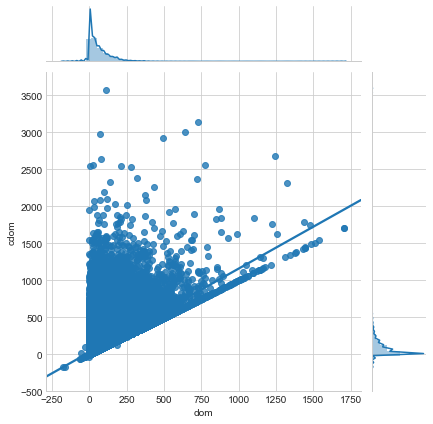

In [230]:
sns.jointplot(x="dom", y="cdom", data=df, kind="reg");

Data type: float64
Count: 323980
Number of Unique Values: 863
Number of nulls: 0 - 0.0%

Mean: 68.48915982468054
Minimum: -173.0
Lower Quartile: 13.0
Median: 42.0
Upper Quartile: 96.0
Maximum: 1703.0


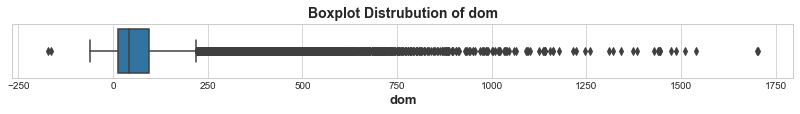

In [231]:
stats(df,'dom')

Data type: int64
Count: 323980
Number of Unique Values: 1436
Number of nulls: 0 - 0.0%

Mean: 105.0364034816964
Minimum: -173
Lower Quartile: 16.0
Median: 60.0
Upper Quartile: 143.0
Maximum: 3576


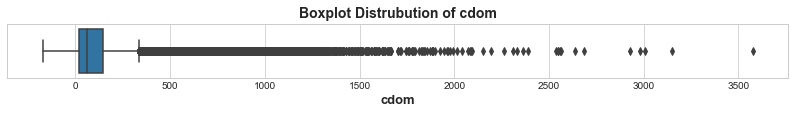

In [232]:
stats(df,'cdom')

In [233]:
df.cdom.describe()

count    323980.000000
mean        105.036403
std         137.096601
min        -173.000000
25%          16.000000
50%          60.000000
75%         143.000000
max        3576.000000
Name: cdom, dtype: float64

In [234]:
df.cdom.value_counts().sort_index()

-173        1
-164        1
-62         1
-59         1
-50         1
-45         1
-35         1
-32         1
-29         1
-28         3
-27         1
-25         1
-22         1
-21         1
-12         1
-10         4
-9          1
-8          1
-7          1
-4          2
-3          2
-2          3
-1          6
 0       6060
 1       3728
 2       5471
 3       6768
 4       7150
 5       7054
 6       6394
         ... 
 1924       1
 1948       1
 1961       1
 1964       1
 1978       1
 1991       1
 2015       1
 2039       1
 2072       1
 2081       1
 2088       1
 2094       1
 2153       1
 2194       1
 2261       1
 2311       1
 2333       1
 2364       1
 2390       1
 2538       1
 2545       2
 2558       1
 2563       1
 2637       1
 2683       1
 2926       1
 2979       1
 3004       1
 3147       1
 3576       1
Name: cdom, Length: 1436, dtype: int64

In [235]:
df = df[df.cdom>=0]

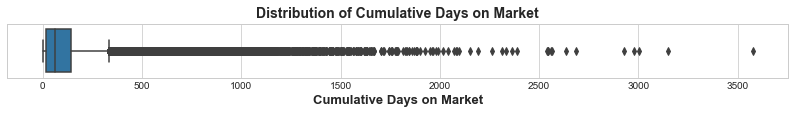

In [236]:
plt.figure(figsize=(14,1))
sns.boxplot(df['cdom'], showfliers=True)
plt.title('Distribution of Cumulative Days on Market', fontsize=14, fontweight='bold')
plt.xlabel('Cumulative Days on Market', fontsize=13, fontweight='bold')
plt.show()

In [237]:
len(df[df.cdom>1600])

79

In [238]:
df = df[df.cdom<=1600]

## Checking

### Info

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323864 entries, 3 to 371432
Data columns (total 32 columns):
mls_number               323864 non-null int64
property_type            323864 non-null object
status                   323864 non-null object
street_number            323864 non-null object
street_name              323864 non-null object
city                     323864 non-null object
zip_code                 323864 non-null object
county                   323864 non-null object
list_price               323864 non-null int64
close_price              323864 non-null int64
close_date               323864 non-null datetime64[ns]
area                     323864 non-null int64
school_district          323864 non-null object
school_elementary        323864 non-null object
school_middle            323864 non-null object
school_high              323864 non-null object
sq_ft_total              323864 non-null float64
lot_size                 323864 non-null float64
year_built         

### Describe

In [240]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mls_number,323864.0,5.048948e+07,2.818522e+07,104240.0,26161903.25,50375908.0,74847768.75,338218412.0
list_price,323864.0,3.380528e+05,3.415473e+05,20000.0,189900.00,264900.0,379900.00,29999999.0
close_price,323864.0,1.615131e+05,2.240112e+05,0.0,0.00,140000.0,249900.00,17500000.0
area,323864.0,2.110999e+01,1.281462e+01,1.0,10.00,20.0,33.00,86.0
sq_ft_total,323864.0,2.530677e+03,1.149833e+03,450.0,1790.00,2354.0,3062.00,217800.0
lot_size,323864.0,1.973022e+04,1.757913e+06,0.0,6070.00,7800.0,10337.25,999999999.0
year_built,323864.0,1.997073e+03,1.870609e+01,1950.0,1982.00,2003.0,2013.00,2019.0
bedrooms,323864.0,3.557080e+00,8.381068e-01,1.0,3.00,4.0,4.00,30.0
baths_full,323864.0,2.416073e+00,7.942564e-01,1.0,2.00,2.0,3.00,31.0
baths_half,323864.0,5.784774e-01,5.589513e-01,0.0,0.00,1.0,1.00,10.0


### Boxplot Distributions

In [241]:
num_cols = df.describe().columns[1:]

In [242]:
num_cols

Index(['list_price', 'close_price', 'area', 'sq_ft_total', 'lot_size',
       'year_built', 'bedrooms', 'baths_full', 'baths_half', 'stories', 'dom',
       'cdom'],
      dtype='object')

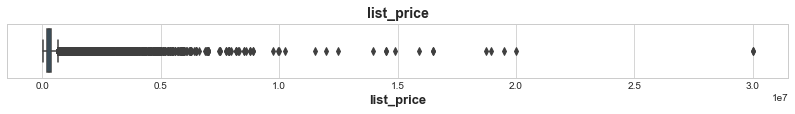

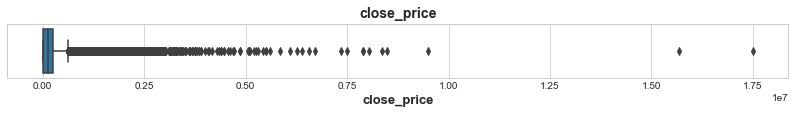

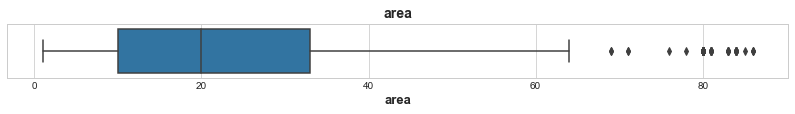

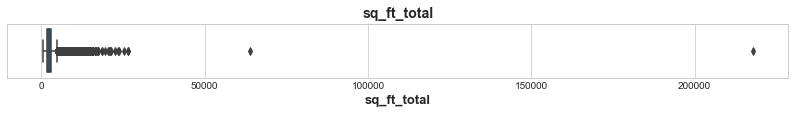

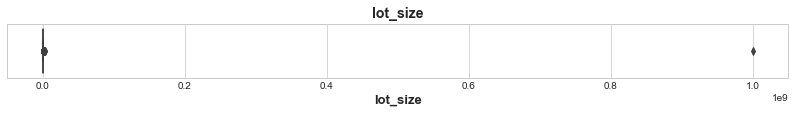

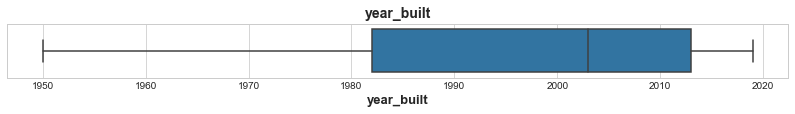

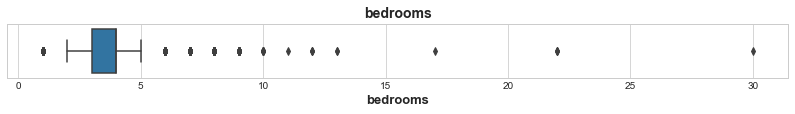

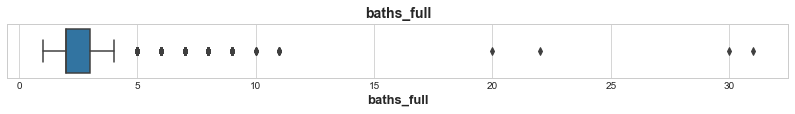

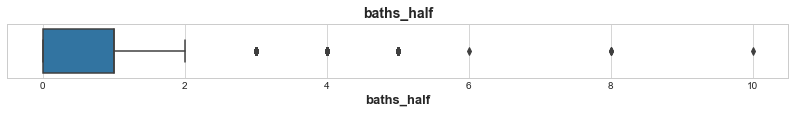

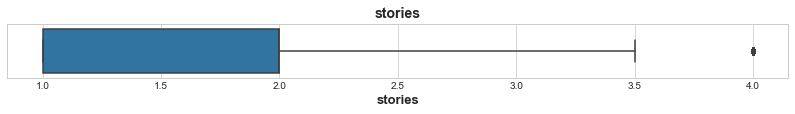

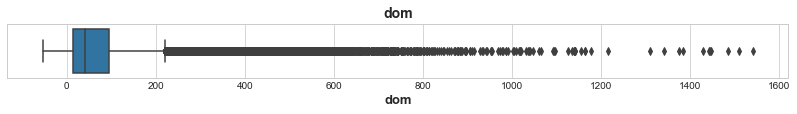

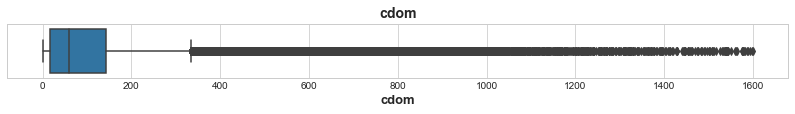

In [243]:
for n in num_cols:
    plt.figure(figsize=(14,1))
    sns.boxplot(df[n])
    plt.title(n, fontsize=14, fontweight='bold')
    plt.xlabel("", fontsize=13, fontweight='bold')
    plt.show()

### Histograms

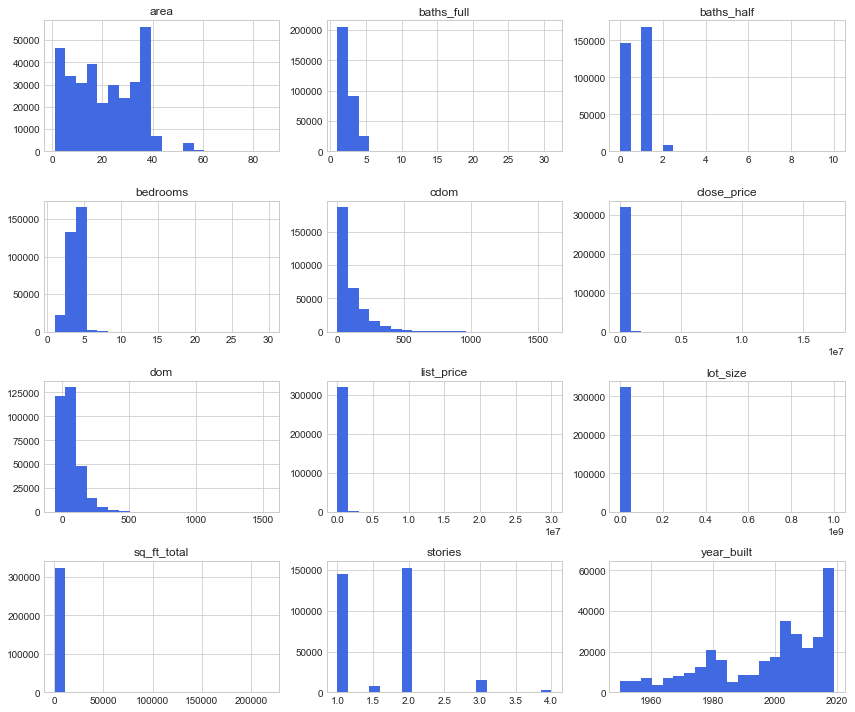

In [251]:
df[num_cols].hist(bins=20, figsize=(12,10), color='royalblue')
plt.tight_layout()
plt.show()

### Multicollinearity Heat Map

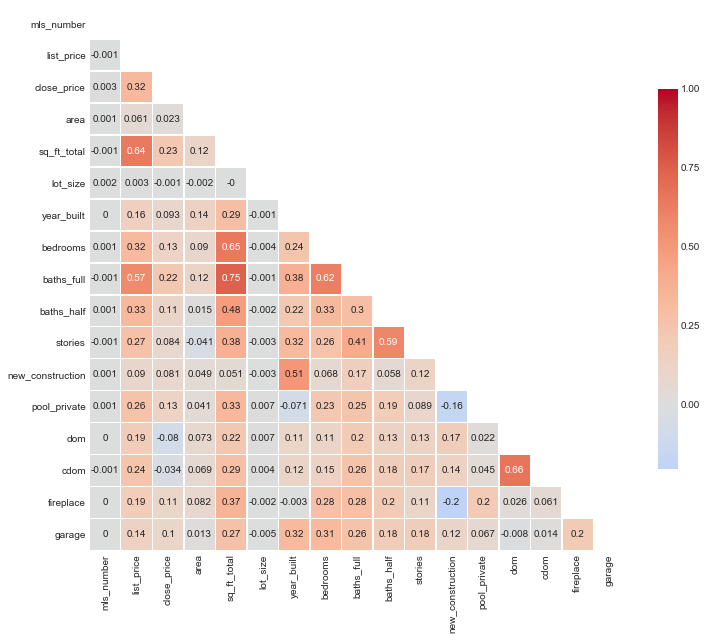

In [245]:
import seaborn as sns
f, ax = plt.subplots(figsize=(12, 10))

corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(round(df.corr(),3), mask=mask, cbar_kws={'shrink':.7}, annot=True, center=0, linewidth=0.3, cmap='coolwarm');

MLS_NUMBER

Data type: int64
Count: 323864
Number of Unique Values: 323864
Number of nulls: 0 - 0.0%

Mean: 50489483.234055035
Minimum: 104240
Lower Quartile: 26161903.25
Median: 50375908.0
Upper Quartile: 74847768.75
Maximum: 338218412


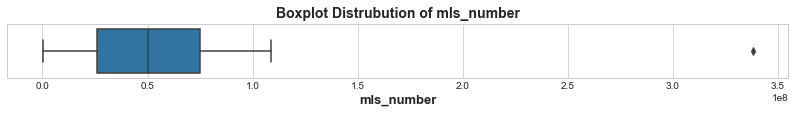

None



10000122    1
10000191    1
10000324    1
           ..
99999204    1
99999419    1
9999959     1
Name: mls_number, Length: 323864, dtype: int64

None



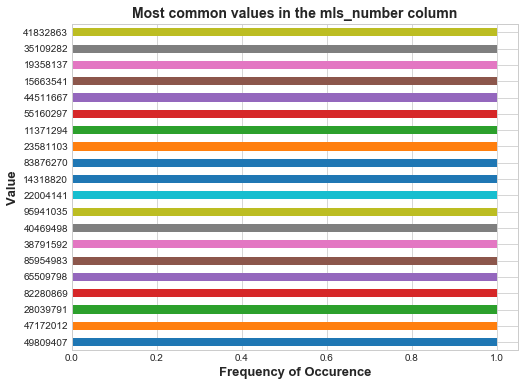


**************************************************

PROPERTY_TYPE

Data type: object
Number of unique values: 4
Number of nulls: 0 - 0.0%
count            323864
unique                4
top       Single-Family
freq             298456
Name: property_type, dtype: object



Mid/Hi-Rise Condo       115
Multi-Family             37
Single-Family        298456
Townhouse/Condo       25256
Name: property_type, dtype: int64

None



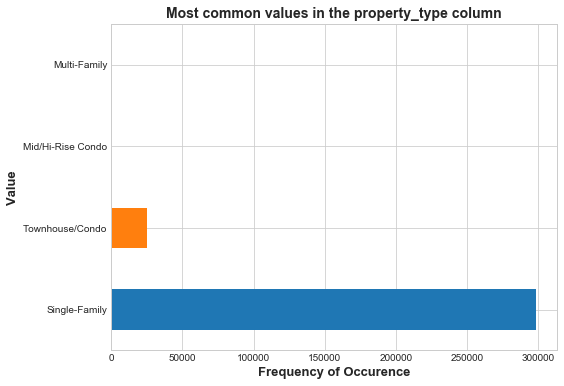


**************************************************

STATUS

Data type: object
Number of unique values: 8
Number of nulls: 0 - 0.0%
count     323864
unique         8
top         Sold
freq      185413
Name: status, dtype: object



Active             23934
Expired            30932
Option Pending      2108
                   ...  
Sold              185413
Terminated         69270
Withdrawn           2806
Name: status, Length: 8, dtype: int64

None



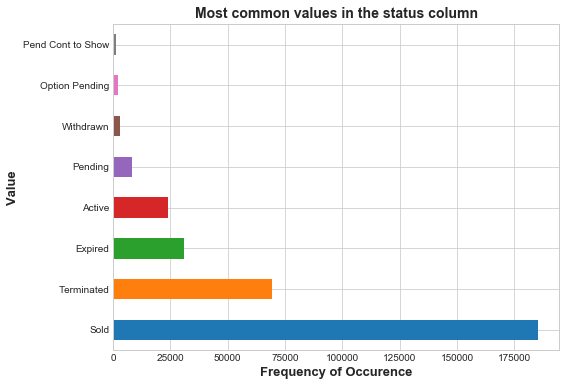


**************************************************

STREET_NUMBER

Data type: object
Number of unique values: 21679
Number of nulls: 0 - 0.0%
count     323864
unique     21679
top           10
freq         288
Name: street_number, dtype: object



0          72
00          6
000         7
           ..
S614300     1
TBD         6
TR 4-2      1
Name: street_number, Length: 21679, dtype: int64

None



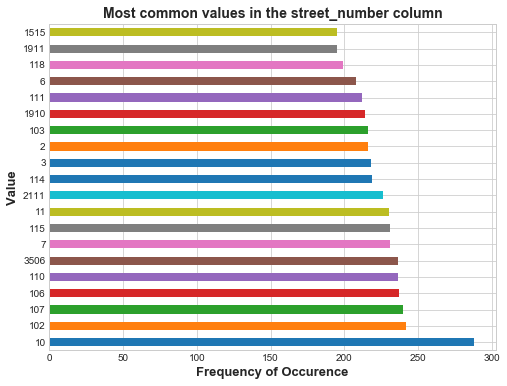


**************************************************

STREET_NAME

Data type: object
Number of unique values: 51579
Number of nulls: 0 - 0.0%
count      323864
unique      51579
top       Seawall
freq          436
Name: street_name, dtype: object



1                  1
1/2 Boss Gaston    1
1/2 Cedar St       1
                  ..
woolridge          1
wornington ct      1
yorkshire oak      1
Name: street_name, Length: 51579, dtype: int64

None



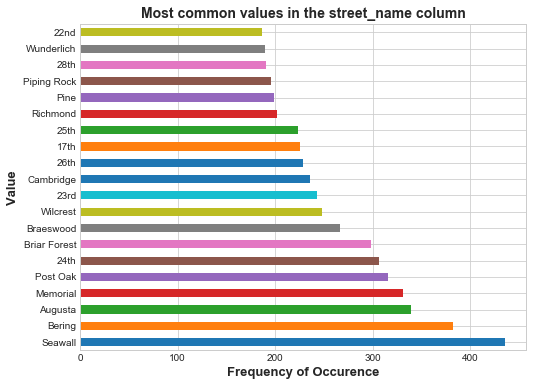


**************************************************

CITY

Data type: object
Number of unique values: 95
Number of nulls: 0 - 0.0%
count      323864
unique         95
top       Houston
freq       114398
Name: city, dtype: object



Alief               2
Alvin            1536
Anahuac           120
                 ... 
West Columbia     189
Willis           2260
Winnie             63
Name: city, Length: 95, dtype: int64

None



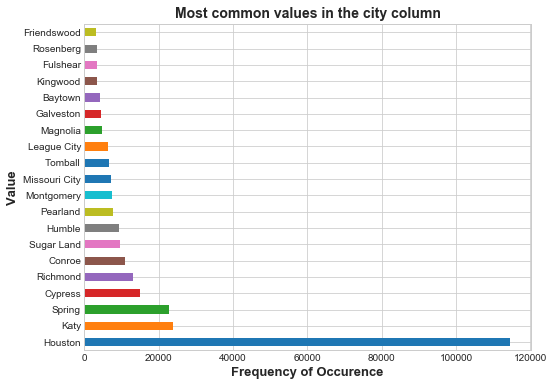


**************************************************

ZIP_CODE

Data type: object
Number of unique values: 220
Number of nulls: 0 - 0.0%
count     323864
unique       220
top        77494
freq        9932
Name: zip_code, dtype: object



77002      75
77003    1067
77004    1581
         ... 
78933       3
78944       2
78950       8
Name: zip_code, Length: 220, dtype: int64

None



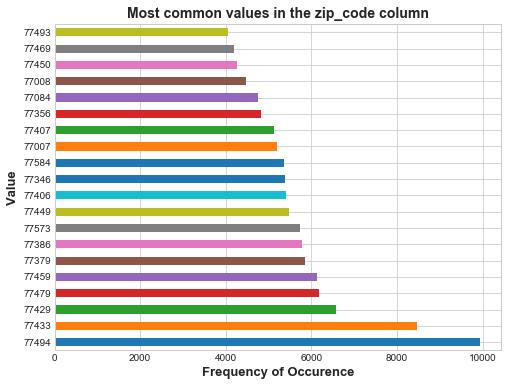


**************************************************

COUNTY

Data type: object
Number of unique values: 9
Number of nulls: 0 - 0.0%
count     323864
unique         9
top       Harris
freq      192525
Name: county, dtype: object



Austin          518
Brazoria      14960
Chambers       1903
              ...  
Liberty        2051
Montgomery    37744
Waller         2192
Name: county, Length: 9, dtype: int64

None



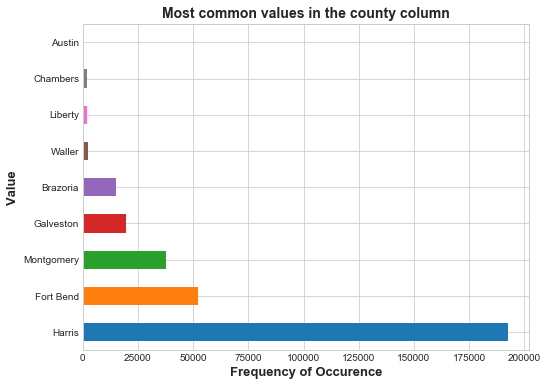


**************************************************

LIST_PRICE

Data type: int64
Count: 323864
Number of Unique Values: 26923
Number of nulls: 0 - 0.0%

Mean: 338052.7981344021
Minimum: 20000
Lower Quartile: 189900.0
Median: 264900.0
Upper Quartile: 379900.0
Maximum: 29999999


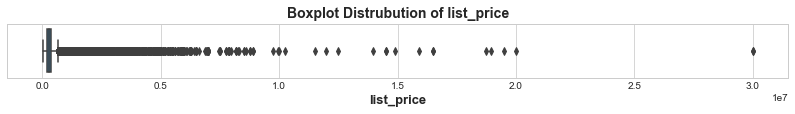

None



100000      369
1000000      79
10000000      1
           ... 
999990        6
999995        6
999999       53
Name: list_price, Length: 26923, dtype: int64

None



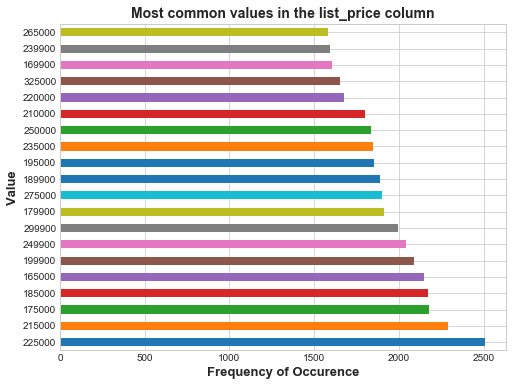


**************************************************

CLOSE_PRICE

Data type: int64
Count: 323864
Number of Unique Values: 21591
Number of nulls: 0 - 0.0%

Mean: 161513.09027863547
Minimum: 0
Lower Quartile: 0.0
Median: 140000.0
Upper Quartile: 249900.0
Maximum: 17500000


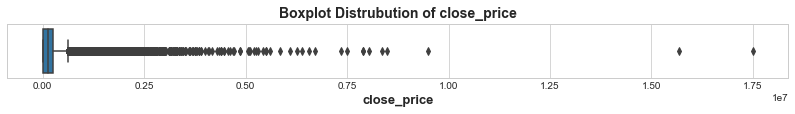

None



0          138451
100000        343
1000000        52
            ...  
999900          3
999995          1
999999          3
Name: close_price, Length: 21591, dtype: int64

None



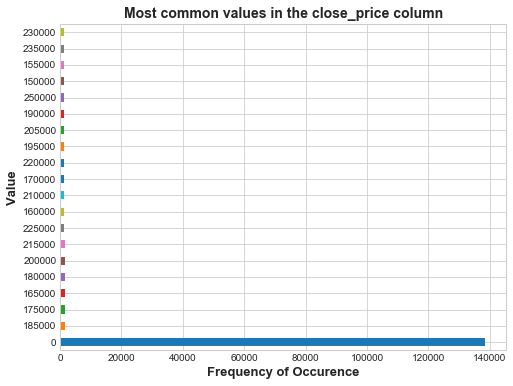


**************************************************

CLOSE_DATE

Data type: datetime64[ns]
Number of unique values: 893
Number of nulls: 0 - 0.0%
count                  323864
unique                    893
top       1900-01-01 00:00:00
freq                   138451
first     1900-01-01 00:00:00
last      2019-06-16 00:00:00
Name: close_date, dtype: object



1900-01-01    138451
2017-01-01         6
2017-01-02        13
               ...  
2019-06-14       373
2019-06-15         8
2019-06-16         2
Name: close_date, Length: 893, dtype: int64

None



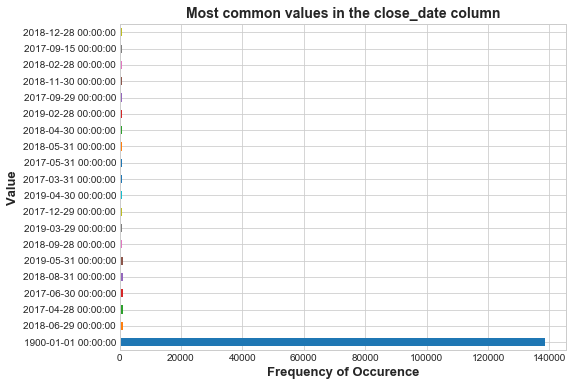


**************************************************

AREA

Data type: int64
Count: 323864
Number of Unique Values: 61
Number of nulls: 0 - 0.0%

Mean: 21.10999061334387
Minimum: 1
Lower Quartile: 10.0
Median: 20.0
Upper Quartile: 33.0
Maximum: 86


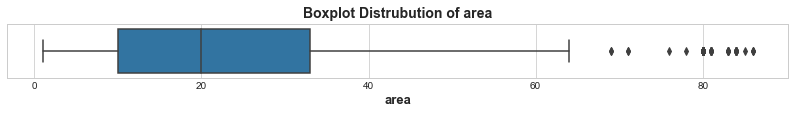

None



1     12837
10     7701
11     3151
      ...  
85        1
86        3
9     13084
Name: area, Length: 61, dtype: int64

None



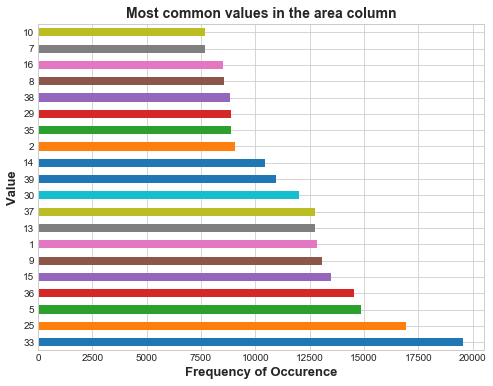


**************************************************

SCHOOL_DISTRICT

Data type: object
Number of unique values: 72
Number of nulls: 0 - 0.0%
count           323864
unique              72
top       27 - Houston
freq             56021
Name: school_district, dtype: object



1 - Aldine                 5572
10 - Columbia-Brazoria      337
100 - Cleveland             409
                          ...  
8 - Channelview             717
9 - Clear Creek           12575
99 - Other                   74
Name: school_district, Length: 72, dtype: int64

None



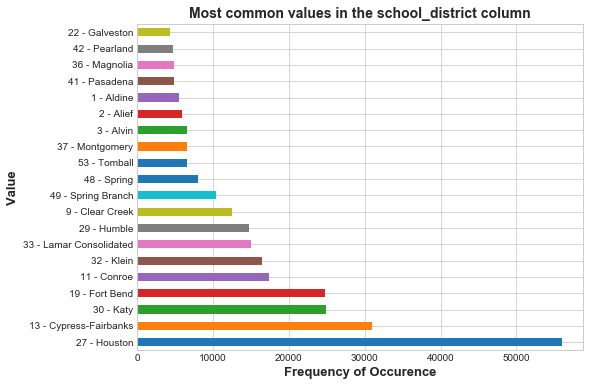


**************************************************

SCHOOL_ELEMENTARY

Data type: object
Number of unique values: 855
Number of nulls: 0 - 0.0%
count               323864
unique                 855
top       GISD OPEN ENROLL
freq                  4292
Name: school_elementary, dtype: object



A ROBISON ELEMENTARY SCHOOL            690
A.R. TURNER ELEMENTARY SCHOOL         1327
ADAM ELEMENTARY SCHOOL                 499
                                      ... 
YOUNG ELEMENTARY SCHOOL (HOUSTON)      309
YOUNG ELEMENTARY SCHOOL (PASADENA)      97
ZWINK ELEMENTARY SCHOOL                631
Name: school_elementary, Length: 855, dtype: int64

None



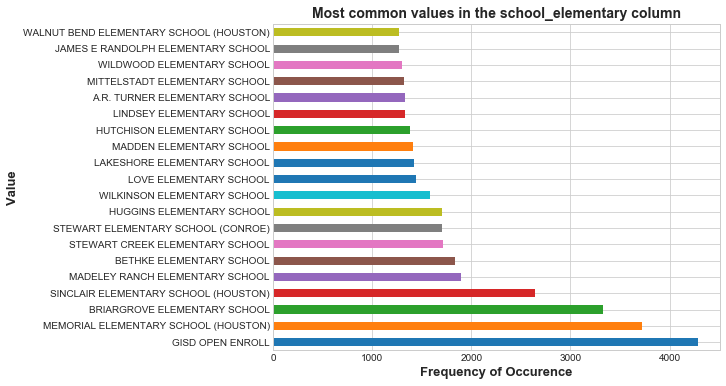


**************************************************

SCHOOL_MIDDLE

Data type: object
Number of unique values: 305
Number of nulls: 0 - 0.0%
count                           323864
unique                             305
top       HOGG MIDDLE SCHOOL (HOUSTON)
freq                              6191
Name: school_middle, dtype: object



ADAMS MIDDLE SCHOOL                  1
AGUIRRE JUNIOR HIGH                243
ALBRIGHT MIDDLE SCHOOL            1315
                                  ... 
WOODSON MIDDLE SCHOOL              248
WUNDERLICH INTERMEDIATE SCHOOL    1390
YORK JUNIOR HIGH SCHOOL           4660
Name: school_middle, Length: 305, dtype: int64

None



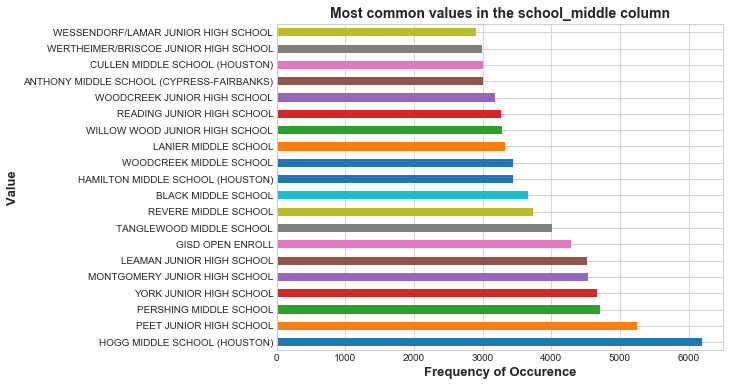


**************************************************

SCHOOL_HIGH

Data type: object
Number of unique values: 206
Number of nulls: 0 - 0.0%
count                          323864
unique                            206
top       LAMAR HIGH SCHOOL (HOUSTON)
freq                             9668
Name: school_high, dtype: object



AISD DRAW               5881
ALDINE HIGH SCHOOL       470
ALVIN HIGH SCHOOL       1547
                        ... 
WISDOM HIGH SCHOOL      5529
WORTHING HIGH SCHOOL    2162
YATES HIGH SCHOOL       1538
Name: school_high, Length: 206, dtype: int64

None



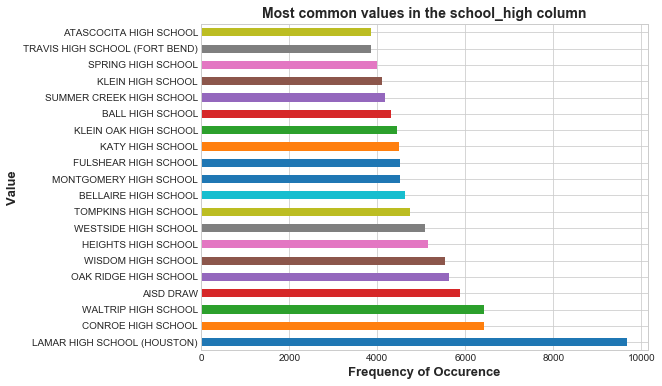


**************************************************

SQ_FT_TOTAL

Data type: float64
Count: 323864
Number of Unique Values: 6700
Number of nulls: 0 - 0.0%

Mean: 2530.67688597683
Minimum: 450.0
Lower Quartile: 1790.0
Median: 2354.0
Upper Quartile: 3062.0
Maximum: 217800.0


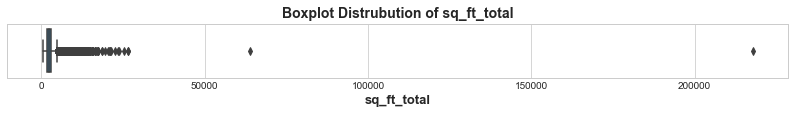

None



1000.0     116
10000.0      6
1001.0      36
          ... 
999.0       14
9997.0       2
9999.0       3
Name: sq_ft_total, Length: 6700, dtype: int64

None



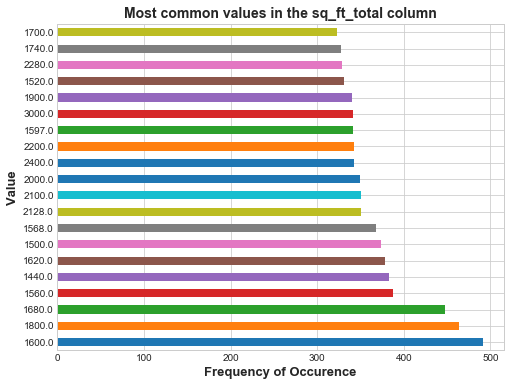


**************************************************

LOT_SIZE

Data type: float64
Count: 323864
Number of Unique Values: 29609
Number of nulls: 0 - 0.0%

Mean: 19730.220424622683
Minimum: 0.0
Lower Quartile: 6070.0
Median: 7800.0
Upper Quartile: 10337.25
Maximum: 999999999.0


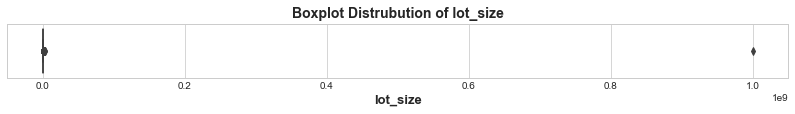

None



0.0            791
1.0              8
100.0            1
              ... 
9999.0          11
9999.4          18
999999999.0      1
Name: lot_size, Length: 29609, dtype: int64

None



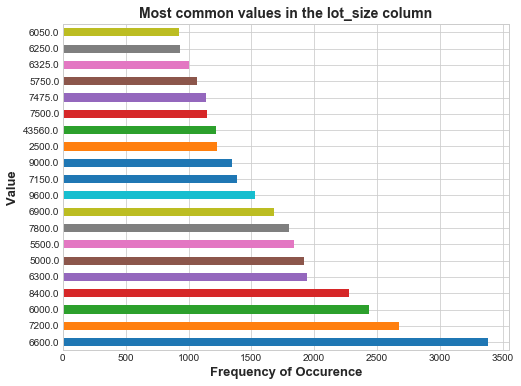


**************************************************

YEAR_BUILT

Data type: int64
Count: 323864
Number of Unique Values: 70
Number of nulls: 0 - 0.0%

Mean: 1997.0733270755625
Minimum: 1950
Lower Quartile: 1982.0
Median: 2003.0
Upper Quartile: 2013.0
Maximum: 2019


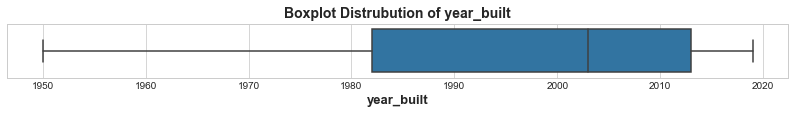

None



1950     2913
1951      544
1952     1097
        ...  
2017    19689
2018    20223
2019    10506
Name: year_built, Length: 70, dtype: int64

None



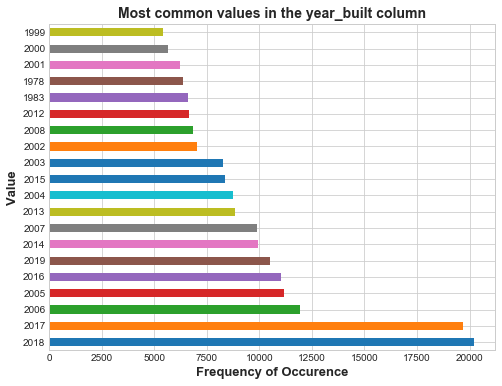


**************************************************

BEDROOMS

Data type: float64
Count: 323864
Number of Unique Values: 16
Number of nulls: 0 - 0.0%

Mean: 3.5570795148580885
Minimum: 1.0
Lower Quartile: 3.0
Median: 4.0
Upper Quartile: 4.0
Maximum: 30.0


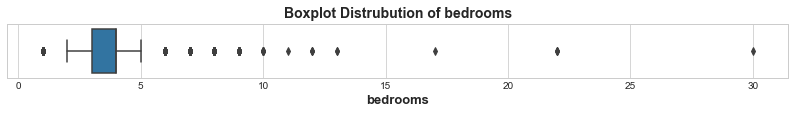

None



1.0     4219
10.0       7
11.0       1
        ... 
7.0      268
8.0       68
9.0       24
Name: bedrooms, Length: 16, dtype: int64

None



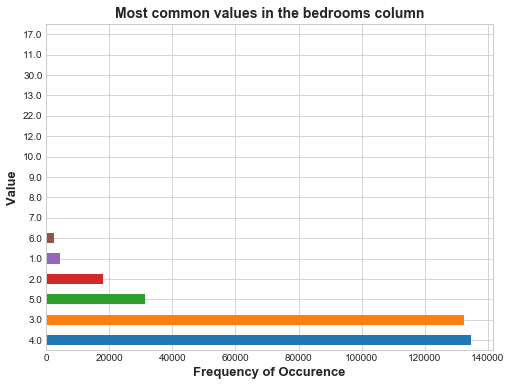


**************************************************

BATHS_FULL

Data type: float64
Count: 323864
Number of Unique Values: 15
Number of nulls: 0 - 0.0%

Mean: 2.4160727959884394
Minimum: 1.0
Lower Quartile: 2.0
Median: 2.0
Upper Quartile: 3.0
Maximum: 31.0


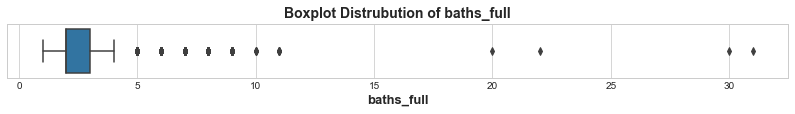

None



1.0     17885
10.0        4
11.0        6
        ...  
7.0       219
8.0        82
9.0        25
Name: baths_full, Length: 15, dtype: int64

None



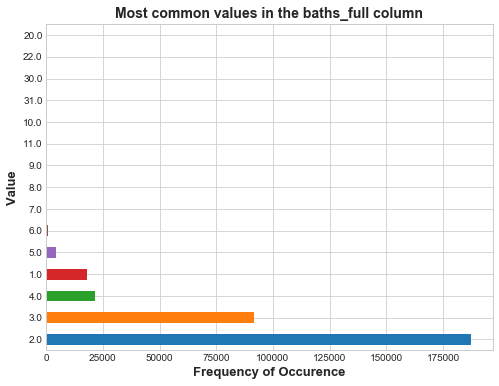


**************************************************

BATHS_HALF

Data type: float64
Count: 323864
Number of Unique Values: 9
Number of nulls: 0 - 0.0%

Mean: 0.5784773855692513
Minimum: 0.0
Lower Quartile: 0.0
Median: 1.0
Upper Quartile: 1.0
Maximum: 10.0


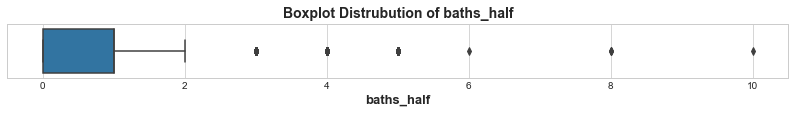

None



0.0     146370
1.0     168624
10.0         1
         ...  
5.0         36
6.0          1
8.0          3
Name: baths_half, Length: 9, dtype: int64

None



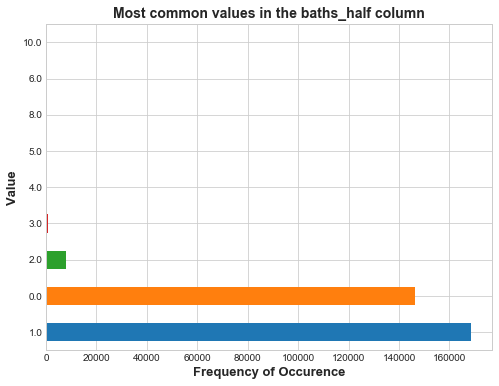


**************************************************

STORIES

Data type: float64
Count: 323864
Number of Unique Values: 7
Number of nulls: 0 - 0.0%

Mean: 1.6013172195736483
Minimum: 1.0
Lower Quartile: 1.0
Median: 2.0
Upper Quartile: 2.0
Maximum: 4.0


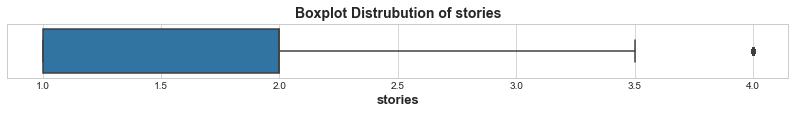

None



1.0    145182
1.5      7777
2.0    153086
        ...  
3.0     15210
3.5        29
4.0      2272
Name: stories, Length: 7, dtype: int64

None



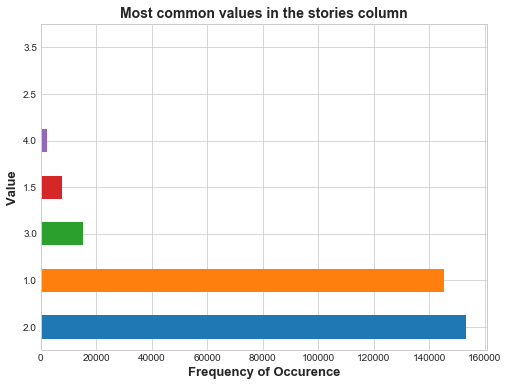


**************************************************

NEW_CONSTRUCTION

Data type: bool
Number of unique values: 2
Number of nulls: 0 - 0.0%
count     323864
unique         2
top        False
freq      266587
Name: new_construction, dtype: object



False    266587
True      57277
Name: new_construction, dtype: int64

None



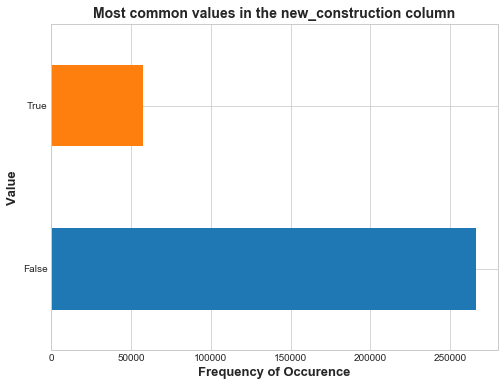


**************************************************

NEW_CONSTRUCTION_DESC

Data type: object
Number of unique values: 3
Number of nulls: 0 - 0.0%
count      323864
unique          3
top       Not New
freq       266587
Name: new_construction_desc, dtype: object



Never Lived In                     22342
Not New                           266587
To Be Built/Under Construction     34935
Name: new_construction_desc, dtype: int64

None



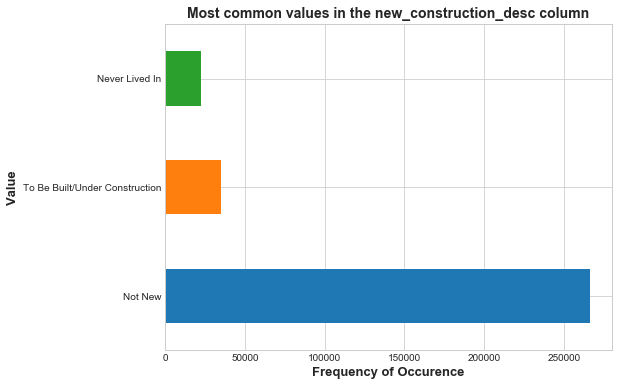


**************************************************

POOL_PRIVATE

Data type: bool
Number of unique values: 2
Number of nulls: 0 - 0.0%
count     323864
unique         2
top        False
freq      285264
Name: pool_private, dtype: object



False    285264
True      38600
Name: pool_private, dtype: int64

None



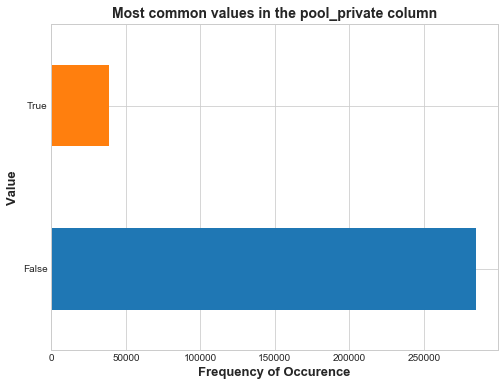


**************************************************

DOM

Data type: float64
Count: 323864
Number of Unique Values: 831
Number of nulls: 0 - 0.0%

Mean: 68.41165427463379
Minimum: -54.0
Lower Quartile: 13.0
Median: 42.0
Upper Quartile: 96.0
Maximum: 1541.0


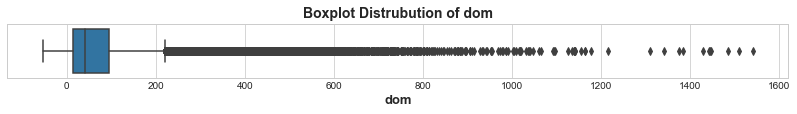

None



-1.0       5
-28.0      1
-54.0      1
        ... 
987.0      1
99.0     999
990.0      1
Name: dom, Length: 831, dtype: int64

None



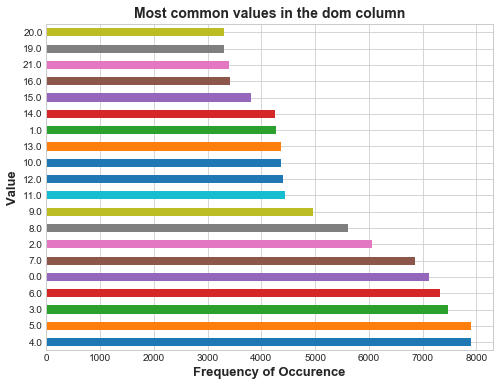


**************************************************

CDOM

Data type: int64
Count: 323864
Number of Unique Values: 1337
Number of nulls: 0 - 0.0%

Mean: 104.5921096509646
Minimum: 0
Lower Quartile: 16.0
Median: 60.0
Upper Quartile: 143.0
Maximum: 1600


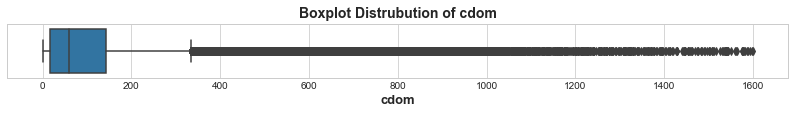

None



0      6060
1      3728
10     3733
       ... 
997       4
998       1
999       3
Name: cdom, Length: 1337, dtype: int64

None



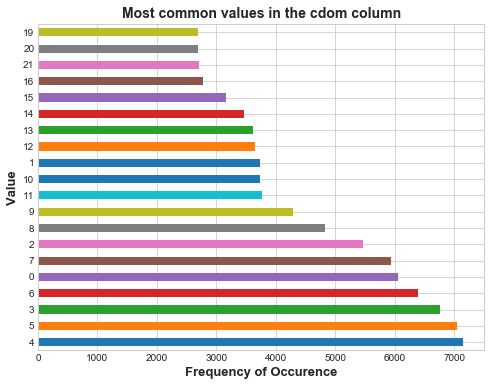


**************************************************

LAST_CHANGE_TIMESTAMP

Data type: datetime64[ns]
Number of unique values: 298554
Number of nulls: 0 - 0.0%
count                  323864
unique                 298554
top       2017-11-01 00:30:02
freq                      207
first     2015-10-15 07:34:47
last      2019-06-20 00:29:08
Name: last_change_timestamp, dtype: object



2015-10-15 07:34:47    1
2015-10-22 09:06:18    1
2015-11-16 09:24:58    1
                      ..
2019-06-20 00:16:02    1
2019-06-20 00:25:59    1
2019-06-20 00:29:08    1
Name: last_change_timestamp, Length: 298554, dtype: int64

None



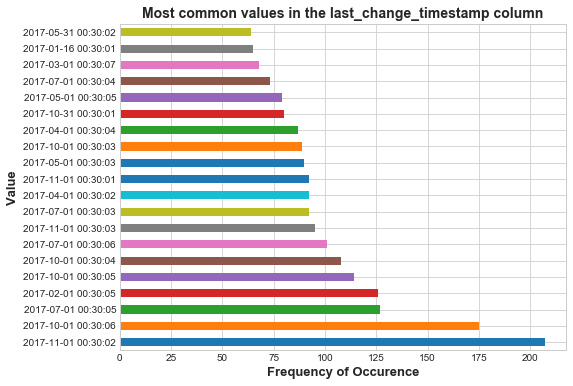


**************************************************

LIST_DATE

Data type: datetime64[ns]
Number of unique values: 1582
Number of nulls: 0 - 0.0%
count                  323864
unique                   1582
top       2018-06-01 00:00:00
freq                      692
first     2002-10-22 00:00:00
last      2019-06-20 00:00:00
Name: list_date, dtype: object



2002-10-22      1
2008-08-11      1
2009-01-06      1
             ... 
2019-06-18    410
2019-06-19    454
2019-06-20      6
Name: list_date, Length: 1582, dtype: int64

None



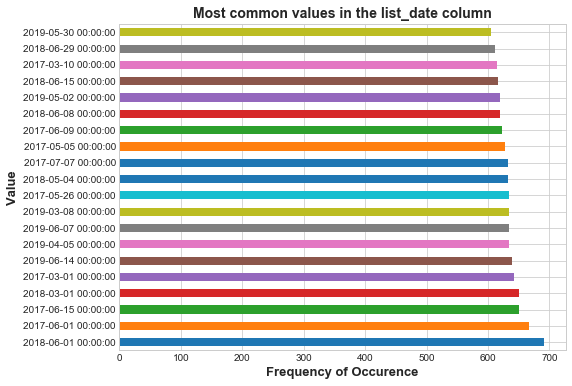


**************************************************

FIREPLACE

Data type: bool
Number of unique values: 2
Number of nulls: 0 - 0.0%
count     323864
unique         2
top         True
freq      204263
Name: fireplace, dtype: object



False    119601
True     204263
Name: fireplace, dtype: int64

None



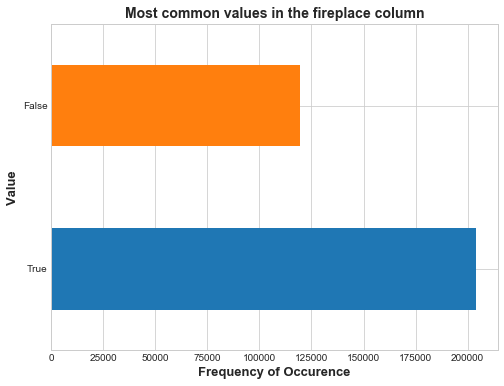


**************************************************

GARAGE

Data type: bool
Number of unique values: 2
Number of nulls: 0 - 0.0%
count     323864
unique         2
top         True
freq      296047
Name: garage, dtype: object



False     27817
True     296047
Name: garage, dtype: int64

None



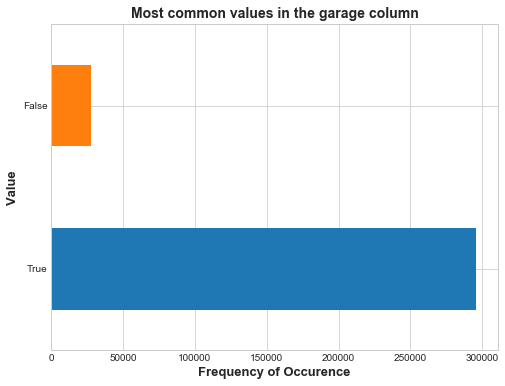


**************************************************



In [246]:
preview_cols(df)

## Exporting DataFrame

In [249]:
df.to_csv('har_cleaned.csv')